In [1]:
# pip install imblearn, pydotplus firtly
# import liberaries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load data
bankdata= pd.read_csv('bank-additional-full.csv', sep = ';')
bankdata.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
bankdata.shape

(41188, 21)

In [4]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
bankdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

no     36548
yes     4640
Name: y, dtype: int64


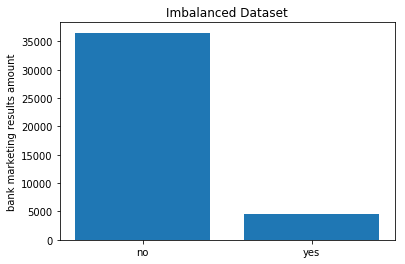

In [6]:
# the dependant variable
# imbalanced dataset
print(bankdata.y.value_counts())
plt.bar([1,2],bankdata.y.value_counts())
plt.xticks([1,2], ['no','yes'])
plt.ylabel('bank marketing results amount')
plt.title('Imbalanced Dataset')
plt.show()

In [7]:
## working on numeric variables
bankdata.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [8]:
## numeric data related to the campaign
fig,axes=plt.subplots(figsize=(21,14),nrows=3,ncols=2)

sns.boxplot(bankdata.age,color='skyblue',ax=axes[0, 0])
axes[0,0].set_xlabel('age')

sns.distplot(bankdata.age, ax=axes[0, 1])
axes[0,1].set_xlabel('age')
axes[0,1].set_ylabel('Frequency')

sns.distplot(bankdata.duration, ax=axes[1,0])
axes[1,0].set_xlabel('duration')
axes[1,0].set_ylabel('Frequency')

sns.distplot(bankdata.campaign, ax=axes[1, 1])
axes[1, 1].set_xlabel('campaign')
axes[1, 1].set_ylabel('Frequency')

sns.distplot(bankdata.pdays, ax=axes[2, 0])
axes[2, 0].set_xlabel('pdays')
axes[2, 0].set_ylabel('Frequency')

sns.distplot(bankdata.previous, ax=axes[2, 1])
axes[2, 1].set_xlabel('previous')
axes[2, 1].set_ylabel('Frequency')
plt.show()

C:\Users\Minjie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


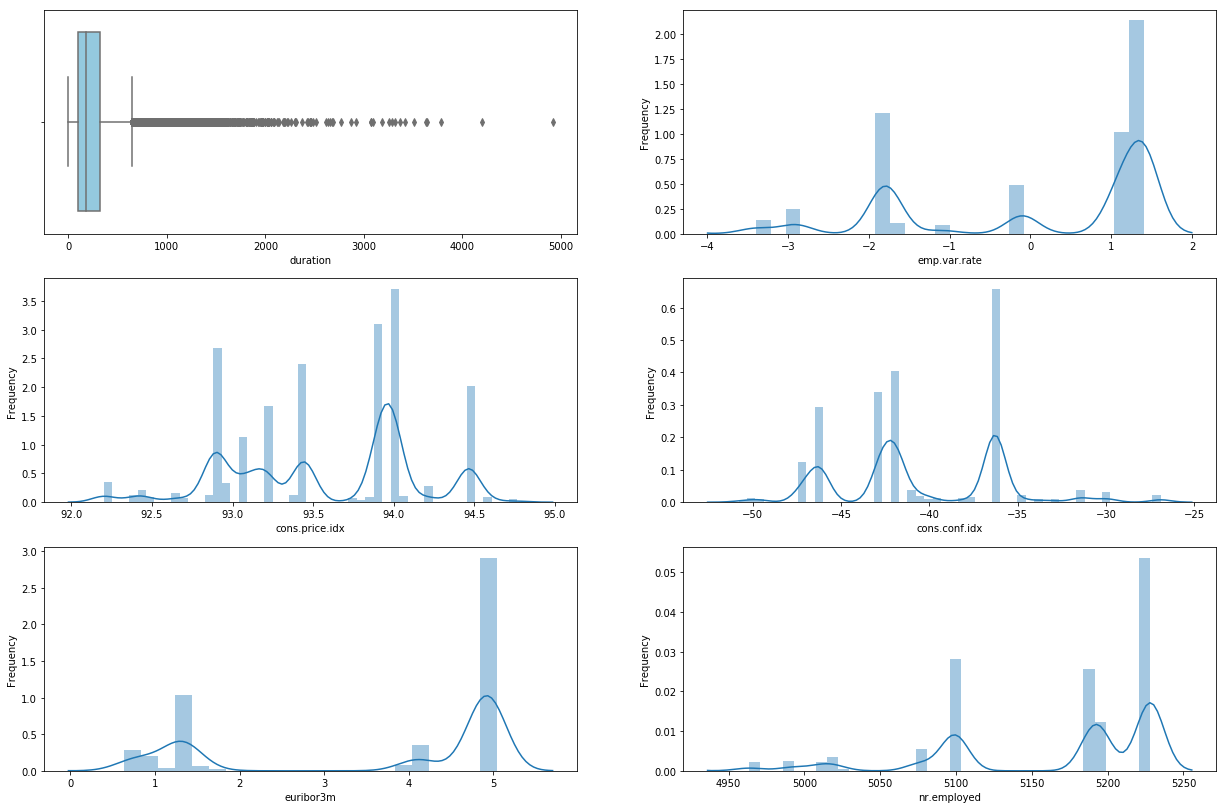

In [9]:
## numeric data related to social and economic context
fig,axes=plt.subplots(figsize=(21,14),nrows=3,ncols=2)

sns.boxplot(bankdata.duration,color='skyblue',ax=axes[0, 0])
axes[0,0].set_xlabel('duration')

sns.distplot(bankdata['emp.var.rate'], ax=axes[0,1])
axes[0,1].set_xlabel('emp.var.rate')
axes[0,1].set_ylabel('Frequency')

sns.distplot(bankdata['cons.price.idx'], ax=axes[1,0])
axes[1,0].set_xlabel('cons.price.idx')
axes[1,0].set_ylabel('Frequency')

sns.distplot(bankdata['cons.conf.idx'], ax=axes[1,1])
axes[1,1].set_xlabel('cons.conf.idx')
axes[1,1].set_ylabel('Frequency')

sns.distplot(bankdata.euribor3m, ax=axes[2,0])
axes[2,0].set_xlabel('euribor3m')
axes[2,0].set_ylabel('Frequency')

sns.distplot(bankdata['nr.employed'], ax=axes[2, 1])
axes[2, 1].set_xlabel('nr.employed')
axes[2, 1].set_ylabel('Frequency')

plt.show()

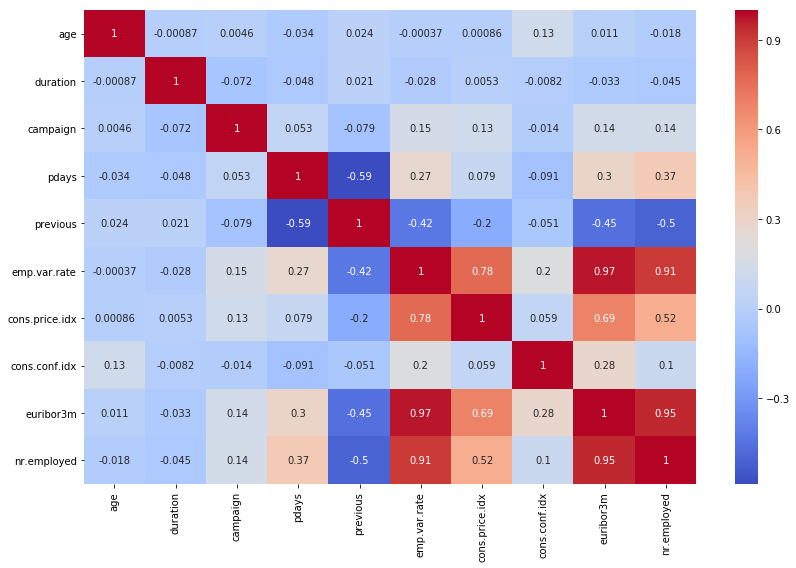

In [10]:
# check correlation in numeric variables
plt.figure(figsize=(12,8))
bc=bankdata.corr()
sns.heatmap(bc,annot=True,cmap='coolwarm')
plt.tight_layout()

In [11]:
# we should drop 'euribor3m' and 'nr.employed', keep 'emp.var.rate'
bankdata.drop(['euribor3m', 'nr.employed'], axis=1,inplace=True)
bankdata.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx   y  
0           1.1          93.994          -36.4  no  
1           1.1          93.994          -36.4  no  
2           1.1          93.994          -36.4  no  
3           1.1          93.994          -36.4  no  
4           1.1          93.994          -36.4  no

In [12]:
## plot numerical variables with dependent variable
## can help us determine the clusters(if exists) of classes 0 and 1 
fig,axes=plt.subplots(figsize=(18,6),nrows=1,ncols=3)
sns.scatterplot(bankdata.loc[bankdata.y=='no'].loc[:,'age'],bankdata.loc[bankdata.y=='no'].loc[:,'duration'],label='class no', ax=axes[0])
sns.scatterplot(bankdata.loc[bankdata.y=='yes'].loc[:,'age'],bankdata.loc[bankdata.y=='yes'].loc[:,'duration'],label='class yes', ax=axes[0])
axes[0].set_xlabel('age')
axes[0].set_ylabel('duration')

sns.scatterplot(bankdata.loc[bankdata.y=='no'].loc[:,'age'],bankdata.loc[bankdata.y=='no'].loc[:,'campaign'],label='class no', ax=axes[1])
sns.scatterplot(bankdata.loc[bankdata.y=='yes'].loc[:,'age'],bankdata.loc[bankdata.y=='yes'].loc[:,'campaign'],label='class yes', ax=axes[1])
axes[1].set_xlabel('age')
axes[1].set_ylabel('campaign')

sns.scatterplot(bankdata.loc[bankdata.y=='no'].loc[:,'duration'],bankdata.loc[bankdata.y=='no'].loc[:,'campaign'],label='class no', ax=axes[2])
sns.scatterplot(bankdata.loc[bankdata.y=='yes'].loc[:,'duration'],bankdata.loc[bankdata.y=='yes'].loc[:,'campaign'],label='class yes', ax=axes[2])
axes[2].set_xlabel('duration')
axes[2].set_ylabel('campaign')

plt.legend()
plt.show()
## contact multitimes does not help much
## one time with long duration is good stratergy
## duration=0 definitly shows the client said no
## no cluster find for age or duration we use quartile to tabulate these data.
## for the other numeric variables need to be tabulated, we use decision tree.

In [13]:
def label_groupby(col_name):
    class_n=bankdata.loc[bankdata.y == 'no'].loc[:,col_name]
    class_y=bankdata.loc[bankdata.y == 'yes'].loc[:,col_name]
    full_catagory=list(set(class_y.unique())|set(class_n.unique()))
    full_catagory.sort()
    nolist=[]
    yeslist=[]
    for i in range(len(full_catagory)):
        if full_catagory[i] in class_n.value_counts().index:
                   nolist.append(class_n.value_counts()[full_catagory[i]])
        else:
                   nolist.append(0)
        if full_catagory[i] in class_y.value_counts().index:
                   yeslist.append(class_y.value_counts()[full_catagory[i]])
        else:
                   yeslist.append(0)
                
    ## to make dodged bar chart plot
    plt.figure(figsize=(10,5))
    # Values of each group
    bars1 = yeslist
    bars2 = nolist
    # The position of the bars on the x-axis
    r = np.linspace(0,len(full_catagory)-1, len(full_catagory))
    # Names of group and bar width
    names = full_catagory
    barWidth = 1
    # Create yes bars
    plt.bar(r, bars1, color='darkorange', edgecolor='white', width=barWidth,label='yes')
    # Create no bars, on top of the firs ones
    plt.bar(r, bars2, bottom=bars1, color='royalblue', edgecolor='white', width=barWidth,label='no')

    # Custom X axis
    plt.xticks(r, names,rotation=35 )
    # Show graphic
    plt.legend()
    plt.tight_layout()
    plt.show()   
    
    ## return table is needed
    df=pd.DataFrame(columns=['label','Yes','No','Sum'])
    df['label']=full_catagory
    df['Yes']=yeslist
    df['No']=nolist
    df['Sum']=np.array(yeslist)+np.array(nolist)
    return df

In [14]:
## this function uses decisionTreeClassifier to decide subgroups of categorical data
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
## although we use imbalanced data, we do not add class weight for the decision tree, since we only care the distribution of 
## age rather than the situation inside the 'bins'
def tree_threshhold(df_column):
    x=np.array([i for i in df_column]).reshape(-1,1)
    y=np.array([i for i in bankdata.y]).reshape(-1,1)

    clf = DecisionTreeClassifier()
    clf.fit(x,y)

    dot_data = StringIO()
    export_graphviz(clf, max_depth=2,out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return graph

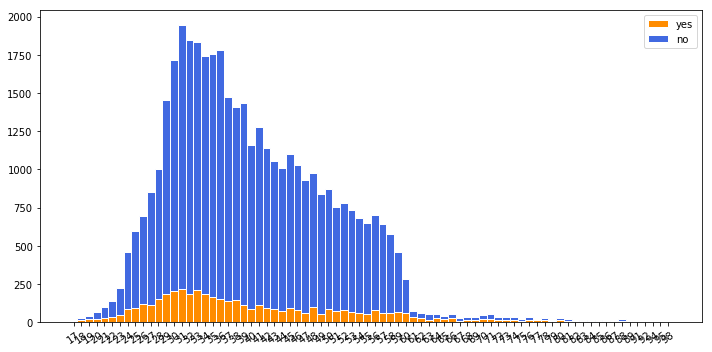

label  Yes    No   Sum
0      17    2     3     5
1      18   12    16    28
2      19   20    22    42
3      20   23    42    65
4      21   29    73   102
5      22   36   101   137
6      23   48   178   226
7      24   86   377   463
8      25   93   505   598
9      26  122   576   698
10     27  114   737   851
11     28  151   850  1001
12     29  186  1267  1453
13     30  202  1512  1714
14     31  220  1727  1947
15     32  184  1662  1846
16     33  210  1623  1833
17     34  184  1561  1745
18     35  167  1592  1759
19     36  154  1626  1780
20     37  137  1338  1475
21     38  143  1264  1407
22     39  114  1318  1432
23     40   84  1077  1161
24     41  113  1165  1278
25     42   91  1051  1142
26     43   88   967  1055
27     44   77   934  1011
28     45   92  1011  1103
29     46   79   951  1030
..    ...  ...   ...   ...
48     65   23    21    44
49     66   29    28    57
50     67   11    15    26
51     68   15    18    33
52     69   14    20    34
53     70   19    28    47
54     71   21    32    53
55     72   13    21    34
56     73   13    21    34
57     74   15    17    32
58     75   11    13    24
59     76   18    16    34
60     77   13     7    20
61     78   14    13    27
62     79    7     7    14
63     80   18    13    31
64     81    8    12    20
65     82   11     6    17
66     83    8     9    17
67     84    3     4     7
68     85    7     8    15
69     86    5     3     8
70     87    1     0     1
71     88    9    13    22
72     89    2     0     2
73     91    0     2     2
74     92    3     1     4
75     94    0     1     1
76     95    0     1     1
77     98    2     0     2

[78 rows x 4 columns]

In [15]:
# Data manipulation process starts!!
label_groupby('age')

In [16]:
## 78 differente values,using quantile can reduce loss of distribution information
## threshholds referring to bankdata.describe() table
bankdata.loc[bankdata.age <= 32, 'age'] = 1
bankdata.loc[(bankdata.age > 32) & (bankdata.age<= 47), 'age'] = 2
bankdata.loc[(bankdata.age > 47) & (bankdata.age <= 70), 'age'] = 3
bankdata.loc[(bankdata.age > 70) & (bankdata.age <= 98), 'age'] = 4

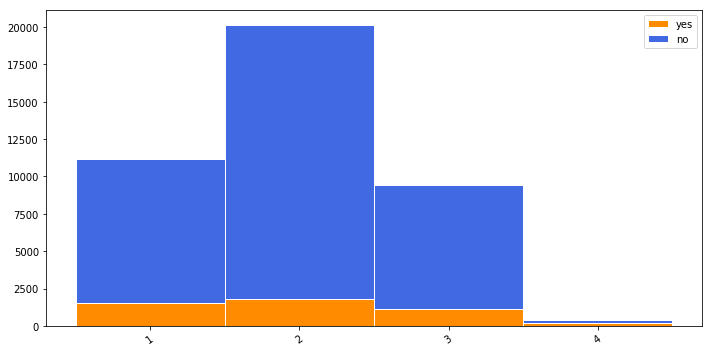

label   Yes     No    Sum
0      1  1528   9648  11176
1      2  1791  18348  20139
2      3  1119   8332   9451
3      4   202    220    422

In [17]:
label_groupby('age')

In [18]:
label_groupby('job')

label   Yes    No    Sum
0          admin.  1352  9070  10422
1     blue-collar   638  8616   9254
2    entrepreneur   124  1332   1456
3       housemaid   106   954   1060
4      management   328  2596   2924
5         retired   434  1286   1720
6   self-employed   149  1272   1421
7        services   323  3646   3969
8         student   275   600    875
9      technician   730  6013   6743
10     unemployed   144   870   1014
11        unknown    37   293    330

In [19]:
# use sklearn to encoder categorical data into numeric data
# label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bankdata.job = encoder.fit_transform(bankdata.job)

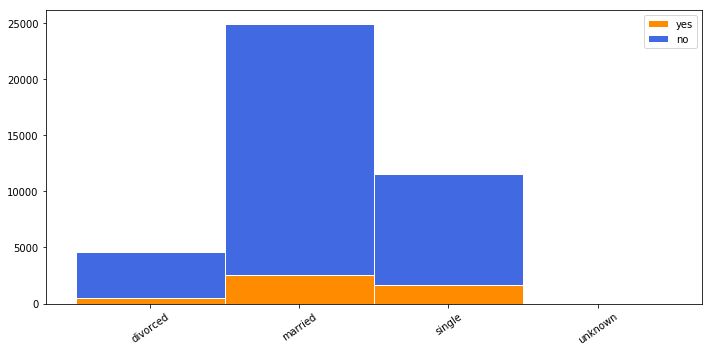

label   Yes     No    Sum
0  divorced   476   4136   4612
1   married  2532  22396  24928
2    single  1620   9948  11568
3   unknown    12     68     80

In [20]:
label_groupby('marital')

In [21]:
bankdata.marital = encoder.fit_transform(bankdata.marital) 

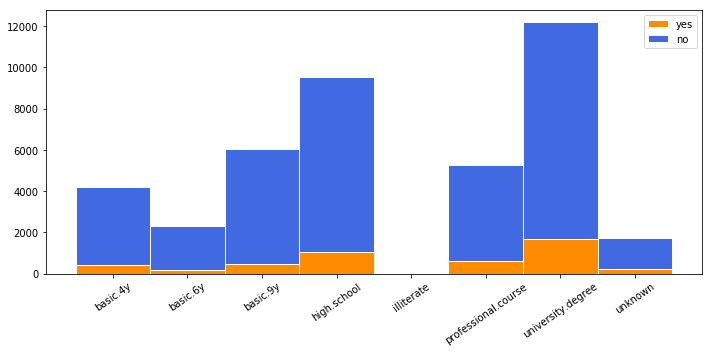

label   Yes     No    Sum
0             basic.4y   428   3748   4176
1             basic.6y   188   2104   2292
2             basic.9y   473   5572   6045
3          high.school  1031   8484   9515
4           illiterate     4     14     18
5  professional.course   595   4648   5243
6    university.degree  1670  10498  12168
7              unknown   251   1480   1731

In [22]:
label_groupby('education')

In [23]:
bankdata.education = encoder.fit_transform(bankdata.education) 

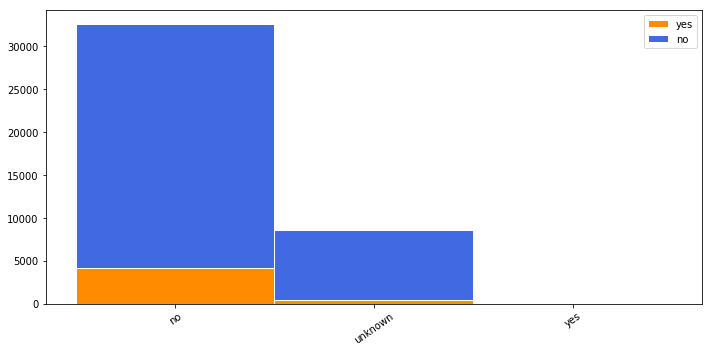

label   Yes     No    Sum
0       no  4197  28391  32588
1  unknown   443   8154   8597
2      yes     0      3      3

In [24]:
label_groupby('default')
## default is important for bank to select customers

In [25]:
bankdata.default = encoder.fit_transform(bankdata.default)

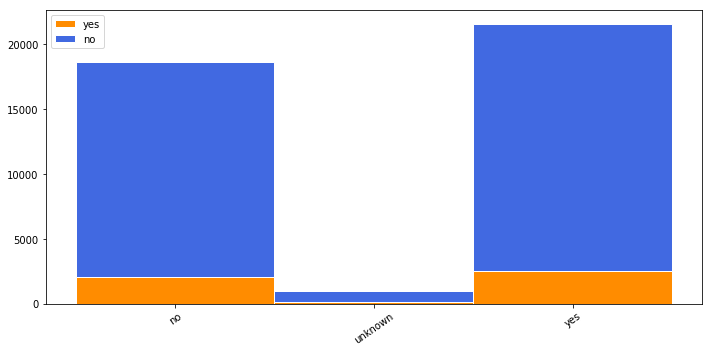

label   Yes     No    Sum
0       no  2026  16596  18622
1  unknown   107    883    990
2      yes  2507  19069  21576

In [26]:
label_groupby('housing')

In [27]:
bankdata.housing = encoder.fit_transform(bankdata.housing) 

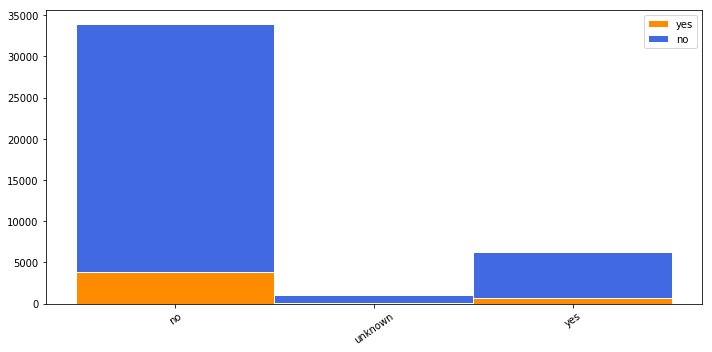

label   Yes     No    Sum
0       no  3850  30100  33950
1  unknown   107    883    990
2      yes   683   5565   6248

In [28]:
label_groupby('loan')

In [29]:
bankdata.loan = encoder.fit_transform(bankdata.loan) 

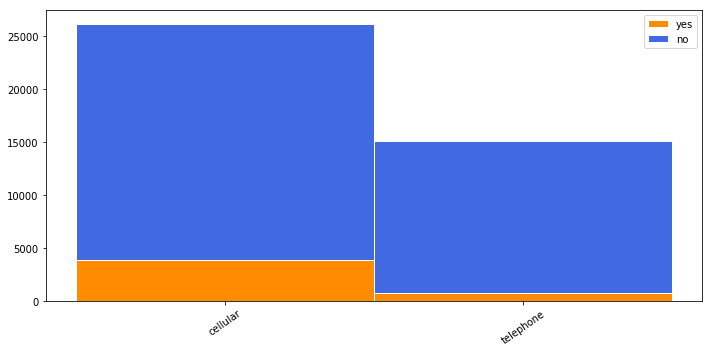

label   Yes     No    Sum
0   cellular  3853  22291  26144
1  telephone   787  14257  15044

In [30]:
label_groupby('contact')

In [31]:
bankdata.contact = encoder.fit_transform(bankdata.contact) 

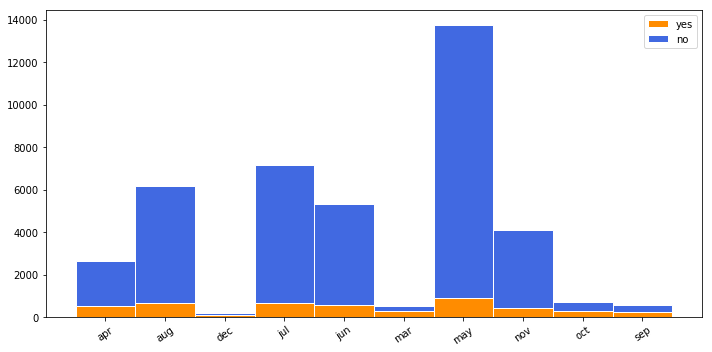

label  Yes     No    Sum
0   apr  539   2093   2632
1   aug  655   5523   6178
2   dec   89     93    182
3   jul  649   6525   7174
4   jun  559   4759   5318
5   mar  276    270    546
6   may  886  12883  13769
7   nov  416   3685   4101
8   oct  315    403    718
9   sep  256    314    570

In [32]:
label_groupby('month')

In [33]:
bankdata.month = encoder.fit_transform(bankdata.month) 

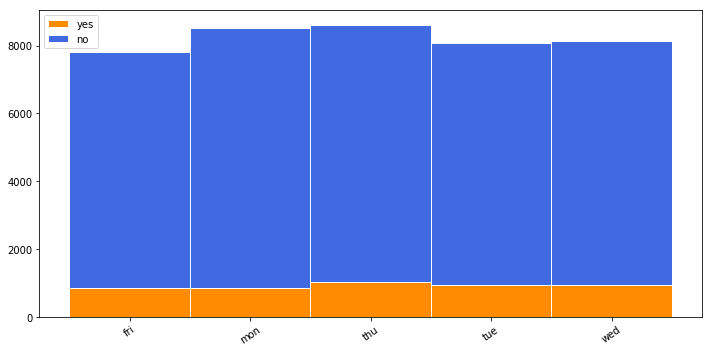

label   Yes    No   Sum
0   fri   846  6981  7827
1   mon   847  7667  8514
2   thu  1045  7578  8623
3   tue   953  7137  8090
4   wed   949  7185  8134

In [34]:
label_groupby('day_of_week')

In [35]:
bankdata.day_of_week = encoder.fit_transform(bankdata.day_of_week) 

In [36]:
bankdata.duration.value_counts()
## 1544 differente values,using quantile can reduce loss of distribution information

85      170
90      170
136     168
73      167
124     164
87      162
72      161
104     161
111     160
106     159
109     158
97      158
122     157
135     156
92      156
114     156
139     155
96      155
119     155
82      154
89      153
76      153
71      152
126     152
125     152
93      151
107     150
88      150
83      149
123     149
       ... 
2184      1
1395      1
1555      1
1556      1
1447      1
1492      1
3509      1
1460      1
1364      1
1300      1
3078      1
1095      1
1191      1
1255      1
1287      1
3366      1
1479      1
2035      1
1575      1
1767      1
1236      1
3253      1
2089      1
1204      1
1140      1
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

In [37]:
## threshholds referring to bankdata.describe() table
bankdata.loc[bankdata.duration <= 102, 'duration'] = 1
bankdata.loc[(bankdata.duration > 102) & (bankdata.duration  <= 180)  , 'duration']    = 2
bankdata.loc[(bankdata.duration > 180) & (bankdata.duration  <= 319)  , 'duration']   = 3
bankdata.loc[(bankdata.duration > 319) & (bankdata.duration  <= 644.5), 'duration'] = 4
bankdata.loc[bankdata.duration  > 644.5, 'duration'] = 5

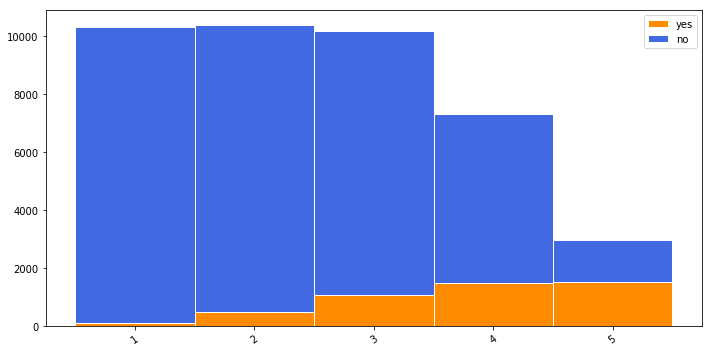

label   Yes     No    Sum
0      1    87  10226  10313
1      2   477   9915  10392
2      3  1077   9120  10197
3      4  1473   5850   7323
4      5  1526   1437   2963

In [38]:
label_groupby('duration')

In [39]:
## drop 'duration' since it should not include in our model for prediction
bankdata.drop(['duration'],axis=1,inplace=True)

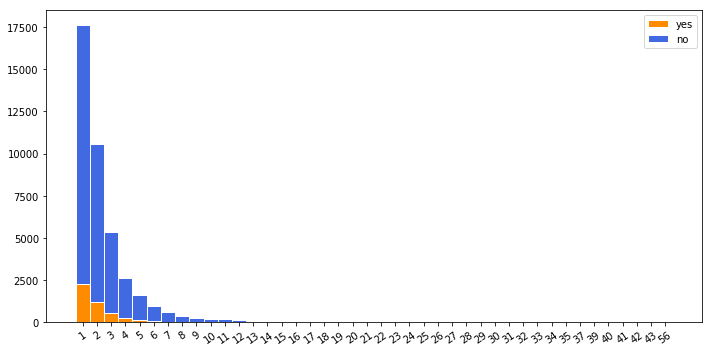

label   Yes     No    Sum
0       1  2300  15342  17642
1       2  1211   9359  10570
2       3   574   4767   5341
3       4   249   2402   2651
4       5   120   1479   1599
5       6    75    904    979
6       7    38    591    629
7       8    17    383    400
8       9    17    266    283
9      10    12    213    225
10     11    12    165    177
11     12     3    122    125
12     13     4     88     92
13     14     1     68     69
14     15     2     49     51
15     16     0     51     51
16     17     4     54     58
17     18     0     33     33
18     19     0     26     26
19     20     0     30     30
20     21     0     24     24
21     22     0     17     17
22     23     1     15     16
23     24     0     15     15
24     25     0      8      8
25     26     0      8      8
26     27     0     11     11
27     28     0      8      8
28     29     0     10     10
29     30     0      7      7
30     31     0      7      7
31     32     0      4      4
32     33     0      4      4
33     34     0      3      3
34     35     0      5      5
35     37     0      1      1
36     39     0      1      1
37     40     0      2      2
38     41     0      1      1
39     42     0      2      2
40     43     0      2      2
41     56     0      1      1

In [40]:
label_groupby('campaign')

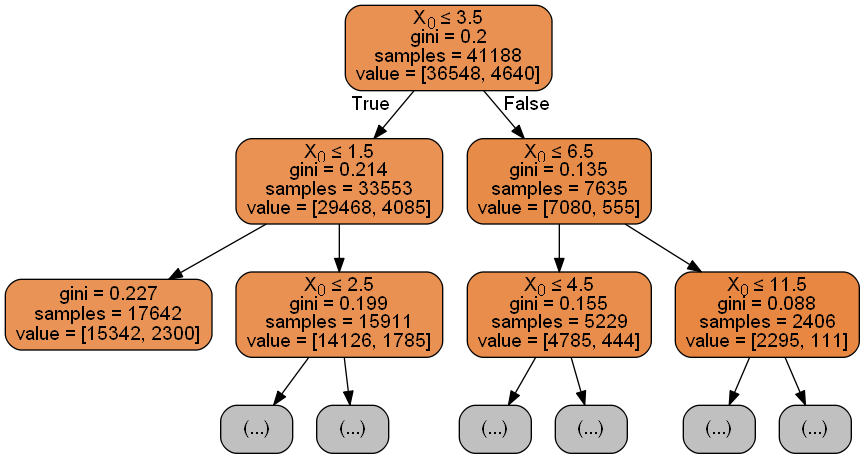

In [41]:
## using decision tree to subgroup data
graph=tree_threshhold(bankdata.campaign)
Image(graph.create_png())

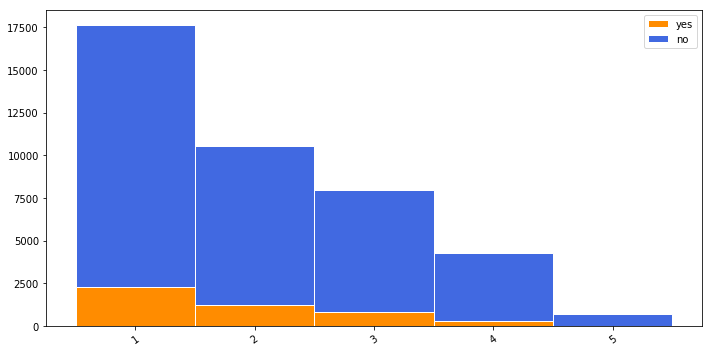

label   Yes     No    Sum
0      1  2300  15342  17642
1      2  1211   9359  10570
2      3   823   7169   7992
3      4   291   4001   4292
4      5    15    677    692

In [42]:
## select depth=2 to groupping data: everygroup should have enough data
## group should not be too large, avoid to much information lost
## group should not be too small, prevent the ml algorithem to take them as 'missing value'
bankdata.loc[bankdata.campaign <= 1.5, 'campaign'] = 1
bankdata.loc[(bankdata.campaign > 1.5) & (bankdata.campaign <= 2.5)  , 'campaign'] = 2
bankdata.loc[(bankdata.campaign > 2.5) & (bankdata.campaign <= 4.5)  , 'campaign'] = 3
bankdata.loc[(bankdata.campaign > 4.5) & (bankdata.campaign <= 11.5)  , 'campaign'] = 4
bankdata.loc[bankdata.campaign > 11.5, 'campaign'] = 5
label_groupby('campaign')
## calling them more times is not efficient 

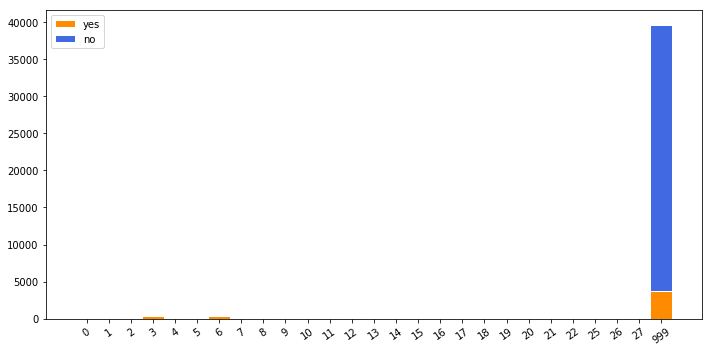

label   Yes     No    Sum
0       0    10      5     15
1       1     8     18     26
2       2    37     24     61
3       3   298    141    439
4       4    63     55    118
5       5    29     17     46
6       6   289    123    412
7       7    40     20     60
8       8    12      6     18
9       9    35     29     64
10     10    30     22     52
11     11    15     13     28
12     12    26     32     58
13     13    28      8     36
14     14    11      9     20
15     15    16      8     24
16     16     6      5     11
17     17     2      6      8
18     18     4      3      7
19     19     1      2      3
20     20     0      1      1
21     21     2      0      2
22     22     2      1      3
23     25     1      0      1
24     26     1      0      1
25     27     1      0      1
26    999  3673  36000  39673

In [43]:
label_groupby('pdays')
# 999 means client was not previously contacted

In [44]:
bankdata.pdays = encoder.fit_transform(bankdata.pdays)

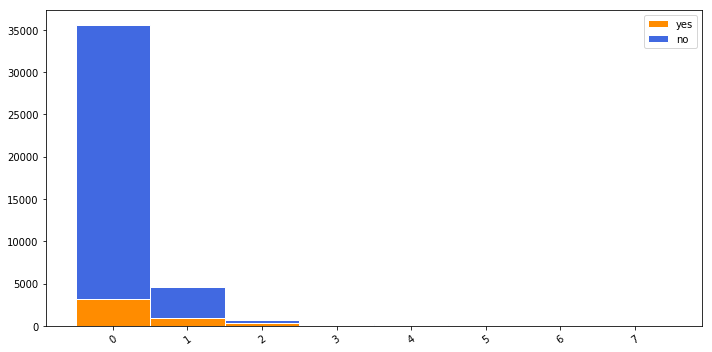

label   Yes     No    Sum
0      0  3141  32422  35563
1      1   967   3594   4561
2      2   350    404    754
3      3   128     88    216
4      4    38     32     70
5      5    13      5     18
6      6     3      2      5
7      7     0      1      1

In [45]:
label_groupby('previous')
# new customers are more willing to say yes

In [46]:
bankdata.previous = encoder.fit_transform(bankdata.previous)

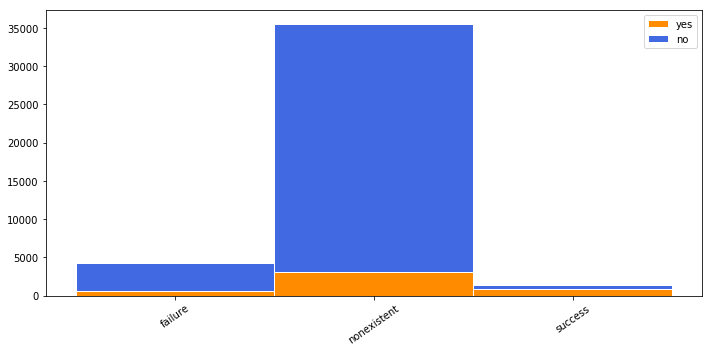

label   Yes     No    Sum
0      failure   605   3647   4252
1  nonexistent  3141  32422  35563
2      success   894    479   1373

In [47]:
label_groupby('poutcome')
# new customers are more willing to say yes

In [48]:
bankdata.poutcome = encoder.fit_transform(bankdata.poutcome) 

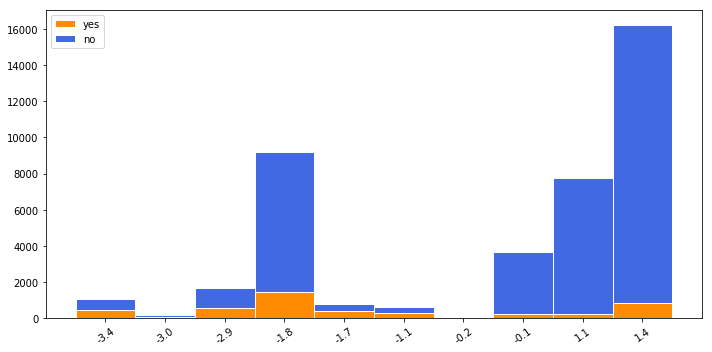

label   Yes     No    Sum
0   -3.4   454    617   1071
1   -3.0    88     84    172
2   -2.9   594   1069   1663
3   -1.8  1461   7723   9184
4   -1.7   403    370    773
5   -1.1   301    334    635
6   -0.2     1      9     10
7   -0.1   232   3451   3683
8    1.1   240   7523   7763
9    1.4   866  15368  16234

In [49]:
label_groupby('emp.var.rate')

In [50]:
bankdata['emp.var.rate'] = encoder.fit_transform(bankdata['emp.var.rate']) 

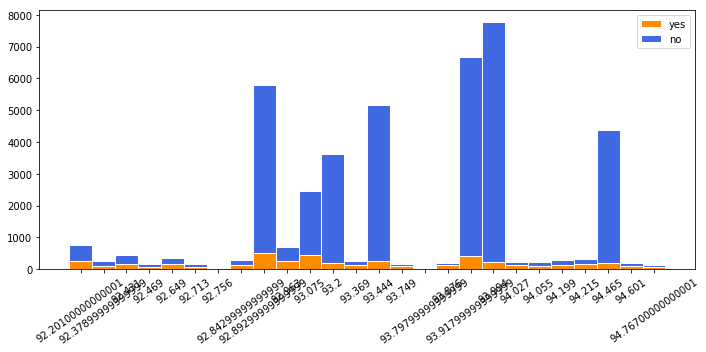

label  Yes    No   Sum
0   92.201  264   506   770
1   92.379  106   161   267
2   92.431  180   267   447
3   92.469   66   112   178
4   92.649  168   189   357
5   92.713   88    84   172
6   92.756    1     9    10
7   92.843  126   156   282
8   92.893  524  5270  5794
9   92.963  264   451   715
10  93.075  442  2016  2458
11  93.200  190  3426  3616
12  93.369  150   114   264
13  93.444  271  4904  5175
14  93.749   97    77   174
15  93.798   42    25    67
16  93.876  122    90   212
17  93.918  407  6278  6685
18  93.994  240  7523  7763
19  94.027  120   113   233
20  94.055  107   122   229
21  94.199  150   153   303
22  94.215  176   135   311
23  94.465  188  4186  4374
24  94.601   93   111   204
25  94.767   58    70   128

In [51]:
label_groupby('cons.price.idx')

In [52]:
bankdata['cons.price.idx'] = encoder.fit_transform(bankdata['cons.price.idx']) 

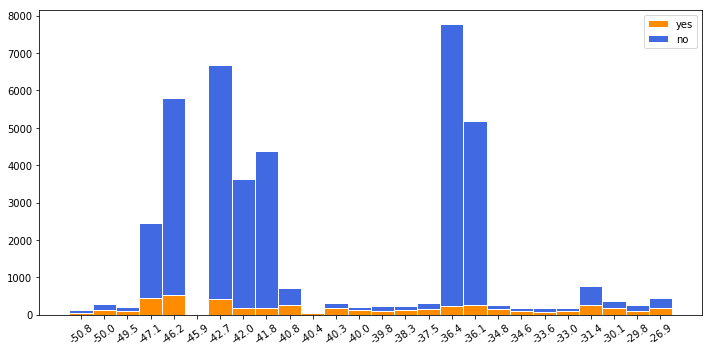

label  Yes    No   Sum
0   -50.8   58    70   128
1   -50.0  126   156   282
2   -49.5   93   111   204
3   -47.1  442  2016  2458
4   -46.2  524  5270  5794
5   -45.9    1     9    10
6   -42.7  407  6278  6685
7   -42.0  190  3426  3616
8   -41.8  188  4186  4374
9   -40.8  264   451   715
10  -40.4   42    25    67
11  -40.3  176   135   311
12  -40.0  122    90   212
13  -39.8  107   122   229
14  -38.3  120   113   233
15  -37.5  150   153   303
16  -36.4  240  7523  7763
17  -36.1  271  4904  5175
18  -34.8  150   114   264
19  -34.6   97    77   174
20  -33.6   66   112   178
21  -33.0   88    84   172
22  -31.4  264   506   770
23  -30.1  168   189   357
24  -29.8  106   161   267
25  -26.9  180   267   447

In [53]:
label_groupby('cons.conf.idx')

In [54]:
bankdata['cons.conf.idx'] = encoder.fit_transform(bankdata['cons.conf.idx']) 

In [55]:
bankdata.y = encoder.fit_transform(bankdata.y) 
bankdata.head(5)

age  job  marital  education  default  housing  loan  contact  month  \
0    3    3        1          0        0        0     0        1      6   
1    3    7        1          3        1        0     0        1      6   
2    2    7        1          3        0        2     0        1      6   
3    2    0        1          1        0        0     0        1      6   
4    3    7        1          3        0        0     2        1      6   

   day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1         1     26         0         1             8   
1            1         1     26         0         1             8   
2            1         1     26         0         1             8   
3            1         1     26         0         1             8   
4            1         1     26         0         1             8   

   cons.price.idx  cons.conf.idx  y  
0              18             16  0  
1              18             16  0  
2              18             16  0  
3              18             16  0  
4              18             16  0

In [56]:
## Machine learning algorithm part !!
y=bankdata['y']
x=bankdata.iloc[:,0:bankdata.shape[1]-1]
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [57]:
# pip install imblearn
# we will oversampling / undersampling / combination methods to make data balanced for Machine Learning methods and comparing their results.
# resampling on only the training data.
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
xTrain_os, yTrain_os = ros.fit_resample(xTrain, yTrain)

from imblearn.under_sampling import RandomUnderSampler
rus= RandomUnderSampler(random_state=2)
xTrain_us, yTrain_us = rus.fit_resample(xTrain, yTrain)

from imblearn.combine import SMOTEENN
rse=SMOTEENN(random_state=3)
xTrain_se, yTrain_se = rse.fit_resample(xTrain, yTrain)

In [58]:
xTrain_se.shape

(37608, 17)

In [59]:
xTrain.shape

(28831, 17)

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [61]:
def models_cvscore_roc(model_0,model,x_Train,y_Train,x_Train_os,y_Train_os,x_Train_us,y_Train_us,x_Train_se,y_Train_se,x_Test_0,x_Test_os,x_Test_us,x_Test_se,y_Test):
    
    model_0.fit(x_Train,y_Train)
    model_ypred_0 = model_0.predict(x_Test_0)
    probs_0 = model_0.predict_proba(x_Test_0)
    # keep probabilities for the positive outcome only
    probs_0 = probs_0[:, 1]

    model.fit(x_Train,y_Train)
    model_ypred = model.predict(x_Test_0)
    probs = model.predict_proba(x_Test_0)
    probs = probs[:, 1]

    model_0.fit(x_Train_os,y_Train_os)
    model_ypred_os = model_0.predict(x_Test_os)
    probs_os = model_0.predict_proba(x_Test_os)
    probs_os = probs_os[:, 1]

    model_0.fit(x_Train_us,y_Train_us)
    model_ypred_us = model_0.predict(x_Test_us)
    probs_us = model_0.predict_proba(x_Test_us)
    probs_us = probs_us[:, 1]
    
    model_0.fit(x_Train_se,y_Train_se)
    model_ypred_se = model_0.predict(x_Test_se)
    probs_se = model_0.predict_proba(x_Test_se)
    probs_se = probs_se[:, 1]
    

    modelcv_p=[]
    modelcv_r=[]
    print(confusion_matrix(y_Test, model_ypred_0 ))
    print(classification_report(y_Test, model_ypred_0))
    # estimate of the performance of the algorithm on new data 
    modelcv_r.append(cross_val_score(model_0, x_Train, y_Train, cv=10, n_jobs=1, scoring = 'recall'))
    modelcv_p.append(cross_val_score(model_0, x_Train, y_Train, cv=10, n_jobs=1, scoring = 'precision'))

    print(confusion_matrix(y_Test, model_ypred ))
    print(classification_report(y_Test, model_ypred))
    # estimate of the performance of the algorithm on new data 
    modelcv_r.append(cross_val_score(model, x_Train, y_Train, cv=10, n_jobs=1, scoring = 'recall'))
    modelcv_p.append(cross_val_score(model, x_Train, y_Train, cv=10, n_jobs=1, scoring = 'precision'))

    print(confusion_matrix(y_Test, model_ypred_os ))
    print(classification_report(y_Test, model_ypred_os))
    modelcv_r.append(cross_val_score(model_0, x_Train_os, y_Train_os, cv=10, n_jobs=1, scoring = 'recall'))
    modelcv_p.append(cross_val_score(model_0, x_Train_os, y_Train_os, cv=10, n_jobs=1, scoring = 'precision'))
    
    print(confusion_matrix(y_Test, model_ypred_us ))
    print(classification_report(y_Test, model_ypred_us))
    modelcv_r.append(cross_val_score(model_0, x_Train_us, y_Train_us, cv=10, n_jobs=1, scoring = 'recall'))
    modelcv_p.append(cross_val_score(model_0, x_Train_us, y_Train_us, cv=10, n_jobs=1, scoring = 'precision'))
    
    print(confusion_matrix(y_Test, model_ypred_se ))
    print(classification_report(y_Test, model_ypred_se))
    modelcv_r.append(cross_val_score(model_0, x_Train_se, y_Train_se, cv=10, n_jobs=1, scoring = 'recall'))
    modelcv_p.append(cross_val_score(model_0, x_Train_se, y_Train_se, cv=10, n_jobs=1, scoring = 'precision'))
    
    # oversampling leads to overestimation of minority class
    # undersampling leads to loss of information from the majority class
    
    fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(7,15))
    ## plot 10-fold CV results for this method
    xaxis=[1,2,3,4,5]
    xvalue=[y for x in xaxis for y in (x,)*10]
    sns.boxplot(xvalue,np.array(modelcv_r).ravel(),ax=axes[0])

    names=['Imbalanced samples','Balanced by sklearn','Balanced by oversampling','Balanced by undersampling','Balanced by smote enn']
    axes[0].set_xticks(np.array(xaxis)-1)
    axes[0].set_xticklabels(names,rotation=90)
    axes[0].set_xlabel('different sample sets')
    axes[0].set_ylabel('10-fold cross validation recall score for class_yes')
    axes[0].set_ylim(0,1)

    sns.boxplot(xvalue,np.array(modelcv_p).ravel(),ax=axes[1])
    axes[1].set_xticks(np.array(xaxis)-1)
    axes[1].set_xticklabels(names,rotation=90)
    axes[1].set_xlabel('different sample sets')
    axes[1].set_ylabel('10-fold cross validation precision score for class_yes')
    axes[1].set_ylim(0,1)

    ## plot ROC curve for this method
    # if the model does a good job of distinguishing the positive and the negative values.
    modelauc=np.zeros(5) 
    modelauc[0] = roc_auc_score(y_Test, model_ypred_0)
    modelauc[1] = roc_auc_score(y_Test, model_ypred)
    modelauc[2] = roc_auc_score(y_Test, model_ypred_os)
    modelauc[3] = roc_auc_score(y_Test, model_ypred_us)
    modelauc[4] = roc_auc_score(y_Test, model_ypred_se)

    # calculate roc curve
    fpr_0, tpr_0, thresholds_0 = roc_curve(y_Test, probs_0)
    fpr, tpr, thresholds = roc_curve(y_Test, probs)
    fpr_os, tpr_os, thresholds_os = roc_curve(y_Test, probs_os)
    fpr_us, tpr_us, thresholds_us = roc_curve(y_Test, probs_us)
    fpr_se, tpr_se, thresholds_se = roc_curve(y_Test, probs_se)
   
    axes[2].plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    axes[2].plot(fpr_0, tpr_0,color='black',label = 'Imbalanced samples, AUC = %0.2f' % modelauc[0])
    axes[2].plot(fpr, tpr,color='blue',label = 'Balanced by sklearn, AUC = %0.2f' % modelauc[1])
    axes[2].plot(fpr_os, tpr_os,color='orange',label = 'Balanced by oversampling,AUC = %0.2f' % modelauc[2])
    axes[2].plot(fpr_us, tpr_us,color='green',label = 'Balanced by undersampling, AUC = %0.2f' % modelauc[3])
    axes[2].plot(fpr_se, tpr_se,color='red',label = 'Balanced by smote enn, AUC = %0.2f' % modelauc[4])
    axes[2].set_xlabel('False positive rate')
    axes[2].set_ylabel('True positive rate')
    axes[2].set_xlim(left=0,right=1)
    axes[2].set_ylim(bottom=0,top=1)
    
    # show the plot
    plt.gca().set_aspect('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    return modelcv_r,modelcv_p,modelauc

In [62]:
cvscore_p=[]
cvscore_r=[]
aucscore=[]
# logistic regression, SVMs, perceptrons, neural networks etc. if you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others
# linear discriminant analysis, principal component analysis, kernel principal component analysis since you want to find directions of maximizing the variance 
# (under the constraints that those directions/eigenvectors/principal components are orthogonal); 
# you want to have features on the same scale since you’d emphasize variables on “larger measurement scales” more.
# marks for future work:Scaling is not required for Tree based models.
# here is any algorithm that computes distance or assumes normality, scale your features!!!
# random forest tree first
# Then scaler data for SVC, logistic regression, npl

In [63]:
## find out the most important features
def feature_weight(coef):
    names=bankdata.columns
    coef,names=zip(*sorted(zip(coef,names)))
    fig=sns.barplot(np.linspace(0,16,17),coef)
    plt.xticks(np.linspace(0,16,17),names)
    plt.xlabel('Features')
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    plt.ylabel('Importance of features')
    plt.title('Importance of each feature')
    plt.show()

[[10562   407]
 [  979   409]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10969
           1       0.50      0.29      0.37      1388

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.71      0.63      0.65     12357
weighted avg       0.87      0.89      0.87     12357

[[10412   557]
 [  987   401]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     10969
           1       0.42      0.29      0.34      1388

   micro avg       0.88      0.88      0.88     12357
   macro avg       0.67      0.62      0.64     12357
weighted avg       0.86      0.88      0.86     12357

[[10076   893]
 [  844   544]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10969
           1       0.38      0.39      0.39      1388

   micro avg       0.86      0.86      0.86     12357
   macro avg       0.65      0.66  

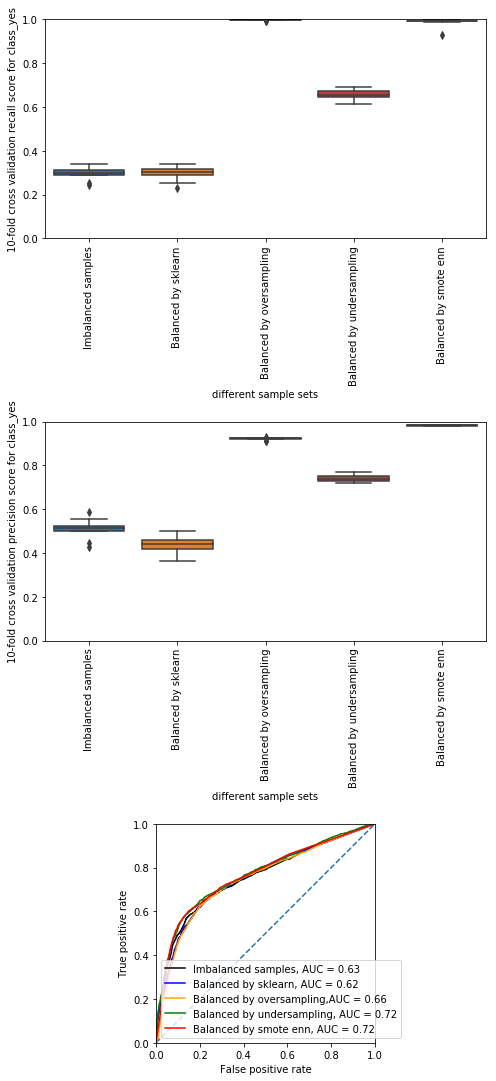

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc_0 = RandomForestClassifier(n_estimators = 100)#criterion = entopy,gini
rfc = RandomForestClassifier(n_estimators = 100,class_weight='balanced')
score_a,score_b,score_c=models_cvscore_roc(rfc_0,rfc,xTrain,yTrain,xTrain_os,yTrain_os,xTrain_us,yTrain_us,xTrain_se,yTrain_se,xTest,xTest,xTest,xTest,yTest)
cvscore_r.append(np.mean(score_a,axis=1))
cvscore_p.append(np.mean(score_b,axis=1))
aucscore.append(score_c)

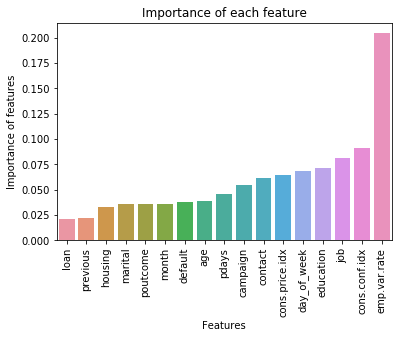

In [65]:
coef=rfc_0.feature_importances_
feature_weight(coef)

In [66]:
## processing data by scaler first
## xTrain,yTrain,xTrain_os,yTrain_os,xTrain_us,yTrain_us,yTest
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(xTrain)
# Now apply the transformations to the data:
xTrain = scaler.transform(xTrain)
xTest_0 = scaler.transform(xTest)

scaler.fit(xTrain_os)
xTrain_os = scaler.transform(xTrain_os)
xTest_os = scaler.transform(xTest)

scaler.fit(xTrain_us)
xTrain_us = scaler.transform(xTrain_us)
xTest_us = scaler.transform(xTest)

scaler.fit(xTrain_se)
xTrain_se = scaler.transform(xTrain_se)
xTest_se = scaler.transform(xTest)

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Minjie\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  
C:\Users\Minjie\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[[10825   144]
 [ 1101   287]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10969
           1       0.67      0.21      0.32      1388

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.79      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357



C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[[8600 2369]
 [ 477  911]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     10969
           1       0.28      0.66      0.39      1388

   micro avg       0.77      0.77      0.77     12357
   macro avg       0.61      0.72      0.62     12357
weighted avg       0.87      0.77      0.81     12357



C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[[8616 2353]
 [ 476  912]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     10969
           1       0.28      0.66      0.39      1388

   micro avg       0.77      0.77      0.77     12357
   macro avg       0.61      0.72      0.63     12357
weighted avg       0.87      0.77      0.81     12357



C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[[8528 2441]
 [ 466  922]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.85     10969
           1       0.27      0.66      0.39      1388

   micro avg       0.76      0.76      0.76     12357
   macro avg       0.61      0.72      0.62     12357
weighted avg       0.87      0.76      0.80     12357



C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[[8870 2099]
 [ 554  834]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     10969
           1       0.28      0.60      0.39      1388

   micro avg       0.79      0.79      0.79     12357
   macro avg       0.61      0.70      0.63     12357
weighted avg       0.87      0.79      0.82     12357



C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

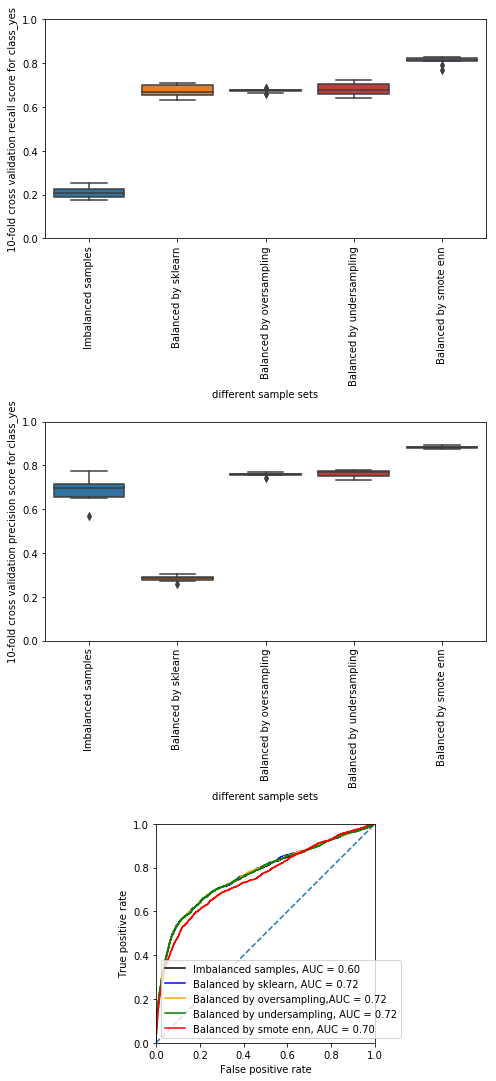

In [67]:
from sklearn.linear_model import LogisticRegression
logr_0 = LogisticRegression()
logr =LogisticRegression(class_weight='balanced')
score_a,score_b,score_c=models_cvscore_roc(logr_0,logr,xTrain,yTrain,xTrain_os,yTrain_os,xTrain_us,yTrain_us,xTrain_se,yTrain_se,xTest_0,xTest_os,xTest_us,xTest_se,yTest)
cvscore_r.append(np.mean(score_a,axis=1))
cvscore_p.append(np.mean(score_b,axis=1))
aucscore.append(score_c)

In [68]:
coef=logr_0.coef_.ravel()
feature_weight(coef)

[[10843   126]
 [ 1133   255]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10969
           1       0.67      0.18      0.29      1388

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.79      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357

[[8503 2466]
 [ 463  925]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.85     10969
           1       0.27      0.67      0.39      1388

   micro avg       0.76      0.76      0.76     12357
   macro avg       0.61      0.72      0.62     12357
weighted avg       0.87      0.76      0.80     12357

[[8513 2456]
 [ 465  923]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.85     10969
           1       0.27      0.66      0.39      1388

   micro avg       0.76      0.76      0.76     12357
   macro avg       0.61      0.72      0.62

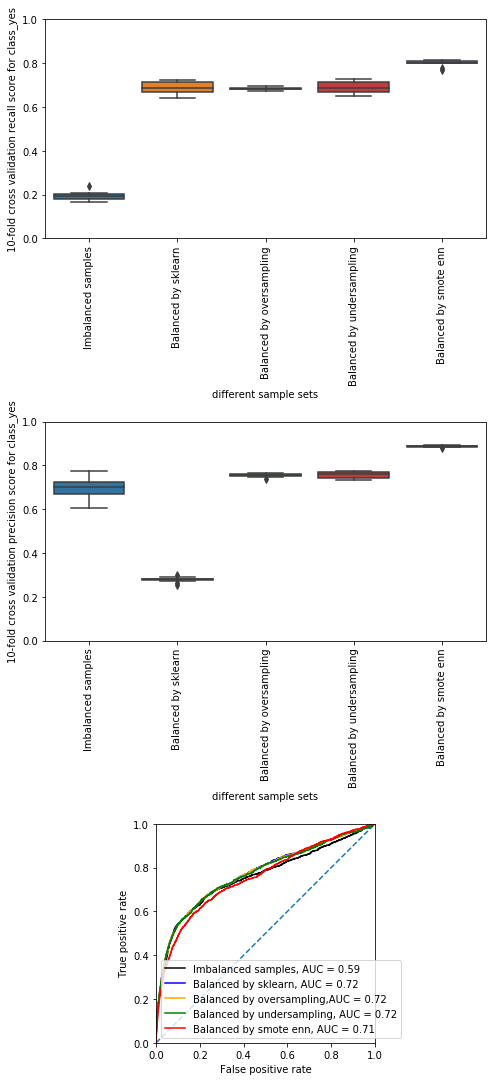

In [69]:
from sklearn.svm import LinearSVC
svc_0= LinearSVC(dual=False)  ## n_samples > n_features
svc_0.fit(xTrain,yTrain)
svc_ypred_0 = svc_0.predict(xTest_0)
probs_0 = svc_0.decision_function(xTest_0)

svc =LinearSVC(dual=False,class_weight='balanced')
svc.fit(xTrain,yTrain)
svc_ypred = svc.predict(xTest_0)
probs = svc.decision_function(xTest_0)

svc_0.fit(xTrain_os,yTrain_os)
svc_ypred_os = svc_0.predict(xTest_os)
probs_os = svc_0.decision_function(xTest_os)

svc_0.fit(xTrain_us,yTrain_us)
svc_ypred_us = svc_0.predict(xTest_us)
probs_us = svc_0.decision_function(xTest_us)

svc_0.fit(xTrain_se,yTrain_se)
svc_ypred_se = svc_0.predict(xTest_se)
probs_se = svc_0.decision_function(xTest_se)


SVCcv_r=[]
SVCcv_p=[]
print(confusion_matrix(yTest, svc_ypred_0 ))
print(classification_report(yTest, svc_ypred_0))
# estimate of the performance of the algorithm on new data 
SVCcv_p.append(cross_val_score(svc_0, xTrain, yTrain, cv=10, n_jobs=1, scoring = 'precision'))
SVCcv_r.append(cross_val_score(svc_0, xTrain, yTrain, cv=10, n_jobs=1, scoring = 'recall'))

print(confusion_matrix(yTest, svc_ypred ))
print(classification_report(yTest, svc_ypred))
# estimate of the performance of the algorithm on new data 
SVCcv_p.append(cross_val_score(svc, xTrain, yTrain, cv=10, n_jobs=1, scoring = 'precision'))
SVCcv_r.append(cross_val_score(svc, xTrain, yTrain, cv=10, n_jobs=1, scoring = 'recall'))

print(confusion_matrix(yTest, svc_ypred_os ))
print(classification_report(yTest, svc_ypred_os))
SVCcv_p.append(cross_val_score(svc_0, xTrain_os, yTrain_os, cv=10, n_jobs=1, scoring = 'precision'))
SVCcv_r.append(cross_val_score(svc_0, xTrain_os, yTrain_os, cv=10, n_jobs=1, scoring = 'recall'))

print(confusion_matrix(yTest, svc_ypred_us ))
print(classification_report(yTest, svc_ypred_us))
SVCcv_p.append(cross_val_score(svc_0, xTrain_us, yTrain_us, cv=10, n_jobs=1, scoring ='precision'))
SVCcv_r.append(cross_val_score(svc_0, xTrain_us, yTrain_us, cv=10, n_jobs=1, scoring ='recall'))

print(confusion_matrix(yTest, svc_ypred_se ))
print(classification_report(yTest, svc_ypred_se))
SVCcv_p.append(cross_val_score(svc_0, xTrain_se, yTrain_se, cv=10, n_jobs=1, scoring ='precision'))
SVCcv_r.append(cross_val_score(svc_0, xTrain_se, yTrain_se, cv=10, n_jobs=1, scoring ='recall'))

# oversampling leads to overestimation of minority class
# undersampling leads to loss of information from the majority class

fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(7,15))
## plot 10-fold CV results for this method
xaxis=[1,2,3,4,5]
xvalue=[y for x in xaxis for y in (x,)*10]
sns.boxplot(xvalue,np.array(SVCcv_r).ravel(),ax=axes[0])

names=['Imbalanced samples','Balanced by sklearn','Balanced by oversampling','Balanced by undersampling','Balanced by smote enn']
axes[0].set_xticks(np.array(xaxis)-1)
axes[0].set_xticklabels(names,rotation=90)
axes[0].set_xlabel('different sample sets')
axes[0].set_ylabel('10-fold cross validation recall score for class_yes')
axes[0].set_ylim(0,1)

sns.boxplot(xvalue,np.array(SVCcv_p).ravel(),ax=axes[1])
axes[1].set_xticks(np.array(xaxis)-1)
axes[1].set_xticklabels(names,rotation=90)
axes[1].set_xlabel('different sample sets')
axes[1].set_ylabel('10-fold cross validation precision score for class_yes')
axes[1].set_ylim(0,1)

## plot ROC curve for this method
# if the model does a good job of distinguishing the positive and the negative values.
SVCauc=np.zeros(5) 
SVCauc[0] = roc_auc_score(yTest, svc_ypred_0)
SVCauc[1] = roc_auc_score(yTest, svc_ypred)
SVCauc[2] = roc_auc_score(yTest, svc_ypred_os)
SVCauc[3] = roc_auc_score(yTest, svc_ypred_us)
SVCauc[4] = roc_auc_score(yTest, svc_ypred_se)

# calculate roc curve
fpr_0, tpr_0, thresholds_0 = roc_curve(yTest, probs_0)
fpr, tpr, thresholds = roc_curve(yTest, probs)
fpr_os, tpr_os, thresholds_os = roc_curve(yTest, probs_os)
fpr_us, tpr_us, thresholds_us = roc_curve(yTest, probs_us)
fpr_se, tpr_se, thresholds_se = roc_curve(yTest, probs_se)


axes[2].plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
axes[2].plot(fpr_0, tpr_0,color='black',label = 'Imbalanced samples, AUC = %0.2f' % SVCauc[0])
axes[2].plot(fpr, tpr,color='blue',label = 'Balanced by sklearn, AUC = %0.2f' % SVCauc[1])
axes[2].plot(fpr_os, tpr_os,color='orange',label = 'Balanced by oversampling,AUC = %0.2f' % SVCauc[2])
axes[2].plot(fpr_us, tpr_us, color='green',label = 'Balanced by undersampling, AUC = %0.2f' % SVCauc[3])
axes[2].plot(fpr_se, tpr_se, color='red',label = 'Balanced by smote enn, AUC = %0.2f' % SVCauc[4])
axes[2].set_xlabel('False positive rate')
axes[2].set_ylabel('True positive rate')
axes[2].set_xlim(left=0,right=1)
axes[2].set_ylim(bottom=0,top=1)


# show the plot
plt.gca().set_aspect('equal')
plt.legend()
plt.tight_layout()
plt.show()

cvscore_r.append(np.mean(SVCcv_r,axis=1))
cvscore_p.append(np.mean(SVCcv_p,axis=1))
aucscore.append(SVCauc)

In [70]:
coef=svc_0.coef_.ravel()
feature_weight(coef)

In [71]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [72]:
from sklearn.utils import class_weight
#xTrain,yTrain,xTrain_os,yTrain_os,xTrain_us,yTrain_us,xTest_0,xTest_os,xTest_us,yTest
my_weights=class_weight.compute_class_weight('balanced',np.unique(yTrain),yTrain)
weight_dict=dict(zip(np.unique(yTrain),my_weights))

In [73]:
from keras import backend as K
## self defined recall and precision for cross-validation
def recall_p(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos
    y_pos = K.round(K.clip(y_true, 0, 1))
    tp = K.sum(y_pos * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg) 
    recall = tp / (tp + fn + K.epsilon())
    return recall

def precision_p(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos
    tp = K.sum(y_pos * y_pred_pos)
    fp = K.sum(y_neg * y_pred_pos)
    precision = tp / (tp + fp + K.epsilon())
    return precision

In [74]:
def mpl_classifier():
    mpl=Sequential()
    mpl.add(Dense(9,kernel_initializer='uniform',activation='relu',input_dim=17)) #((bankdata.shape[1]-1) + 1)/2=9
    mpl.add(Dense(9,kernel_initializer='uniform',activation='relu'))
    mpl.add(Dense(1,kernel_initializer='uniform',activation='sigmoid')) # output layer
    mpl.compile(optimizer='adam', loss='binary_crossentropy', metrics=[precision_p, recall_p])
    return mpl

In [75]:
mpl = KerasClassifier(build_fn=mpl_classifier, epochs=100, batch_size=64, verbose=2)
mpl.fit(xTrain,yTrain)
ypred = mpl.predict(xTest_0)
mpl_ypred_0=[round(x[0]) for x in ypred]
probs_0 = mpl.predict_proba(xTest_0)

mpl.fit(xTrain,yTrain,class_weight=weight_dict)
ypred = mpl.predict(xTest_0)
mpl_ypred=[round(x[0]) for x in ypred]
probs = mpl.predict_proba(xTest_0)

mpl.fit(xTrain_os,yTrain_os)
ypred = mpl.predict(xTest_os)
mpl_ypred_os=[round(x[0]) for x in ypred]
probs_os = mpl.predict_proba(xTest_os)

mpl.fit(xTrain_us,yTrain_us)
ypred = mpl.predict(xTest_us)
mpl_ypred_us=[round(x[0]) for x in ypred]
probs_us = mpl.predict_proba(xTest_us)

mpl.fit(xTrain_se,yTrain_se)
ypred = mpl.predict(xTest_se)
mpl_ypred_se=[round(x[0]) for x in ypred]
probs_se = mpl.predict_proba(xTest_se)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.4047 - precision_p: 5.9884e-04 - recall_p: 0.0026
Epoch 2/100
 - 1s - loss: 0.2923 - precision_p: 0.0000e+00 - recall_p: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.2880 - precision_p: 0.0000e+00 - recall_p: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.2849 - precision_p: 0.5017 - recall_p: 0.1782
Epoch 5/100
 - 0s - loss: 0.2831 - precision_p: 0.6083 - recall_p: 0.2350
Epoch 6/100
 - 0s - loss: 0.2817 - precision_p: 0.6092 - recall_p: 0.2393
Epoch 7/100
 - 0s - loss: 0.2809 - precision_p: 0.6105 - recall_p: 0.2378
Epoch 8/100
 - 0s - loss: 0.2803 - precision_p: 0.5959 - recall_p: 0.2383
Epoch 9/100
 - 0s - loss: 0.2798 - precision_p: 0.6238 - recall_p: 0.2465
Epoch 10/100
 - 0s - loss: 0.2794 - precision_p: 0.6129 - recall_p: 0.2405
Epoch 11/100
 - 1s - loss: 0.2790 - precision_p: 0.6050 - recall_p: 0.2396
Epoch 12/100
 - 1s - loss: 0.2787 - precisio

Epoch 3/100
 - 1s - loss: 0.5476 - precision_p: 0.3071 - recall_p: 0.6609
Epoch 4/100
 - 0s - loss: 0.5461 - precision_p: 0.3118 - recall_p: 0.6469
Epoch 5/100
 - 0s - loss: 0.5453 - precision_p: 0.3127 - recall_p: 0.6534
Epoch 6/100
 - 1s - loss: 0.5445 - precision_p: 0.3174 - recall_p: 0.6482
Epoch 7/100
 - 1s - loss: 0.5437 - precision_p: 0.3176 - recall_p: 0.6480
Epoch 8/100
 - 1s - loss: 0.5427 - precision_p: 0.3163 - recall_p: 0.6550
Epoch 9/100
 - 1s - loss: 0.5423 - precision_p: 0.3159 - recall_p: 0.6505
Epoch 10/100
 - 1s - loss: 0.5414 - precision_p: 0.3209 - recall_p: 0.6450
Epoch 11/100
 - 1s - loss: 0.5408 - precision_p: 0.3203 - recall_p: 0.6515
Epoch 12/100
 - 1s - loss: 0.5402 - precision_p: 0.3224 - recall_p: 0.6446
Epoch 13/100
 - 1s - loss: 0.5399 - precision_p: 0.3231 - recall_p: 0.6530
Epoch 14/100
 - 1s - loss: 0.5389 - precision_p: 0.3265 - recall_p: 0.6463
Epoch 15/100
 - 1s - loss: 0.5383 - precision_p: 0.3309 - recall_p: 0.6400
Epoch 16/100
 - 1s - loss: 0.537

Epoch 13/100
 - 1s - loss: 0.5308 - precision_p: 0.7944 - recall_p: 0.6581
Epoch 14/100
 - 1s - loss: 0.5299 - precision_p: 0.7964 - recall_p: 0.6569
Epoch 15/100
 - 1s - loss: 0.5294 - precision_p: 0.7964 - recall_p: 0.6552
Epoch 16/100
 - 1s - loss: 0.5285 - precision_p: 0.7939 - recall_p: 0.6584
Epoch 17/100
 - 1s - loss: 0.5282 - precision_p: 0.7969 - recall_p: 0.6538
Epoch 18/100
 - 1s - loss: 0.5280 - precision_p: 0.7953 - recall_p: 0.6613
Epoch 19/100
 - 1s - loss: 0.5275 - precision_p: 0.7962 - recall_p: 0.6563
Epoch 20/100
 - 1s - loss: 0.5273 - precision_p: 0.7961 - recall_p: 0.6581
Epoch 21/100
 - 1s - loss: 0.5272 - precision_p: 0.7975 - recall_p: 0.6569
Epoch 22/100
 - 1s - loss: 0.5269 - precision_p: 0.7975 - recall_p: 0.6576
Epoch 23/100
 - 1s - loss: 0.5267 - precision_p: 0.7987 - recall_p: 0.6588
Epoch 24/100
 - 1s - loss: 0.5265 - precision_p: 0.7956 - recall_p: 0.6577
Epoch 25/100
 - 1s - loss: 0.5260 - precision_p: 0.7989 - recall_p: 0.6599
Epoch 26/100
 - 1s - loss

Epoch 23/100
 - 0s - loss: 0.5340 - precision_p: 0.7981 - recall_p: 0.6569
Epoch 24/100
 - 0s - loss: 0.5336 - precision_p: 0.8011 - recall_p: 0.6565
Epoch 25/100
 - 0s - loss: 0.5336 - precision_p: 0.7941 - recall_p: 0.6571
Epoch 26/100
 - 0s - loss: 0.5328 - precision_p: 0.7959 - recall_p: 0.6540
Epoch 27/100
 - 0s - loss: 0.5327 - precision_p: 0.7990 - recall_p: 0.6552
Epoch 28/100
 - 0s - loss: 0.5322 - precision_p: 0.7983 - recall_p: 0.6565
Epoch 29/100
 - 0s - loss: 0.5320 - precision_p: 0.7973 - recall_p: 0.6606
Epoch 30/100
 - 0s - loss: 0.5318 - precision_p: 0.7977 - recall_p: 0.6582
Epoch 31/100
 - 0s - loss: 0.5313 - precision_p: 0.7956 - recall_p: 0.6592
Epoch 32/100
 - 0s - loss: 0.5313 - precision_p: 0.7962 - recall_p: 0.6567
Epoch 33/100
 - 0s - loss: 0.5310 - precision_p: 0.7916 - recall_p: 0.6624
Epoch 34/100
 - 0s - loss: 0.5309 - precision_p: 0.7962 - recall_p: 0.6612
Epoch 35/100
 - 0s - loss: 0.5305 - precision_p: 0.7978 - recall_p: 0.6597
Epoch 36/100
 - 0s - loss

Epoch 33/100
 - 1s - loss: 0.2872 - precision_p: 0.9127 - recall_p: 0.8357
Epoch 34/100
 - 1s - loss: 0.2865 - precision_p: 0.9142 - recall_p: 0.8363
Epoch 35/100
 - 1s - loss: 0.2863 - precision_p: 0.9148 - recall_p: 0.8361
Epoch 36/100
 - 1s - loss: 0.2858 - precision_p: 0.9142 - recall_p: 0.8350
Epoch 37/100
 - 1s - loss: 0.2852 - precision_p: 0.9159 - recall_p: 0.8359
Epoch 38/100
 - 1s - loss: 0.2849 - precision_p: 0.9180 - recall_p: 0.8351
Epoch 39/100
 - 1s - loss: 0.2846 - precision_p: 0.9156 - recall_p: 0.8367
Epoch 40/100
 - 1s - loss: 0.2843 - precision_p: 0.9179 - recall_p: 0.8370
Epoch 41/100
 - 1s - loss: 0.2839 - precision_p: 0.9181 - recall_p: 0.8355
Epoch 42/100
 - 1s - loss: 0.2838 - precision_p: 0.9175 - recall_p: 0.8353
Epoch 43/100
 - 1s - loss: 0.2830 - precision_p: 0.9189 - recall_p: 0.8360
Epoch 44/100
 - 1s - loss: 0.2832 - precision_p: 0.9180 - recall_p: 0.8364
Epoch 45/100
 - 1s - loss: 0.2827 - precision_p: 0.9197 - recall_p: 0.8355
Epoch 46/100
 - 1s - loss

In [76]:
## Manual k-Fold Cross Validation for MPL with class weight
# define 10-fold cross validation test harness
mpl_cv=mpl_classifier()
kfold = StratifiedKFold(n_splits=10)
cvscores_p = []
cvscores_r = []
for train, test in kfold.split(xTrain, yTrain):
    # Fit the model
    mpl_cv.fit(pd.DataFrame(xTrain).iloc[train], pd.DataFrame(yTrain).iloc[train], epochs=100, batch_size=64, verbose=2,class_weight=weight_dict)
    # evaluate the model
    loss,score_p,score_r = mpl_cv.evaluate(pd.DataFrame(xTrain).iloc[test], pd.DataFrame(yTrain).iloc[test], verbose=2)
    cvscores_p.append(score_p)
    cvscores_r.append(score_r)

Epoch 1/100
 - 1s - loss: 0.6130 - precision_p: 0.2768 - recall_p: 0.5791
Epoch 2/100
 - 1s - loss: 0.5555 - precision_p: 0.2914 - recall_p: 0.6793
Epoch 3/100
 - 1s - loss: 0.5489 - precision_p: 0.3048 - recall_p: 0.6545
Epoch 4/100
 - 1s - loss: 0.5466 - precision_p: 0.3100 - recall_p: 0.6414
Epoch 5/100
 - 1s - loss: 0.5454 - precision_p: 0.3094 - recall_p: 0.6512
Epoch 6/100
 - 0s - loss: 0.5444 - precision_p: 0.3133 - recall_p: 0.6510
Epoch 7/100
 - 0s - loss: 0.5440 - precision_p: 0.3132 - recall_p: 0.6536
Epoch 8/100
 - 1s - loss: 0.5439 - precision_p: 0.3138 - recall_p: 0.6489
Epoch 9/100
 - 1s - loss: 0.5432 - precision_p: 0.3135 - recall_p: 0.6492
Epoch 10/100
 - 1s - loss: 0.5429 - precision_p: 0.3181 - recall_p: 0.6577
Epoch 11/100
 - 1s - loss: 0.5421 - precision_p: 0.3177 - recall_p: 0.6577
Epoch 12/100
 - 1s - loss: 0.5417 - precision_p: 0.3146 - recall_p: 0.6599
Epoch 13/100
 - 1s - loss: 0.5412 - precision_p: 0.3136 - recall_p: 0.6514
Epoch 14/100
 - 0s - loss: 0.5407 

Epoch 11/100
 - 0s - loss: 0.5273 - precision_p: 0.3335 - recall_p: 0.6666
Epoch 12/100
 - 0s - loss: 0.5273 - precision_p: 0.3363 - recall_p: 0.6637
Epoch 13/100
 - 0s - loss: 0.5273 - precision_p: 0.3304 - recall_p: 0.6625
Epoch 14/100
 - 0s - loss: 0.5274 - precision_p: 0.3338 - recall_p: 0.6544
Epoch 15/100
 - 0s - loss: 0.5274 - precision_p: 0.3350 - recall_p: 0.6567
Epoch 16/100
 - 0s - loss: 0.5277 - precision_p: 0.3308 - recall_p: 0.6594
Epoch 17/100
 - 0s - loss: 0.5272 - precision_p: 0.3342 - recall_p: 0.6559
Epoch 18/100
 - 0s - loss: 0.5272 - precision_p: 0.3318 - recall_p: 0.6586
Epoch 19/100
 - 0s - loss: 0.5274 - precision_p: 0.3347 - recall_p: 0.6492
Epoch 20/100
 - 0s - loss: 0.5270 - precision_p: 0.3335 - recall_p: 0.6619
Epoch 21/100
 - 0s - loss: 0.5272 - precision_p: 0.3324 - recall_p: 0.6538
Epoch 22/100
 - 0s - loss: 0.5267 - precision_p: 0.3352 - recall_p: 0.6628
Epoch 23/100
 - 0s - loss: 0.5272 - precision_p: 0.3350 - recall_p: 0.6642
Epoch 24/100
 - 0s - loss

Epoch 21/100
 - 0s - loss: 0.5294 - precision_p: 0.3360 - recall_p: 0.6542
Epoch 22/100
 - 0s - loss: 0.5296 - precision_p: 0.3360 - recall_p: 0.6617
Epoch 23/100
 - 0s - loss: 0.5298 - precision_p: 0.3363 - recall_p: 0.6534
Epoch 24/100
 - 0s - loss: 0.5297 - precision_p: 0.3394 - recall_p: 0.6599
Epoch 25/100
 - 0s - loss: 0.5295 - precision_p: 0.3338 - recall_p: 0.6569
Epoch 26/100
 - 0s - loss: 0.5295 - precision_p: 0.3351 - recall_p: 0.6567
Epoch 27/100
 - 0s - loss: 0.5296 - precision_p: 0.3406 - recall_p: 0.6539
Epoch 28/100
 - 0s - loss: 0.5296 - precision_p: 0.3303 - recall_p: 0.6577
Epoch 29/100
 - 0s - loss: 0.5296 - precision_p: 0.3342 - recall_p: 0.6494
Epoch 30/100
 - 0s - loss: 0.5294 - precision_p: 0.3367 - recall_p: 0.6559
Epoch 31/100
 - 0s - loss: 0.5297 - precision_p: 0.3337 - recall_p: 0.6535
Epoch 32/100
 - 0s - loss: 0.5296 - precision_p: 0.3306 - recall_p: 0.6562
Epoch 33/100
 - 0s - loss: 0.5293 - precision_p: 0.3365 - recall_p: 0.6591
Epoch 34/100
 - 0s - loss

Epoch 31/100
 - 0s - loss: 0.5289 - precision_p: 0.3406 - recall_p: 0.6529
Epoch 32/100
 - 0s - loss: 0.5290 - precision_p: 0.3388 - recall_p: 0.6583
Epoch 33/100
 - 0s - loss: 0.5290 - precision_p: 0.3367 - recall_p: 0.6538
Epoch 34/100
 - 0s - loss: 0.5290 - precision_p: 0.3378 - recall_p: 0.6544
Epoch 35/100
 - 0s - loss: 0.5290 - precision_p: 0.3419 - recall_p: 0.6630
Epoch 36/100
 - 0s - loss: 0.5291 - precision_p: 0.3415 - recall_p: 0.6590
Epoch 37/100
 - 0s - loss: 0.5289 - precision_p: 0.3409 - recall_p: 0.6554
Epoch 38/100
 - 0s - loss: 0.5290 - precision_p: 0.3348 - recall_p: 0.6622
Epoch 39/100
 - 0s - loss: 0.5288 - precision_p: 0.3387 - recall_p: 0.6610
Epoch 40/100
 - 0s - loss: 0.5293 - precision_p: 0.3416 - recall_p: 0.6548
Epoch 41/100
 - 0s - loss: 0.5290 - precision_p: 0.3356 - recall_p: 0.6538
Epoch 42/100
 - 0s - loss: 0.5288 - precision_p: 0.3394 - recall_p: 0.6498
Epoch 43/100
 - 0s - loss: 0.5288 - precision_p: 0.3402 - recall_p: 0.6590
Epoch 44/100
 - 0s - loss

Epoch 41/100
 - 0s - loss: 0.5260 - precision_p: 0.3443 - recall_p: 0.6608
Epoch 42/100
 - 0s - loss: 0.5257 - precision_p: 0.3381 - recall_p: 0.6534
Epoch 43/100
 - 0s - loss: 0.5256 - precision_p: 0.3465 - recall_p: 0.6527
Epoch 44/100
 - 0s - loss: 0.5258 - precision_p: 0.3380 - recall_p: 0.6505
Epoch 45/100
 - 0s - loss: 0.5253 - precision_p: 0.3417 - recall_p: 0.6554
Epoch 46/100
 - 0s - loss: 0.5255 - precision_p: 0.3447 - recall_p: 0.6554
Epoch 47/100
 - 0s - loss: 0.5256 - precision_p: 0.3399 - recall_p: 0.6525
Epoch 48/100
 - 0s - loss: 0.5253 - precision_p: 0.3408 - recall_p: 0.6521
Epoch 49/100
 - 0s - loss: 0.5251 - precision_p: 0.3432 - recall_p: 0.6561
Epoch 50/100
 - 0s - loss: 0.5253 - precision_p: 0.3446 - recall_p: 0.6561
Epoch 51/100
 - 0s - loss: 0.5252 - precision_p: 0.3424 - recall_p: 0.6625
Epoch 52/100
 - 0s - loss: 0.5250 - precision_p: 0.3436 - recall_p: 0.6489
Epoch 53/100
 - 0s - loss: 0.5250 - precision_p: 0.3406 - recall_p: 0.6501
Epoch 54/100
 - 0s - loss

Epoch 51/100
 - 0s - loss: 0.5198 - precision_p: 0.3528 - recall_p: 0.6485
Epoch 52/100
 - 0s - loss: 0.5201 - precision_p: 0.3472 - recall_p: 0.6612
Epoch 53/100
 - 0s - loss: 0.5201 - precision_p: 0.3497 - recall_p: 0.6532
Epoch 54/100
 - 0s - loss: 0.5199 - precision_p: 0.3461 - recall_p: 0.6561
Epoch 55/100
 - 0s - loss: 0.5198 - precision_p: 0.3495 - recall_p: 0.6494
Epoch 56/100
 - 0s - loss: 0.5201 - precision_p: 0.3479 - recall_p: 0.6630
Epoch 57/100
 - 0s - loss: 0.5196 - precision_p: 0.3455 - recall_p: 0.6540
Epoch 58/100
 - 0s - loss: 0.5200 - precision_p: 0.3457 - recall_p: 0.6511
Epoch 59/100
 - 0s - loss: 0.5198 - precision_p: 0.3507 - recall_p: 0.6501
Epoch 60/100
 - 0s - loss: 0.5192 - precision_p: 0.3499 - recall_p: 0.6645
Epoch 61/100
 - 0s - loss: 0.5199 - precision_p: 0.3505 - recall_p: 0.6549
Epoch 62/100
 - 0s - loss: 0.5196 - precision_p: 0.3522 - recall_p: 0.6589
Epoch 63/100
 - 0s - loss: 0.5196 - precision_p: 0.3505 - recall_p: 0.6539
Epoch 64/100
 - 0s - loss

Epoch 61/100
 - 0s - loss: 0.5181 - precision_p: 0.3466 - recall_p: 0.6621
Epoch 62/100
 - 0s - loss: 0.5183 - precision_p: 0.3463 - recall_p: 0.6547
Epoch 63/100
 - 0s - loss: 0.5185 - precision_p: 0.3544 - recall_p: 0.6620
Epoch 64/100
 - 0s - loss: 0.5178 - precision_p: 0.3472 - recall_p: 0.6525
Epoch 65/100
 - 0s - loss: 0.5185 - precision_p: 0.3490 - recall_p: 0.6555
Epoch 66/100
 - 0s - loss: 0.5179 - precision_p: 0.3524 - recall_p: 0.6606
Epoch 67/100
 - 0s - loss: 0.5179 - precision_p: 0.3509 - recall_p: 0.6600
Epoch 68/100
 - 0s - loss: 0.5183 - precision_p: 0.3518 - recall_p: 0.6543
Epoch 69/100
 - 0s - loss: 0.5183 - precision_p: 0.3496 - recall_p: 0.6605
Epoch 70/100
 - 0s - loss: 0.5176 - precision_p: 0.3468 - recall_p: 0.6538
Epoch 71/100
 - 0s - loss: 0.5179 - precision_p: 0.3502 - recall_p: 0.6589
Epoch 72/100
 - 0s - loss: 0.5186 - precision_p: 0.3528 - recall_p: 0.6561
Epoch 73/100
 - 0s - loss: 0.5180 - precision_p: 0.3435 - recall_p: 0.6567
Epoch 74/100
 - 0s - loss

Epoch 71/100
 - 0s - loss: 0.5178 - precision_p: 0.3580 - recall_p: 0.6455
Epoch 72/100
 - 0s - loss: 0.5176 - precision_p: 0.3518 - recall_p: 0.6470
Epoch 73/100
 - 0s - loss: 0.5171 - precision_p: 0.3567 - recall_p: 0.6478
Epoch 74/100
 - 0s - loss: 0.5171 - precision_p: 0.3548 - recall_p: 0.6520
Epoch 75/100
 - 0s - loss: 0.5172 - precision_p: 0.3594 - recall_p: 0.6533
Epoch 76/100
 - 0s - loss: 0.5174 - precision_p: 0.3635 - recall_p: 0.6493
Epoch 77/100
 - 0s - loss: 0.5168 - precision_p: 0.3543 - recall_p: 0.6515
Epoch 78/100
 - 0s - loss: 0.5172 - precision_p: 0.3527 - recall_p: 0.6451
Epoch 79/100
 - 0s - loss: 0.5173 - precision_p: 0.3527 - recall_p: 0.6541
Epoch 80/100
 - 0s - loss: 0.5173 - precision_p: 0.3535 - recall_p: 0.6518
Epoch 81/100
 - 0s - loss: 0.5172 - precision_p: 0.3611 - recall_p: 0.6565
Epoch 82/100
 - 0s - loss: 0.5174 - precision_p: 0.3577 - recall_p: 0.6557
Epoch 83/100
 - 0s - loss: 0.5172 - precision_p: 0.3555 - recall_p: 0.6454
Epoch 84/100
 - 0s - loss

Epoch 81/100
 - 0s - loss: 0.5174 - precision_p: 0.3509 - recall_p: 0.6564
Epoch 82/100
 - 0s - loss: 0.5173 - precision_p: 0.3475 - recall_p: 0.6573
Epoch 83/100
 - 0s - loss: 0.5179 - precision_p: 0.3493 - recall_p: 0.6512
Epoch 84/100
 - 0s - loss: 0.5176 - precision_p: 0.3540 - recall_p: 0.6516
Epoch 85/100
 - 0s - loss: 0.5173 - precision_p: 0.3505 - recall_p: 0.6500
Epoch 86/100
 - 0s - loss: 0.5170 - precision_p: 0.3560 - recall_p: 0.6644
Epoch 87/100
 - 0s - loss: 0.5178 - precision_p: 0.3475 - recall_p: 0.6558
Epoch 88/100
 - 0s - loss: 0.5177 - precision_p: 0.3499 - recall_p: 0.6543
Epoch 89/100
 - 0s - loss: 0.5174 - precision_p: 0.3526 - recall_p: 0.6553
Epoch 90/100
 - 0s - loss: 0.5176 - precision_p: 0.3520 - recall_p: 0.6568
Epoch 91/100
 - 0s - loss: 0.5172 - precision_p: 0.3543 - recall_p: 0.6582
Epoch 92/100
 - 0s - loss: 0.5172 - precision_p: 0.3505 - recall_p: 0.6596
Epoch 93/100
 - 0s - loss: 0.5173 - precision_p: 0.3501 - recall_p: 0.6592
Epoch 94/100
 - 0s - loss

Epoch 91/100
 - 0s - loss: 0.5150 - precision_p: 0.3372 - recall_p: 0.6640
Epoch 92/100
 - 0s - loss: 0.5151 - precision_p: 0.3368 - recall_p: 0.6612
Epoch 93/100
 - 0s - loss: 0.5144 - precision_p: 0.3348 - recall_p: 0.6628
Epoch 94/100
 - 0s - loss: 0.5154 - precision_p: 0.3411 - recall_p: 0.6644
Epoch 95/100
 - 0s - loss: 0.5150 - precision_p: 0.3368 - recall_p: 0.6598
Epoch 96/100
 - 0s - loss: 0.5148 - precision_p: 0.3442 - recall_p: 0.6614
Epoch 97/100
 - 0s - loss: 0.5148 - precision_p: 0.3380 - recall_p: 0.6657
Epoch 98/100
 - 0s - loss: 0.5153 - precision_p: 0.3450 - recall_p: 0.6631
Epoch 99/100
 - 0s - loss: 0.5152 - precision_p: 0.3360 - recall_p: 0.6669
Epoch 100/100
 - 0s - loss: 0.5147 - precision_p: 0.3408 - recall_p: 0.6714


In [77]:
MPLcv_p=[]
MPLcv_r=[]
# estimate of the performance of the algorithm on new data 
MPLcv_r.append(cross_val_score(mpl, xTrain, yTrain, cv=10, n_jobs=1, scoring = 'recall'))
MPLcv_r.append(cvscores_r)
MPLcv_r.append(cross_val_score(mpl, xTrain_os, yTrain_os, cv=10, n_jobs=1, scoring = 'recall'))
MPLcv_r.append(cross_val_score(mpl, xTrain_us, yTrain_us, cv=10, n_jobs=1, scoring = 'recall'))
MPLcv_r.append(cross_val_score(mpl, xTrain_se, yTrain_se, cv=10, n_jobs=1, scoring = 'recall'))

MPLcv_p.append(cross_val_score(mpl, xTrain, yTrain, cv=10, n_jobs=1, scoring = 'precision'))
MPLcv_p.append(cvscores_p)
MPLcv_p.append(cross_val_score(mpl, xTrain_os, yTrain_os, cv=10, n_jobs=1, scoring = 'precision'))
MPLcv_p.append(cross_val_score(mpl, xTrain_us, yTrain_us, cv=10, n_jobs=1, scoring = 'precision'))
MPLcv_p.append(cross_val_score(mpl, xTrain_se, yTrain_se, cv=10, n_jobs=1, scoring = 'precision'))

Epoch 1/100
 - 1s - loss: 0.4185 - precision_p: 0.0013 - recall_p: 0.0020
Epoch 2/100
 - 0s - loss: 0.2961 - precision_p: 0.0000e+00 - recall_p: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.2913 - precision_p: 0.0000e+00 - recall_p: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.2885 - precision_p: 0.0000e+00 - recall_p: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.2867 - precision_p: 0.0000e+00 - recall_p: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.2857 - precision_p: 0.3071 - recall_p: 0.1020
Epoch 7/100
 - 0s - loss: 0.2849 - precision_p: 0.6308 - recall_p: 0.2028
Epoch 8/100
 - 0s - loss: 0.2843 - precision_p: 0.5994 - recall_p: 0.2016
Epoch 9/100
 - 0s - loss: 0.2835 - precision_p: 0.6360 - recall_p: 0.2056
Epoch 10/100
 - 0s - loss: 0.2831 - precision_p: 0.6459 - recall_p: 0.2100
Epoch 11/100
 - 0s - loss: 0.2826 - precision_p: 0.6364 - recall_p: 0.2160
Epoch 12/100
 - 0s - loss: 0.2824 - precision_p: 0.6077 - recall_p: 0.2098
Epoch 13/100
 - 0s - loss: 0.2818 - precision_p: 0.6373 - recall_p: 0.2169
Ep

 - 0s - loss: 0.2794 - precision_p: 0.6306 - recall_p: 0.2451
Epoch 11/100
 - 0s - loss: 0.2790 - precision_p: 0.6334 - recall_p: 0.2461
Epoch 12/100
 - 0s - loss: 0.2787 - precision_p: 0.6395 - recall_p: 0.2466
Epoch 13/100
 - 0s - loss: 0.2786 - precision_p: 0.6400 - recall_p: 0.2456
Epoch 14/100
 - 0s - loss: 0.2784 - precision_p: 0.6327 - recall_p: 0.2469
Epoch 15/100
 - 0s - loss: 0.2784 - precision_p: 0.6453 - recall_p: 0.2444
Epoch 16/100
 - 0s - loss: 0.2782 - precision_p: 0.6502 - recall_p: 0.2560
Epoch 17/100
 - 0s - loss: 0.2780 - precision_p: 0.6486 - recall_p: 0.2586
Epoch 18/100
 - 0s - loss: 0.2780 - precision_p: 0.6369 - recall_p: 0.2528
Epoch 19/100
 - 0s - loss: 0.2778 - precision_p: 0.6473 - recall_p: 0.2505
Epoch 20/100
 - 0s - loss: 0.2778 - precision_p: 0.6756 - recall_p: 0.2592
Epoch 21/100
 - 0s - loss: 0.2777 - precision_p: 0.6389 - recall_p: 0.2473
Epoch 22/100
 - 0s - loss: 0.2777 - precision_p: 0.6649 - recall_p: 0.2535
Epoch 23/100
 - 0s - loss: 0.2776 - pr

Epoch 20/100
 - 0s - loss: 0.2757 - precision_p: 0.6281 - recall_p: 0.2378
Epoch 21/100
 - 0s - loss: 0.2757 - precision_p: 0.6226 - recall_p: 0.2453
Epoch 22/100
 - 0s - loss: 0.2756 - precision_p: 0.5896 - recall_p: 0.2326
Epoch 23/100
 - 0s - loss: 0.2753 - precision_p: 0.6133 - recall_p: 0.2423
Epoch 24/100
 - 0s - loss: 0.2751 - precision_p: 0.6260 - recall_p: 0.2453
Epoch 25/100
 - 0s - loss: 0.2752 - precision_p: 0.6288 - recall_p: 0.2428
Epoch 26/100
 - 0s - loss: 0.2750 - precision_p: 0.6223 - recall_p: 0.2495
Epoch 27/100
 - 0s - loss: 0.2749 - precision_p: 0.6486 - recall_p: 0.2398
Epoch 28/100
 - 0s - loss: 0.2748 - precision_p: 0.6259 - recall_p: 0.2348
Epoch 29/100
 - 0s - loss: 0.2747 - precision_p: 0.6294 - recall_p: 0.2459
Epoch 30/100
 - 0s - loss: 0.2746 - precision_p: 0.6362 - recall_p: 0.2381
Epoch 31/100
 - 0s - loss: 0.2746 - precision_p: 0.6293 - recall_p: 0.2421
Epoch 32/100
 - 0s - loss: 0.2743 - precision_p: 0.6098 - recall_p: 0.2415
Epoch 33/100
 - 0s - loss

Epoch 30/100
 - 0s - loss: 0.2783 - precision_p: 0.6434 - recall_p: 0.2463
Epoch 31/100
 - 0s - loss: 0.2782 - precision_p: 0.6288 - recall_p: 0.2365
Epoch 32/100
 - 0s - loss: 0.2781 - precision_p: 0.6447 - recall_p: 0.2415
Epoch 33/100
 - 0s - loss: 0.2780 - precision_p: 0.6606 - recall_p: 0.2513
Epoch 34/100
 - 0s - loss: 0.2779 - precision_p: 0.6341 - recall_p: 0.2470
Epoch 35/100
 - 0s - loss: 0.2780 - precision_p: 0.6414 - recall_p: 0.2428
Epoch 36/100
 - 0s - loss: 0.2780 - precision_p: 0.6552 - recall_p: 0.2412
Epoch 37/100
 - 0s - loss: 0.2778 - precision_p: 0.6305 - recall_p: 0.2400
Epoch 38/100
 - 0s - loss: 0.2777 - precision_p: 0.6287 - recall_p: 0.2397
Epoch 39/100
 - 0s - loss: 0.2780 - precision_p: 0.6447 - recall_p: 0.2492
Epoch 40/100
 - 0s - loss: 0.2778 - precision_p: 0.6447 - recall_p: 0.2490
Epoch 41/100
 - 0s - loss: 0.2779 - precision_p: 0.6368 - recall_p: 0.2375
Epoch 42/100
 - 0s - loss: 0.2778 - precision_p: 0.6483 - recall_p: 0.2490
Epoch 43/100
 - 0s - loss

Epoch 40/100
 - 0s - loss: 0.2763 - precision_p: 0.6508 - recall_p: 0.2508
Epoch 41/100
 - 0s - loss: 0.2762 - precision_p: 0.6381 - recall_p: 0.2511
Epoch 42/100
 - 0s - loss: 0.2763 - precision_p: 0.6487 - recall_p: 0.2480
Epoch 43/100
 - 0s - loss: 0.2761 - precision_p: 0.6504 - recall_p: 0.2452
Epoch 44/100
 - 0s - loss: 0.2760 - precision_p: 0.6363 - recall_p: 0.2465
Epoch 45/100
 - 0s - loss: 0.2760 - precision_p: 0.6495 - recall_p: 0.2493
Epoch 46/100
 - 0s - loss: 0.2759 - precision_p: 0.6405 - recall_p: 0.2434
Epoch 47/100
 - 0s - loss: 0.2757 - precision_p: 0.6249 - recall_p: 0.2479
Epoch 48/100
 - 0s - loss: 0.2757 - precision_p: 0.6409 - recall_p: 0.2480
Epoch 49/100
 - 0s - loss: 0.2756 - precision_p: 0.6422 - recall_p: 0.2578
Epoch 50/100
 - 0s - loss: 0.2755 - precision_p: 0.6318 - recall_p: 0.2451
Epoch 51/100
 - 0s - loss: 0.2757 - precision_p: 0.6513 - recall_p: 0.2471
Epoch 52/100
 - 0s - loss: 0.2754 - precision_p: 0.6461 - recall_p: 0.2552
Epoch 53/100
 - 0s - loss

 - 0s - loss: 0.2732 - precision_p: 0.6405 - recall_p: 0.2541
Epoch 50/100
 - 0s - loss: 0.2733 - precision_p: 0.6544 - recall_p: 0.2539
Epoch 51/100
 - 0s - loss: 0.2734 - precision_p: 0.6462 - recall_p: 0.2638
Epoch 52/100
 - 0s - loss: 0.2731 - precision_p: 0.6525 - recall_p: 0.2520
Epoch 53/100
 - 0s - loss: 0.2732 - precision_p: 0.6383 - recall_p: 0.2526
Epoch 54/100
 - 0s - loss: 0.2731 - precision_p: 0.6354 - recall_p: 0.2591
Epoch 55/100
 - 0s - loss: 0.2730 - precision_p: 0.6206 - recall_p: 0.2479
Epoch 56/100
 - 0s - loss: 0.2730 - precision_p: 0.6614 - recall_p: 0.2543
Epoch 57/100
 - 0s - loss: 0.2731 - precision_p: 0.6387 - recall_p: 0.2530
Epoch 58/100
 - 0s - loss: 0.2729 - precision_p: 0.6518 - recall_p: 0.2564
Epoch 59/100
 - 0s - loss: 0.2729 - precision_p: 0.6505 - recall_p: 0.2605
Epoch 60/100
 - 0s - loss: 0.2728 - precision_p: 0.6426 - recall_p: 0.2480
Epoch 61/100
 - 0s - loss: 0.2728 - precision_p: 0.6366 - recall_p: 0.2520
Epoch 62/100
 - 0s - loss: 0.2727 - pr

Epoch 59/100
 - 0s - loss: 0.2738 - precision_p: 0.6183 - recall_p: 0.2386
Epoch 60/100
 - 0s - loss: 0.2739 - precision_p: 0.6296 - recall_p: 0.2465
Epoch 61/100
 - 0s - loss: 0.2737 - precision_p: 0.6372 - recall_p: 0.2383
Epoch 62/100
 - 0s - loss: 0.2737 - precision_p: 0.6299 - recall_p: 0.2357
Epoch 63/100
 - 0s - loss: 0.2734 - precision_p: 0.6331 - recall_p: 0.2335
Epoch 64/100
 - 0s - loss: 0.2733 - precision_p: 0.6309 - recall_p: 0.2381
Epoch 65/100
 - 0s - loss: 0.2736 - precision_p: 0.6188 - recall_p: 0.2441
Epoch 66/100
 - 0s - loss: 0.2734 - precision_p: 0.6471 - recall_p: 0.2445
Epoch 67/100
 - 0s - loss: 0.2737 - precision_p: 0.6431 - recall_p: 0.2436
Epoch 68/100
 - 0s - loss: 0.2734 - precision_p: 0.6278 - recall_p: 0.2338
Epoch 69/100
 - 0s - loss: 0.2735 - precision_p: 0.6246 - recall_p: 0.2408
Epoch 70/100
 - 0s - loss: 0.2735 - precision_p: 0.6305 - recall_p: 0.2391
Epoch 71/100
 - 0s - loss: 0.2735 - precision_p: 0.6453 - recall_p: 0.2464
Epoch 72/100
 - 0s - loss

Epoch 69/100
 - 0s - loss: 0.2734 - precision_p: 0.6453 - recall_p: 0.2521
Epoch 70/100
 - 0s - loss: 0.2733 - precision_p: 0.6463 - recall_p: 0.2626
Epoch 71/100
 - 1s - loss: 0.2734 - precision_p: 0.6520 - recall_p: 0.2598
Epoch 72/100
 - 0s - loss: 0.2733 - precision_p: 0.6570 - recall_p: 0.2587
Epoch 73/100
 - 0s - loss: 0.2732 - precision_p: 0.6469 - recall_p: 0.2572
Epoch 74/100
 - 0s - loss: 0.2732 - precision_p: 0.6478 - recall_p: 0.2572
Epoch 75/100
 - 0s - loss: 0.2731 - precision_p: 0.6333 - recall_p: 0.2519
Epoch 76/100
 - 0s - loss: 0.2732 - precision_p: 0.6442 - recall_p: 0.2568
Epoch 77/100
 - 0s - loss: 0.2731 - precision_p: 0.6677 - recall_p: 0.2621
Epoch 78/100
 - 0s - loss: 0.2731 - precision_p: 0.6405 - recall_p: 0.2561
Epoch 79/100
 - 0s - loss: 0.2730 - precision_p: 0.6495 - recall_p: 0.2526
Epoch 80/100
 - 0s - loss: 0.2731 - precision_p: 0.6552 - recall_p: 0.2600
Epoch 81/100
 - 0s - loss: 0.2729 - precision_p: 0.6439 - recall_p: 0.2536
Epoch 82/100
 - 0s - loss

 - 0s - loss: 0.2762 - precision_p: 0.6374 - recall_p: 0.2559
Epoch 79/100
 - 0s - loss: 0.2762 - precision_p: 0.6334 - recall_p: 0.2463
Epoch 80/100
 - 0s - loss: 0.2762 - precision_p: 0.6435 - recall_p: 0.2596
Epoch 81/100
 - 0s - loss: 0.2760 - precision_p: 0.6490 - recall_p: 0.2574
Epoch 82/100
 - 0s - loss: 0.2762 - precision_p: 0.6435 - recall_p: 0.2505
Epoch 83/100
 - 0s - loss: 0.2759 - precision_p: 0.6298 - recall_p: 0.2645
Epoch 84/100
 - 0s - loss: 0.2759 - precision_p: 0.6338 - recall_p: 0.2509
Epoch 85/100
 - 0s - loss: 0.2757 - precision_p: 0.6438 - recall_p: 0.2527
Epoch 86/100
 - 0s - loss: 0.2759 - precision_p: 0.6389 - recall_p: 0.2595
Epoch 87/100
 - 0s - loss: 0.2758 - precision_p: 0.6304 - recall_p: 0.2516
Epoch 88/100
 - 0s - loss: 0.2759 - precision_p: 0.6119 - recall_p: 0.2601
Epoch 89/100
 - 0s - loss: 0.2758 - precision_p: 0.6341 - recall_p: 0.2597
Epoch 90/100
 - 0s - loss: 0.2756 - precision_p: 0.6507 - recall_p: 0.2592
Epoch 91/100
 - 0s - loss: 0.2756 - pr

Epoch 88/100
 - 0s - loss: 0.2770 - precision_p: 0.6367 - recall_p: 0.2593
Epoch 89/100
 - 0s - loss: 0.2766 - precision_p: 0.6626 - recall_p: 0.2627
Epoch 90/100
 - 0s - loss: 0.2769 - precision_p: 0.6272 - recall_p: 0.2605
Epoch 91/100
 - 0s - loss: 0.2772 - precision_p: 0.6173 - recall_p: 0.2483
Epoch 92/100
 - 0s - loss: 0.2770 - precision_p: 0.6466 - recall_p: 0.2555
Epoch 93/100
 - 0s - loss: 0.2768 - precision_p: 0.6450 - recall_p: 0.2558
Epoch 94/100
 - 0s - loss: 0.2767 - precision_p: 0.6439 - recall_p: 0.2554
Epoch 95/100
 - 0s - loss: 0.2768 - precision_p: 0.6362 - recall_p: 0.2572
Epoch 96/100
 - 0s - loss: 0.2767 - precision_p: 0.6471 - recall_p: 0.2555
Epoch 97/100
 - 0s - loss: 0.2767 - precision_p: 0.6293 - recall_p: 0.2542
Epoch 98/100
 - 0s - loss: 0.2768 - precision_p: 0.6358 - recall_p: 0.2564
Epoch 99/100
 - 0s - loss: 0.2769 - precision_p: 0.6238 - recall_p: 0.2516
Epoch 100/100
 - 0s - loss: 0.2767 - precision_p: 0.6449 - recall_p: 0.2548
Epoch 1/100
 - 2s - loss

Epoch 98/100
 - 1s - loss: 0.5206 - precision_p: 0.7990 - recall_p: 0.7002
Epoch 99/100
 - 1s - loss: 0.5208 - precision_p: 0.7980 - recall_p: 0.6986
Epoch 100/100
 - 1s - loss: 0.5208 - precision_p: 0.7986 - recall_p: 0.6960
Epoch 1/100
 - 2s - loss: 0.5778 - precision_p: 0.7445 - recall_p: 0.7270
Epoch 2/100
 - 1s - loss: 0.5452 - precision_p: 0.7950 - recall_p: 0.6774
Epoch 3/100
 - 1s - loss: 0.5419 - precision_p: 0.7992 - recall_p: 0.6736
Epoch 4/100
 - 1s - loss: 0.5395 - precision_p: 0.8010 - recall_p: 0.6715
Epoch 5/100
 - 1s - loss: 0.5380 - precision_p: 0.8032 - recall_p: 0.6732
Epoch 6/100
 - 1s - loss: 0.5368 - precision_p: 0.8060 - recall_p: 0.6735
Epoch 7/100
 - 1s - loss: 0.5358 - precision_p: 0.8051 - recall_p: 0.6737
Epoch 8/100
 - 1s - loss: 0.5351 - precision_p: 0.8073 - recall_p: 0.6739
Epoch 9/100
 - 1s - loss: 0.5346 - precision_p: 0.8072 - recall_p: 0.6751
Epoch 10/100
 - 1s - loss: 0.5341 - precision_p: 0.8079 - recall_p: 0.6735
Epoch 11/100
 - 1s - loss: 0.5337

Epoch 8/100
 - 1s - loss: 0.5339 - precision_p: 0.8130 - recall_p: 0.6697
Epoch 9/100
 - 1s - loss: 0.5333 - precision_p: 0.8118 - recall_p: 0.6713
Epoch 10/100
 - 1s - loss: 0.5327 - precision_p: 0.8122 - recall_p: 0.6689
Epoch 11/100
 - 1s - loss: 0.5322 - precision_p: 0.8130 - recall_p: 0.6710
Epoch 12/100
 - 1s - loss: 0.5316 - precision_p: 0.8143 - recall_p: 0.6676
Epoch 13/100
 - 1s - loss: 0.5310 - precision_p: 0.8131 - recall_p: 0.6698
Epoch 14/100
 - 1s - loss: 0.5306 - precision_p: 0.8138 - recall_p: 0.6703
Epoch 15/100
 - 1s - loss: 0.5302 - precision_p: 0.8150 - recall_p: 0.6721
Epoch 16/100
 - 1s - loss: 0.5297 - precision_p: 0.8157 - recall_p: 0.6715
Epoch 17/100
 - 1s - loss: 0.5293 - precision_p: 0.8143 - recall_p: 0.6717
Epoch 18/100
 - 1s - loss: 0.5289 - precision_p: 0.8159 - recall_p: 0.6720
Epoch 19/100
 - 1s - loss: 0.5289 - precision_p: 0.8146 - recall_p: 0.6727
Epoch 20/100
 - 1s - loss: 0.5285 - precision_p: 0.8157 - recall_p: 0.6728
Epoch 21/100
 - 1s - loss: 

Epoch 18/100
 - 1s - loss: 0.5297 - precision_p: 0.8066 - recall_p: 0.6799
Epoch 19/100
 - 1s - loss: 0.5291 - precision_p: 0.8059 - recall_p: 0.6811
Epoch 20/100
 - 1s - loss: 0.5286 - precision_p: 0.8071 - recall_p: 0.6788
Epoch 21/100
 - 1s - loss: 0.5281 - precision_p: 0.8076 - recall_p: 0.6786
Epoch 22/100
 - 1s - loss: 0.5276 - precision_p: 0.8073 - recall_p: 0.6784
Epoch 23/100
 - 1s - loss: 0.5275 - precision_p: 0.8071 - recall_p: 0.6801
Epoch 24/100
 - 1s - loss: 0.5272 - precision_p: 0.8069 - recall_p: 0.6802
Epoch 25/100
 - 1s - loss: 0.5269 - precision_p: 0.8061 - recall_p: 0.6820
Epoch 26/100
 - 1s - loss: 0.5267 - precision_p: 0.8074 - recall_p: 0.6793
Epoch 27/100
 - 1s - loss: 0.5267 - precision_p: 0.8058 - recall_p: 0.6813
Epoch 28/100
 - 1s - loss: 0.5262 - precision_p: 0.8076 - recall_p: 0.6810
Epoch 29/100
 - 1s - loss: 0.5261 - precision_p: 0.8045 - recall_p: 0.6816
Epoch 30/100
 - 1s - loss: 0.5259 - precision_p: 0.8074 - recall_p: 0.6835
Epoch 31/100
 - 1s - loss

Epoch 28/100
 - 1s - loss: 0.5260 - precision_p: 0.8015 - recall_p: 0.6854
Epoch 29/100
 - 1s - loss: 0.5256 - precision_p: 0.8005 - recall_p: 0.6861
Epoch 30/100
 - 1s - loss: 0.5253 - precision_p: 0.8008 - recall_p: 0.6852
Epoch 31/100
 - 1s - loss: 0.5252 - precision_p: 0.8019 - recall_p: 0.6861
Epoch 32/100
 - 1s - loss: 0.5249 - precision_p: 0.8031 - recall_p: 0.6860
Epoch 33/100
 - 1s - loss: 0.5247 - precision_p: 0.8005 - recall_p: 0.6875
Epoch 34/100
 - 1s - loss: 0.5245 - precision_p: 0.8029 - recall_p: 0.6870
Epoch 35/100
 - 1s - loss: 0.5243 - precision_p: 0.8014 - recall_p: 0.6896
Epoch 36/100
 - 1s - loss: 0.5243 - precision_p: 0.8004 - recall_p: 0.6886
Epoch 37/100
 - 1s - loss: 0.5240 - precision_p: 0.8003 - recall_p: 0.6891
Epoch 38/100
 - 1s - loss: 0.5241 - precision_p: 0.8002 - recall_p: 0.6907
Epoch 39/100
 - 1s - loss: 0.5239 - precision_p: 0.8019 - recall_p: 0.6902
Epoch 40/100
 - 1s - loss: 0.5237 - precision_p: 0.7989 - recall_p: 0.6924
Epoch 41/100
 - 1s - loss

Epoch 38/100
 - 1s - loss: 0.5274 - precision_p: 0.8026 - recall_p: 0.6592
Epoch 39/100
 - 1s - loss: 0.5272 - precision_p: 0.8031 - recall_p: 0.6580
Epoch 40/100
 - 1s - loss: 0.5270 - precision_p: 0.8046 - recall_p: 0.6613
Epoch 41/100
 - 1s - loss: 0.5270 - precision_p: 0.8041 - recall_p: 0.6597
Epoch 42/100
 - 1s - loss: 0.5269 - precision_p: 0.8040 - recall_p: 0.6605
Epoch 43/100
 - 1s - loss: 0.5269 - precision_p: 0.8029 - recall_p: 0.6571
Epoch 44/100
 - 1s - loss: 0.5269 - precision_p: 0.8035 - recall_p: 0.6630
Epoch 45/100
 - 1s - loss: 0.5268 - precision_p: 0.8031 - recall_p: 0.6614
Epoch 46/100
 - 1s - loss: 0.5270 - precision_p: 0.8040 - recall_p: 0.6596
Epoch 47/100
 - 1s - loss: 0.5268 - precision_p: 0.8038 - recall_p: 0.6602
Epoch 48/100
 - 1s - loss: 0.5266 - precision_p: 0.8039 - recall_p: 0.6586
Epoch 49/100
 - 1s - loss: 0.5266 - precision_p: 0.8023 - recall_p: 0.6619
Epoch 50/100
 - 1s - loss: 0.5267 - precision_p: 0.8027 - recall_p: 0.6608
Epoch 51/100
 - 1s - loss

Epoch 48/100
 - 1s - loss: 0.5218 - precision_p: 0.7877 - recall_p: 0.6198
Epoch 49/100
 - 1s - loss: 0.5217 - precision_p: 0.7889 - recall_p: 0.6184
Epoch 50/100
 - 1s - loss: 0.5214 - precision_p: 0.7897 - recall_p: 0.6199
Epoch 51/100
 - 1s - loss: 0.5212 - precision_p: 0.7894 - recall_p: 0.6187
Epoch 52/100
 - 1s - loss: 0.5211 - precision_p: 0.7891 - recall_p: 0.6187
Epoch 53/100
 - 1s - loss: 0.5209 - precision_p: 0.7896 - recall_p: 0.6199
Epoch 54/100
 - 1s - loss: 0.5206 - precision_p: 0.7899 - recall_p: 0.6193
Epoch 55/100
 - 1s - loss: 0.5206 - precision_p: 0.7893 - recall_p: 0.6176
Epoch 56/100
 - 1s - loss: 0.5205 - precision_p: 0.7891 - recall_p: 0.6178
Epoch 57/100
 - 1s - loss: 0.5203 - precision_p: 0.7912 - recall_p: 0.6169
Epoch 58/100
 - 1s - loss: 0.5203 - precision_p: 0.7898 - recall_p: 0.6168
Epoch 59/100
 - 1s - loss: 0.5199 - precision_p: 0.7909 - recall_p: 0.6175
Epoch 60/100
 - 1s - loss: 0.5197 - precision_p: 0.7908 - recall_p: 0.6164
Epoch 61/100
 - 1s - loss

Epoch 58/100
 - 1s - loss: 0.5146 - precision_p: 0.7980 - recall_p: 0.6150
Epoch 59/100
 - 1s - loss: 0.5147 - precision_p: 0.7973 - recall_p: 0.6157
Epoch 60/100
 - 1s - loss: 0.5146 - precision_p: 0.8004 - recall_p: 0.6156
Epoch 61/100
 - 1s - loss: 0.5146 - precision_p: 0.7975 - recall_p: 0.6148
Epoch 62/100
 - 1s - loss: 0.5143 - precision_p: 0.7992 - recall_p: 0.6166
Epoch 63/100
 - 1s - loss: 0.5142 - precision_p: 0.8023 - recall_p: 0.6150
Epoch 64/100
 - 1s - loss: 0.5142 - precision_p: 0.8000 - recall_p: 0.6154
Epoch 65/100
 - 1s - loss: 0.5140 - precision_p: 0.8000 - recall_p: 0.6137
Epoch 66/100
 - 1s - loss: 0.5138 - precision_p: 0.8016 - recall_p: 0.6158
Epoch 67/100
 - 1s - loss: 0.5138 - precision_p: 0.8005 - recall_p: 0.6170
Epoch 68/100
 - 1s - loss: 0.5138 - precision_p: 0.8014 - recall_p: 0.6173
Epoch 69/100
 - 1s - loss: 0.5137 - precision_p: 0.8017 - recall_p: 0.6170
Epoch 70/100
 - 1s - loss: 0.5136 - precision_p: 0.7984 - recall_p: 0.6192
Epoch 71/100
 - 1s - loss

Epoch 68/100
 - 1s - loss: 0.5163 - precision_p: 0.8003 - recall_p: 0.6176
Epoch 69/100
 - 1s - loss: 0.5161 - precision_p: 0.7996 - recall_p: 0.6180
Epoch 70/100
 - 1s - loss: 0.5160 - precision_p: 0.7991 - recall_p: 0.6196
Epoch 71/100
 - 1s - loss: 0.5161 - precision_p: 0.7994 - recall_p: 0.6162
Epoch 72/100
 - 1s - loss: 0.5158 - precision_p: 0.7994 - recall_p: 0.6179
Epoch 73/100
 - 1s - loss: 0.5156 - precision_p: 0.7990 - recall_p: 0.6176
Epoch 74/100
 - 1s - loss: 0.5158 - precision_p: 0.8010 - recall_p: 0.6174
Epoch 75/100
 - 1s - loss: 0.5158 - precision_p: 0.7982 - recall_p: 0.6188
Epoch 76/100
 - 1s - loss: 0.5155 - precision_p: 0.7995 - recall_p: 0.6184
Epoch 77/100
 - 1s - loss: 0.5155 - precision_p: 0.8020 - recall_p: 0.6174
Epoch 78/100
 - 1s - loss: 0.5156 - precision_p: 0.7988 - recall_p: 0.6200
Epoch 79/100
 - 1s - loss: 0.5152 - precision_p: 0.7999 - recall_p: 0.6175
Epoch 80/100
 - 1s - loss: 0.5154 - precision_p: 0.7997 - recall_p: 0.6200
Epoch 81/100
 - 1s - loss

Epoch 78/100
 - 1s - loss: 0.5096 - precision_p: 0.7926 - recall_p: 0.6409
Epoch 79/100
 - 1s - loss: 0.5096 - precision_p: 0.7974 - recall_p: 0.6396
Epoch 80/100
 - 1s - loss: 0.5096 - precision_p: 0.7980 - recall_p: 0.6393
Epoch 81/100
 - 1s - loss: 0.5094 - precision_p: 0.7958 - recall_p: 0.6416
Epoch 82/100
 - 1s - loss: 0.5093 - precision_p: 0.7940 - recall_p: 0.6428
Epoch 83/100
 - 1s - loss: 0.5092 - precision_p: 0.7946 - recall_p: 0.6431
Epoch 84/100
 - 1s - loss: 0.5089 - precision_p: 0.7957 - recall_p: 0.6426
Epoch 85/100
 - 1s - loss: 0.5090 - precision_p: 0.7949 - recall_p: 0.6423
Epoch 86/100
 - 1s - loss: 0.5089 - precision_p: 0.7945 - recall_p: 0.6423
Epoch 87/100
 - 1s - loss: 0.5089 - precision_p: 0.7956 - recall_p: 0.6416
Epoch 88/100
 - 1s - loss: 0.5090 - precision_p: 0.7950 - recall_p: 0.6425
Epoch 89/100
 - 1s - loss: 0.5086 - precision_p: 0.7950 - recall_p: 0.6409
Epoch 90/100
 - 1s - loss: 0.5085 - precision_p: 0.7967 - recall_p: 0.6418
Epoch 91/100
 - 1s - loss

Epoch 88/100
 - 0s - loss: 0.5267 - precision_p: 0.8151 - recall_p: 0.6893
Epoch 89/100
 - 0s - loss: 0.5263 - precision_p: 0.8108 - recall_p: 0.6867
Epoch 90/100
 - 0s - loss: 0.5264 - precision_p: 0.8121 - recall_p: 0.6815
Epoch 91/100
 - 0s - loss: 0.5260 - precision_p: 0.8157 - recall_p: 0.6857
Epoch 92/100
 - 0s - loss: 0.5256 - precision_p: 0.8166 - recall_p: 0.6891
Epoch 93/100
 - 0s - loss: 0.5257 - precision_p: 0.8101 - recall_p: 0.6893
Epoch 94/100
 - 0s - loss: 0.5262 - precision_p: 0.8148 - recall_p: 0.6878
Epoch 95/100
 - 0s - loss: 0.5253 - precision_p: 0.8119 - recall_p: 0.6906
Epoch 96/100
 - 0s - loss: 0.5254 - precision_p: 0.8157 - recall_p: 0.6886
Epoch 97/100
 - 0s - loss: 0.5254 - precision_p: 0.8143 - recall_p: 0.6843
Epoch 98/100
 - 0s - loss: 0.5253 - precision_p: 0.8086 - recall_p: 0.6899
Epoch 99/100
 - 0s - loss: 0.5251 - precision_p: 0.8172 - recall_p: 0.6855
Epoch 100/100
 - 0s - loss: 0.5251 - precision_p: 0.8117 - recall_p: 0.6856


C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Epoch 1/100
 - 1s - loss: 0.6825 - precision_p: 0.5797 - recall_p: 0.9531
Epoch 2/100
 - 0s - loss: 0.5961 - precision_p: 0.7295 - recall_p: 0.7430
Epoch 3/100
 - 0s - loss: 0.5575 - precision_p: 0.7734 - recall_p: 0.7028
Epoch 4/100
 - 0s - loss: 0.5496 - precision_p: 0.7993 - recall_p: 0.6961
Epoch 5/100
 - 0s - loss: 0.5444 - precision_p: 0.8037 - recall_p: 0.6935
Epoch 6/100
 - 0s - loss: 0.5415 - precision_p: 0.8105 - recall_p: 0.6903
Epoch 7/100
 - 0s - loss: 0.5394 - precision_p: 0.8116 - recall_p: 0.6880
Epoch 8/100
 - 0s - loss: 0.5380 - precision_p: 0.8143 - recall_p: 0.6883
Epoch 9/100
 - 0s - loss: 0.5367 - precision_p: 0.8135 - recall_p: 0.6877
Epoch 10/100
 - 0s - loss: 0.5360 - precision_p: 0.8155 - recall_p: 0.6856
Epoch 11/100
 - 0s - loss: 0.5354 - precision_p: 0.8133 - recall_p: 0.6813
Epoch 12/100
 - 0s - loss: 0.5349 - precision_p: 0.8114 - recall_p: 0.6840
Epoch 13/100
 - 0s - loss: 0.5344 - precision_p: 0.8150 - recall_p: 0.6823
Epoch 14/100
 - 0s - loss: 0.5340 

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Epoch 1/100
 - 1s - loss: 0.6800 - precision_p: 0.5797 - recall_p: 0.9608
Epoch 2/100
 - 0s - loss: 0.5937 - precision_p: 0.7295 - recall_p: 0.7268
Epoch 3/100
 - 0s - loss: 0.5595 - precision_p: 0.7760 - recall_p: 0.6971
Epoch 4/100
 - 0s - loss: 0.5523 - precision_p: 0.7870 - recall_p: 0.6957
Epoch 5/100
 - 0s - loss: 0.5480 - precision_p: 0.7965 - recall_p: 0.6919
Epoch 6/100
 - 0s - loss: 0.5455 - precision_p: 0.8004 - recall_p: 0.6901
Epoch 7/100
 - 0s - loss: 0.5435 - precision_p: 0.8023 - recall_p: 0.6892
Epoch 8/100
 - 0s - loss: 0.5425 - precision_p: 0.8060 - recall_p: 0.6825
Epoch 9/100
 - 0s - loss: 0.5413 - precision_p: 0.8040 - recall_p: 0.6869
Epoch 10/100
 - 0s - loss: 0.5404 - precision_p: 0.8040 - recall_p: 0.6834
Epoch 11/100
 - 0s - loss: 0.5398 - precision_p: 0.8063 - recall_p: 0.6784
Epoch 12/100
 - 0s - loss: 0.5394 - precision_p: 0.8025 - recall_p: 0.6864
Epoch 13/100
 - 0s - loss: 0.5387 - precision_p: 0.8080 - recall_p: 0.6812
Epoch 14/100
 - 0s - loss: 0.5383 

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Epoch 1/100
 - 2s - loss: 0.6766 - precision_p: 0.5466 - recall_p: 0.9154
Epoch 2/100
 - 0s - loss: 0.6000 - precision_p: 0.6046 - recall_p: 0.9404
Epoch 3/100
 - 0s - loss: 0.5787 - precision_p: 0.7608 - recall_p: 0.7243
Epoch 4/100
 - 0s - loss: 0.5682 - precision_p: 0.7863 - recall_p: 0.7026
Epoch 5/100
 - 0s - loss: 0.5600 - precision_p: 0.7961 - recall_p: 0.6993
Epoch 6/100
 - 0s - loss: 0.5543 - precision_p: 0.8042 - recall_p: 0.6902
Epoch 7/100
 - 0s - loss: 0.5491 - precision_p: 0.8072 - recall_p: 0.6874
Epoch 8/100
 - 0s - loss: 0.5462 - precision_p: 0.8056 - recall_p: 0.6860
Epoch 9/100
 - 0s - loss: 0.5439 - precision_p: 0.8106 - recall_p: 0.6814
Epoch 10/100
 - 0s - loss: 0.5417 - precision_p: 0.8094 - recall_p: 0.6834
Epoch 11/100
 - 0s - loss: 0.5405 - precision_p: 0.8132 - recall_p: 0.6767
Epoch 12/100
 - 0s - loss: 0.5395 - precision_p: 0.8145 - recall_p: 0.6768
Epoch 13/100
 - 0s - loss: 0.5384 - precision_p: 0.8115 - recall_p: 0.6772
Epoch 14/100
 - 0s - loss: 0.5377 

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Epoch 1/100
 - 2s - loss: 0.6841 - precision_p: 0.5538 - recall_p: 0.9741
Epoch 2/100
 - 0s - loss: 0.5978 - precision_p: 0.7117 - recall_p: 0.7613
Epoch 3/100
 - 0s - loss: 0.5587 - precision_p: 0.7745 - recall_p: 0.6960
Epoch 4/100
 - 0s - loss: 0.5501 - precision_p: 0.7924 - recall_p: 0.6923
Epoch 5/100
 - 0s - loss: 0.5461 - precision_p: 0.8025 - recall_p: 0.6923
Epoch 6/100
 - 0s - loss: 0.5428 - precision_p: 0.8085 - recall_p: 0.6890
Epoch 7/100
 - 0s - loss: 0.5408 - precision_p: 0.8102 - recall_p: 0.6885
Epoch 8/100
 - 0s - loss: 0.5396 - precision_p: 0.8102 - recall_p: 0.6836
Epoch 9/100
 - 0s - loss: 0.5383 - precision_p: 0.8096 - recall_p: 0.6820
Epoch 10/100
 - 0s - loss: 0.5376 - precision_p: 0.8135 - recall_p: 0.6818
Epoch 11/100
 - 0s - loss: 0.5369 - precision_p: 0.8124 - recall_p: 0.6813
Epoch 12/100
 - 0s - loss: 0.5364 - precision_p: 0.8136 - recall_p: 0.6796
Epoch 13/100
 - 0s - loss: 0.5355 - precision_p: 0.8160 - recall_p: 0.6791
Epoch 14/100
 - 0s - loss: 0.5351 

Epoch 11/100
 - 0s - loss: 0.5699 - precision_p: 0.7540 - recall_p: 0.6501
Epoch 12/100
 - 0s - loss: 0.5671 - precision_p: 0.7487 - recall_p: 0.6524
Epoch 13/100
 - 0s - loss: 0.5642 - precision_p: 0.7525 - recall_p: 0.6554
Epoch 14/100
 - 0s - loss: 0.5622 - precision_p: 0.7491 - recall_p: 0.6590
Epoch 15/100
 - 0s - loss: 0.5599 - precision_p: 0.7550 - recall_p: 0.6497
Epoch 16/100
 - 0s - loss: 0.5575 - precision_p: 0.7533 - recall_p: 0.6496
Epoch 17/100
 - 0s - loss: 0.5555 - precision_p: 0.7540 - recall_p: 0.6601
Epoch 18/100
 - 0s - loss: 0.5540 - precision_p: 0.7554 - recall_p: 0.6572
Epoch 19/100
 - 0s - loss: 0.5524 - precision_p: 0.7509 - recall_p: 0.6587
Epoch 20/100
 - 0s - loss: 0.5512 - precision_p: 0.7612 - recall_p: 0.6407
Epoch 21/100
 - 0s - loss: 0.5498 - precision_p: 0.7516 - recall_p: 0.6527
Epoch 22/100
 - 0s - loss: 0.5486 - precision_p: 0.7571 - recall_p: 0.6564
Epoch 23/100
 - 0s - loss: 0.5476 - precision_p: 0.7573 - recall_p: 0.6471
Epoch 24/100
 - 0s - loss

Epoch 21/100
 - 0s - loss: 0.5308 - precision_p: 0.7830 - recall_p: 0.6212
Epoch 22/100
 - 0s - loss: 0.5306 - precision_p: 0.7819 - recall_p: 0.6200
Epoch 23/100
 - 0s - loss: 0.5298 - precision_p: 0.7851 - recall_p: 0.6269
Epoch 24/100
 - 0s - loss: 0.5297 - precision_p: 0.7870 - recall_p: 0.6189
Epoch 25/100
 - 0s - loss: 0.5292 - precision_p: 0.7842 - recall_p: 0.6274
Epoch 26/100
 - 0s - loss: 0.5289 - precision_p: 0.7858 - recall_p: 0.6199
Epoch 27/100
 - 0s - loss: 0.5286 - precision_p: 0.7875 - recall_p: 0.6150
Epoch 28/100
 - 0s - loss: 0.5288 - precision_p: 0.7814 - recall_p: 0.6235
Epoch 29/100
 - 0s - loss: 0.5281 - precision_p: 0.7861 - recall_p: 0.6298
Epoch 30/100
 - 0s - loss: 0.5281 - precision_p: 0.7824 - recall_p: 0.6181
Epoch 31/100
 - 0s - loss: 0.5276 - precision_p: 0.7820 - recall_p: 0.6253
Epoch 32/100
 - 0s - loss: 0.5277 - precision_p: 0.7839 - recall_p: 0.6176
Epoch 33/100
 - 0s - loss: 0.5271 - precision_p: 0.7833 - recall_p: 0.6199
Epoch 34/100
 - 0s - loss

Epoch 31/100
 - 0s - loss: 0.5214 - precision_p: 0.7850 - recall_p: 0.6364
Epoch 32/100
 - 0s - loss: 0.5211 - precision_p: 0.7843 - recall_p: 0.6354
Epoch 33/100
 - 0s - loss: 0.5208 - precision_p: 0.7834 - recall_p: 0.6352
Epoch 34/100
 - 0s - loss: 0.5210 - precision_p: 0.7865 - recall_p: 0.6345
Epoch 35/100
 - 0s - loss: 0.5200 - precision_p: 0.7877 - recall_p: 0.6339
Epoch 36/100
 - 0s - loss: 0.5199 - precision_p: 0.7843 - recall_p: 0.6311
Epoch 37/100
 - 0s - loss: 0.5199 - precision_p: 0.7811 - recall_p: 0.6343
Epoch 38/100
 - 0s - loss: 0.5194 - precision_p: 0.7836 - recall_p: 0.6359
Epoch 39/100
 - 0s - loss: 0.5195 - precision_p: 0.7880 - recall_p: 0.6350
Epoch 40/100
 - 0s - loss: 0.5193 - precision_p: 0.7852 - recall_p: 0.6359
Epoch 41/100
 - 0s - loss: 0.5190 - precision_p: 0.7906 - recall_p: 0.6290
Epoch 42/100
 - 0s - loss: 0.5187 - precision_p: 0.7853 - recall_p: 0.6398
Epoch 43/100
 - 0s - loss: 0.5182 - precision_p: 0.7863 - recall_p: 0.6323
Epoch 44/100
 - 0s - loss

Epoch 41/100
 - 0s - loss: 0.5202 - precision_p: 0.7911 - recall_p: 0.6334
Epoch 42/100
 - 0s - loss: 0.5199 - precision_p: 0.7885 - recall_p: 0.6322
Epoch 43/100
 - 0s - loss: 0.5198 - precision_p: 0.7926 - recall_p: 0.6375
Epoch 44/100
 - 0s - loss: 0.5196 - precision_p: 0.7889 - recall_p: 0.6372
Epoch 45/100
 - 0s - loss: 0.5192 - precision_p: 0.7942 - recall_p: 0.6340
Epoch 46/100
 - 0s - loss: 0.5194 - precision_p: 0.7853 - recall_p: 0.6391
Epoch 47/100
 - 0s - loss: 0.5190 - precision_p: 0.7963 - recall_p: 0.6267
Epoch 48/100
 - 0s - loss: 0.5192 - precision_p: 0.7854 - recall_p: 0.6396
Epoch 49/100
 - 0s - loss: 0.5191 - precision_p: 0.7911 - recall_p: 0.6376
Epoch 50/100
 - 0s - loss: 0.5185 - precision_p: 0.7966 - recall_p: 0.6324
Epoch 51/100
 - 0s - loss: 0.5186 - precision_p: 0.7866 - recall_p: 0.6415
Epoch 52/100
 - 0s - loss: 0.5180 - precision_p: 0.8015 - recall_p: 0.6292
Epoch 53/100
 - 0s - loss: 0.5188 - precision_p: 0.7894 - recall_p: 0.6353
Epoch 54/100
 - 0s - loss

Epoch 51/100
 - 0s - loss: 0.5227 - precision_p: 0.7846 - recall_p: 0.6256
Epoch 52/100
 - 0s - loss: 0.5227 - precision_p: 0.7826 - recall_p: 0.6233
Epoch 53/100
 - 0s - loss: 0.5223 - precision_p: 0.7853 - recall_p: 0.6180
Epoch 54/100
 - 0s - loss: 0.5219 - precision_p: 0.7783 - recall_p: 0.6264
Epoch 55/100
 - 0s - loss: 0.5213 - precision_p: 0.7873 - recall_p: 0.6251
Epoch 56/100
 - 0s - loss: 0.5217 - precision_p: 0.7786 - recall_p: 0.6267
Epoch 57/100
 - 0s - loss: 0.5214 - precision_p: 0.7853 - recall_p: 0.6251
Epoch 58/100
 - 0s - loss: 0.5213 - precision_p: 0.7825 - recall_p: 0.6278
Epoch 59/100
 - 0s - loss: 0.5210 - precision_p: 0.7788 - recall_p: 0.6262
Epoch 60/100
 - 0s - loss: 0.5207 - precision_p: 0.7862 - recall_p: 0.6271
Epoch 61/100
 - 0s - loss: 0.5209 - precision_p: 0.7876 - recall_p: 0.6262
Epoch 62/100
 - 0s - loss: 0.5203 - precision_p: 0.7842 - recall_p: 0.6290
Epoch 63/100
 - 0s - loss: 0.5198 - precision_p: 0.7797 - recall_p: 0.6324
Epoch 64/100
 - 0s - loss

Epoch 61/100
 - 1s - loss: 0.2805 - precision_p: 0.9152 - recall_p: 0.8705
Epoch 62/100
 - 1s - loss: 0.2804 - precision_p: 0.9150 - recall_p: 0.8703
Epoch 63/100
 - 1s - loss: 0.2804 - precision_p: 0.9143 - recall_p: 0.8702
Epoch 64/100
 - 1s - loss: 0.2801 - precision_p: 0.9131 - recall_p: 0.8714
Epoch 65/100
 - 1s - loss: 0.2801 - precision_p: 0.9137 - recall_p: 0.8713
Epoch 66/100
 - 1s - loss: 0.2804 - precision_p: 0.9153 - recall_p: 0.8712
Epoch 67/100
 - 1s - loss: 0.2800 - precision_p: 0.9150 - recall_p: 0.8718
Epoch 68/100
 - 1s - loss: 0.2802 - precision_p: 0.9150 - recall_p: 0.8698
Epoch 69/100
 - 1s - loss: 0.2802 - precision_p: 0.9133 - recall_p: 0.8695
Epoch 70/100
 - 1s - loss: 0.2796 - precision_p: 0.9151 - recall_p: 0.8714
Epoch 71/100
 - 1s - loss: 0.2796 - precision_p: 0.9144 - recall_p: 0.8711
Epoch 72/100
 - 1s - loss: 0.2793 - precision_p: 0.9148 - recall_p: 0.8724
Epoch 73/100
 - 1s - loss: 0.2793 - precision_p: 0.9146 - recall_p: 0.8705
Epoch 74/100
 - 1s - loss

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Epoch 1/100
 - 2s - loss: 0.4509 - precision_p: 0.7989 - recall_p: 0.8733
Epoch 2/100
 - 1s - loss: 0.3341 - precision_p: 0.8830 - recall_p: 0.8552
Epoch 3/100
 - 1s - loss: 0.3201 - precision_p: 0.8901 - recall_p: 0.8561
Epoch 4/100
 - 1s - loss: 0.3139 - precision_p: 0.8953 - recall_p: 0.8545
Epoch 5/100
 - 1s - loss: 0.3102 - precision_p: 0.8976 - recall_p: 0.8531
Epoch 6/100
 - 1s - loss: 0.3070 - precision_p: 0.8991 - recall_p: 0.8523
Epoch 7/100
 - 1s - loss: 0.3043 - precision_p: 0.9017 - recall_p: 0.8536
Epoch 8/100
 - 1s - loss: 0.3021 - precision_p: 0.9029 - recall_p: 0.8539
Epoch 9/100
 - 1s - loss: 0.3005 - precision_p: 0.9048 - recall_p: 0.8543
Epoch 10/100
 - 1s - loss: 0.2992 - precision_p: 0.9042 - recall_p: 0.8545
Epoch 11/100
 - 1s - loss: 0.2983 - precision_p: 0.9037 - recall_p: 0.8554
Epoch 12/100
 - 1s - loss: 0.2977 - precision_p: 0.9041 - recall_p: 0.8572
Epoch 13/100
 - 1s - loss: 0.2971 - precision_p: 0.9047 - recall_p: 0.8567
Epoch 14/100
 - 1s - loss: 0.2969 

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Epoch 1/100
 - 3s - loss: 0.4471 - precision_p: 0.8187 - recall_p: 0.8626
Epoch 2/100
 - 1s - loss: 0.3350 - precision_p: 0.8825 - recall_p: 0.8511
Epoch 3/100
 - 1s - loss: 0.3191 - precision_p: 0.8906 - recall_p: 0.8521
Epoch 4/100
 - 1s - loss: 0.3129 - precision_p: 0.8991 - recall_p: 0.8513
Epoch 5/100
 - 1s - loss: 0.3091 - precision_p: 0.8998 - recall_p: 0.8526
Epoch 6/100
 - 1s - loss: 0.3065 - precision_p: 0.9001 - recall_p: 0.8523
Epoch 7/100
 - 1s - loss: 0.3041 - precision_p: 0.9018 - recall_p: 0.8537
Epoch 8/100
 - 1s - loss: 0.3017 - precision_p: 0.9037 - recall_p: 0.8530
Epoch 9/100
 - 1s - loss: 0.3001 - precision_p: 0.9018 - recall_p: 0.8556
Epoch 10/100
 - 1s - loss: 0.2989 - precision_p: 0.9030 - recall_p: 0.8546
Epoch 11/100
 - 1s - loss: 0.2972 - precision_p: 0.9048 - recall_p: 0.8549
Epoch 12/100
 - 1s - loss: 0.2962 - precision_p: 0.9083 - recall_p: 0.8555
Epoch 13/100
 - 1s - loss: 0.2954 - precision_p: 0.9057 - recall_p: 0.8549
Epoch 14/100
 - 1s - loss: 0.2948 

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Epoch 1/100
 - 3s - loss: 0.4472 - precision_p: 0.8135 - recall_p: 0.8644
Epoch 2/100
 - 1s - loss: 0.3346 - precision_p: 0.8869 - recall_p: 0.8487
Epoch 3/100
 - 1s - loss: 0.3194 - precision_p: 0.8907 - recall_p: 0.8533
Epoch 4/100
 - 1s - loss: 0.3121 - precision_p: 0.8967 - recall_p: 0.8539
Epoch 5/100
 - 1s - loss: 0.3076 - precision_p: 0.9002 - recall_p: 0.8537
Epoch 6/100
 - 1s - loss: 0.3048 - precision_p: 0.9010 - recall_p: 0.8540
Epoch 7/100
 - 1s - loss: 0.3020 - precision_p: 0.9026 - recall_p: 0.8537
Epoch 8/100
 - 1s - loss: 0.3003 - precision_p: 0.9040 - recall_p: 0.8537
Epoch 9/100
 - 1s - loss: 0.2987 - precision_p: 0.9054 - recall_p: 0.8531
Epoch 10/100
 - 1s - loss: 0.2975 - precision_p: 0.9059 - recall_p: 0.8542
Epoch 11/100
 - 1s - loss: 0.2963 - precision_p: 0.9070 - recall_p: 0.8548
Epoch 12/100
 - 1s - loss: 0.2956 - precision_p: 0.9068 - recall_p: 0.8546
Epoch 13/100
 - 1s - loss: 0.2948 - precision_p: 0.9072 - recall_p: 0.8546
Epoch 14/100
 - 1s - loss: 0.2939 

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Epoch 1/100
 - 3s - loss: 0.4549 - precision_p: 0.8077 - recall_p: 0.8586
Epoch 2/100
 - 1s - loss: 0.3390 - precision_p: 0.8760 - recall_p: 0.8445
Epoch 3/100
 - 1s - loss: 0.3214 - precision_p: 0.8866 - recall_p: 0.8443
Epoch 4/100
 - 1s - loss: 0.3136 - precision_p: 0.8922 - recall_p: 0.8443
Epoch 5/100
 - 1s - loss: 0.3097 - precision_p: 0.8966 - recall_p: 0.8448
Epoch 6/100
 - 1s - loss: 0.3068 - precision_p: 0.9005 - recall_p: 0.8440
Epoch 7/100
 - 1s - loss: 0.3039 - precision_p: 0.9024 - recall_p: 0.8451
Epoch 8/100
 - 1s - loss: 0.3023 - precision_p: 0.9031 - recall_p: 0.8457
Epoch 9/100
 - 1s - loss: 0.3002 - precision_p: 0.9028 - recall_p: 0.8488
Epoch 10/100
 - 1s - loss: 0.2988 - precision_p: 0.9047 - recall_p: 0.8489
Epoch 11/100
 - 1s - loss: 0.2978 - precision_p: 0.9026 - recall_p: 0.8492
Epoch 12/100
 - 1s - loss: 0.2968 - precision_p: 0.9049 - recall_p: 0.8525
Epoch 13/100
 - 1s - loss: 0.2959 - precision_p: 0.9033 - recall_p: 0.8503
Epoch 14/100
 - 1s - loss: 0.2951 

Epoch 11/100
 - 1s - loss: 0.2929 - precision_p: 0.9164 - recall_p: 0.8057
Epoch 12/100
 - 1s - loss: 0.2908 - precision_p: 0.9154 - recall_p: 0.8079
Epoch 13/100
 - 1s - loss: 0.2892 - precision_p: 0.9182 - recall_p: 0.8076
Epoch 14/100
 - 1s - loss: 0.2880 - precision_p: 0.9176 - recall_p: 0.8093
Epoch 15/100
 - 1s - loss: 0.2868 - precision_p: 0.9174 - recall_p: 0.8092
Epoch 16/100
 - 1s - loss: 0.2853 - precision_p: 0.9178 - recall_p: 0.8109
Epoch 17/100
 - 1s - loss: 0.2845 - precision_p: 0.9191 - recall_p: 0.8115
Epoch 18/100
 - 1s - loss: 0.2835 - precision_p: 0.9202 - recall_p: 0.8100
Epoch 19/100
 - 1s - loss: 0.2828 - precision_p: 0.9192 - recall_p: 0.8117
Epoch 20/100
 - 1s - loss: 0.2818 - precision_p: 0.9197 - recall_p: 0.8114
Epoch 21/100
 - 1s - loss: 0.2807 - precision_p: 0.9198 - recall_p: 0.8111
Epoch 22/100
 - 1s - loss: 0.2805 - precision_p: 0.9189 - recall_p: 0.8130
Epoch 23/100
 - 1s - loss: 0.2794 - precision_p: 0.9196 - recall_p: 0.8105
Epoch 24/100
 - 1s - loss

Epoch 21/100
 - 1s - loss: 0.2869 - precision_p: 0.9083 - recall_p: 0.8156
Epoch 22/100
 - 1s - loss: 0.2863 - precision_p: 0.9074 - recall_p: 0.8167
Epoch 23/100
 - 1s - loss: 0.2862 - precision_p: 0.9092 - recall_p: 0.8180
Epoch 24/100
 - 1s - loss: 0.2858 - precision_p: 0.9081 - recall_p: 0.8162
Epoch 25/100
 - 1s - loss: 0.2853 - precision_p: 0.9074 - recall_p: 0.8183
Epoch 26/100
 - 1s - loss: 0.2850 - precision_p: 0.9090 - recall_p: 0.8180
Epoch 27/100
 - 1s - loss: 0.2852 - precision_p: 0.9099 - recall_p: 0.8184
Epoch 28/100
 - 1s - loss: 0.2845 - precision_p: 0.9106 - recall_p: 0.8197
Epoch 29/100
 - 1s - loss: 0.2840 - precision_p: 0.9116 - recall_p: 0.8182
Epoch 30/100
 - 1s - loss: 0.2837 - precision_p: 0.9102 - recall_p: 0.8178
Epoch 31/100
 - 1s - loss: 0.2836 - precision_p: 0.9120 - recall_p: 0.8179
Epoch 32/100
 - 1s - loss: 0.2831 - precision_p: 0.9112 - recall_p: 0.8195
Epoch 33/100
 - 1s - loss: 0.2828 - precision_p: 0.9123 - recall_p: 0.8187
Epoch 34/100
 - 1s - loss

Epoch 31/100
 - 1s - loss: 0.2765 - precision_p: 0.9125 - recall_p: 0.8215
Epoch 32/100
 - 1s - loss: 0.2759 - precision_p: 0.9128 - recall_p: 0.8213
Epoch 33/100
 - 1s - loss: 0.2760 - precision_p: 0.9127 - recall_p: 0.8223
Epoch 34/100
 - 1s - loss: 0.2752 - precision_p: 0.9128 - recall_p: 0.8218
Epoch 35/100
 - 1s - loss: 0.2753 - precision_p: 0.9116 - recall_p: 0.8212
Epoch 36/100
 - 1s - loss: 0.2751 - precision_p: 0.9102 - recall_p: 0.8230
Epoch 37/100
 - 1s - loss: 0.2749 - precision_p: 0.9102 - recall_p: 0.8239
Epoch 38/100
 - 1s - loss: 0.2746 - precision_p: 0.9107 - recall_p: 0.8232
Epoch 39/100
 - 1s - loss: 0.2744 - precision_p: 0.9124 - recall_p: 0.8224
Epoch 40/100
 - 1s - loss: 0.2740 - precision_p: 0.9114 - recall_p: 0.8232
Epoch 41/100
 - 1s - loss: 0.2740 - precision_p: 0.9125 - recall_p: 0.8237
Epoch 42/100
 - 1s - loss: 0.2729 - precision_p: 0.9126 - recall_p: 0.8249
Epoch 43/100
 - 1s - loss: 0.2728 - precision_p: 0.9129 - recall_p: 0.8255
Epoch 44/100
 - 2s - loss

Epoch 41/100
 - 1s - loss: 0.2808 - precision_p: 0.9090 - recall_p: 0.8205
Epoch 42/100
 - 1s - loss: 0.2805 - precision_p: 0.9102 - recall_p: 0.8209
Epoch 43/100
 - 1s - loss: 0.2797 - precision_p: 0.9121 - recall_p: 0.8202
Epoch 44/100
 - 1s - loss: 0.2796 - precision_p: 0.9112 - recall_p: 0.8223
Epoch 45/100
 - 1s - loss: 0.2791 - precision_p: 0.9104 - recall_p: 0.8208
Epoch 46/100
 - 1s - loss: 0.2792 - precision_p: 0.9093 - recall_p: 0.8196
Epoch 47/100
 - 1s - loss: 0.2786 - precision_p: 0.9103 - recall_p: 0.8219
Epoch 48/100
 - 1s - loss: 0.2787 - precision_p: 0.9109 - recall_p: 0.8232
Epoch 49/100
 - 1s - loss: 0.2785 - precision_p: 0.9091 - recall_p: 0.8218
Epoch 50/100
 - 1s - loss: 0.2782 - precision_p: 0.9111 - recall_p: 0.8201
Epoch 51/100
 - 1s - loss: 0.2779 - precision_p: 0.9107 - recall_p: 0.8243
Epoch 52/100
 - 1s - loss: 0.2778 - precision_p: 0.9128 - recall_p: 0.8224
Epoch 53/100
 - 1s - loss: 0.2774 - precision_p: 0.9113 - recall_p: 0.8244
Epoch 54/100
 - 1s - loss

Epoch 51/100
 - 1s - loss: 0.2733 - precision_p: 0.9154 - recall_p: 0.8268
Epoch 52/100
 - 1s - loss: 0.2731 - precision_p: 0.9139 - recall_p: 0.8300
Epoch 53/100
 - 1s - loss: 0.2729 - precision_p: 0.9159 - recall_p: 0.8289
Epoch 54/100
 - 1s - loss: 0.2724 - precision_p: 0.9148 - recall_p: 0.8280
Epoch 55/100
 - 1s - loss: 0.2723 - precision_p: 0.9147 - recall_p: 0.8281
Epoch 56/100
 - 1s - loss: 0.2720 - precision_p: 0.9173 - recall_p: 0.8303
Epoch 57/100
 - 1s - loss: 0.2716 - precision_p: 0.9165 - recall_p: 0.8289
Epoch 58/100
 - 1s - loss: 0.2717 - precision_p: 0.9134 - recall_p: 0.8289
Epoch 59/100
 - 1s - loss: 0.2714 - precision_p: 0.9151 - recall_p: 0.8279
Epoch 60/100
 - 1s - loss: 0.2713 - precision_p: 0.9163 - recall_p: 0.8283
Epoch 61/100
 - 1s - loss: 0.2712 - precision_p: 0.9159 - recall_p: 0.8292
Epoch 62/100
 - 1s - loss: 0.2712 - precision_p: 0.9161 - recall_p: 0.8298
Epoch 63/100
 - 1s - loss: 0.2708 - precision_p: 0.9147 - recall_p: 0.8290
Epoch 64/100
 - 2s - loss

Epoch 60/100
 - 1s - loss: 0.2782 - precision_p: 0.6197 - recall_p: 0.2485
Epoch 61/100
 - 1s - loss: 0.2780 - precision_p: 0.6232 - recall_p: 0.2488
Epoch 62/100
 - 1s - loss: 0.2780 - precision_p: 0.6473 - recall_p: 0.2530
Epoch 63/100
 - 1s - loss: 0.2780 - precision_p: 0.6419 - recall_p: 0.2528
Epoch 64/100
 - 1s - loss: 0.2780 - precision_p: 0.6521 - recall_p: 0.2476
Epoch 65/100
 - 1s - loss: 0.2779 - precision_p: 0.6363 - recall_p: 0.2473
Epoch 66/100
 - 1s - loss: 0.2780 - precision_p: 0.6421 - recall_p: 0.2521
Epoch 67/100
 - 1s - loss: 0.2776 - precision_p: 0.6336 - recall_p: 0.2476
Epoch 68/100
 - 1s - loss: 0.2778 - precision_p: 0.6353 - recall_p: 0.2511
Epoch 69/100
 - 1s - loss: 0.2777 - precision_p: 0.6334 - recall_p: 0.2498
Epoch 70/100
 - 1s - loss: 0.2778 - precision_p: 0.6366 - recall_p: 0.2468
Epoch 71/100
 - 1s - loss: 0.2777 - precision_p: 0.6530 - recall_p: 0.2535
Epoch 72/100
 - 1s - loss: 0.2777 - precision_p: 0.6455 - recall_p: 0.2482
Epoch 73/100
 - 1s - loss

Epoch 70/100
 - 1s - loss: 0.2719 - precision_p: 0.6609 - recall_p: 0.2421
Epoch 71/100
 - 1s - loss: 0.2716 - precision_p: 0.6636 - recall_p: 0.2410
Epoch 72/100
 - 1s - loss: 0.2719 - precision_p: 0.6598 - recall_p: 0.2497
Epoch 73/100
 - 1s - loss: 0.2716 - precision_p: 0.6562 - recall_p: 0.2426
Epoch 74/100
 - 1s - loss: 0.2714 - precision_p: 0.6486 - recall_p: 0.2394
Epoch 75/100
 - 1s - loss: 0.2713 - precision_p: 0.6485 - recall_p: 0.2444
Epoch 76/100
 - 1s - loss: 0.2714 - precision_p: 0.6562 - recall_p: 0.2462
Epoch 77/100
 - 1s - loss: 0.2712 - precision_p: 0.6357 - recall_p: 0.2444
Epoch 78/100
 - 1s - loss: 0.2713 - precision_p: 0.6463 - recall_p: 0.2435
Epoch 79/100
 - 1s - loss: 0.2708 - precision_p: 0.6727 - recall_p: 0.2454
Epoch 80/100
 - 1s - loss: 0.2710 - precision_p: 0.6507 - recall_p: 0.2450
Epoch 81/100
 - 1s - loss: 0.2711 - precision_p: 0.6513 - recall_p: 0.2475
Epoch 82/100
 - 1s - loss: 0.2711 - precision_p: 0.6561 - recall_p: 0.2448
Epoch 83/100
 - 1s - loss

Epoch 80/100
 - 1s - loss: 0.2728 - precision_p: 0.6175 - recall_p: 0.2559
Epoch 81/100
 - 1s - loss: 0.2727 - precision_p: 0.6292 - recall_p: 0.2551
Epoch 82/100
 - 1s - loss: 0.2727 - precision_p: 0.6216 - recall_p: 0.2525
Epoch 83/100
 - 1s - loss: 0.2727 - precision_p: 0.6417 - recall_p: 0.2539
Epoch 84/100
 - 1s - loss: 0.2727 - precision_p: 0.6329 - recall_p: 0.2632
Epoch 85/100
 - 1s - loss: 0.2728 - precision_p: 0.6372 - recall_p: 0.2585
Epoch 86/100
 - 1s - loss: 0.2728 - precision_p: 0.6332 - recall_p: 0.2542
Epoch 87/100
 - 1s - loss: 0.2725 - precision_p: 0.6364 - recall_p: 0.2588
Epoch 88/100
 - 1s - loss: 0.2727 - precision_p: 0.6298 - recall_p: 0.2623
Epoch 89/100
 - 1s - loss: 0.2725 - precision_p: 0.6248 - recall_p: 0.2543
Epoch 90/100
 - 1s - loss: 0.2727 - precision_p: 0.6379 - recall_p: 0.2530
Epoch 91/100
 - 1s - loss: 0.2726 - precision_p: 0.6308 - recall_p: 0.2588
Epoch 92/100
 - 1s - loss: 0.2726 - precision_p: 0.6564 - recall_p: 0.2540
Epoch 93/100
 - 1s - loss

Epoch 90/100
 - 1s - loss: 0.2720 - precision_p: 0.6227 - recall_p: 0.2579
Epoch 91/100
 - 1s - loss: 0.2722 - precision_p: 0.6232 - recall_p: 0.2576
Epoch 92/100
 - 1s - loss: 0.2723 - precision_p: 0.6472 - recall_p: 0.2608
Epoch 93/100
 - 1s - loss: 0.2723 - precision_p: 0.6164 - recall_p: 0.2665
Epoch 94/100
 - 1s - loss: 0.2721 - precision_p: 0.6311 - recall_p: 0.2597
Epoch 95/100
 - 1s - loss: 0.2719 - precision_p: 0.6277 - recall_p: 0.2629
Epoch 96/100
 - 1s - loss: 0.2720 - precision_p: 0.6453 - recall_p: 0.2608
Epoch 97/100
 - 1s - loss: 0.2722 - precision_p: 0.6244 - recall_p: 0.2644
Epoch 98/100
 - 1s - loss: 0.2718 - precision_p: 0.6319 - recall_p: 0.2667
Epoch 99/100
 - 1s - loss: 0.2722 - precision_p: 0.6354 - recall_p: 0.2665
Epoch 100/100
 - 1s - loss: 0.2719 - precision_p: 0.6350 - recall_p: 0.2636
Epoch 1/100
 - 3s - loss: 0.4027 - precision_p: 1.7938e-04 - recall_p: 0.0025
Epoch 2/100
 - 1s - loss: 0.2921 - precision_p: 0.0000e+00 - recall_p: 0.0000e+00
Epoch 3/100
 -

Epoch 100/100
 - 1s - loss: 0.2726 - precision_p: 0.6194 - recall_p: 0.2406
Epoch 1/100
 - 3s - loss: 0.4034 - precision_p: 2.1448e-04 - recall_p: 0.0012
Epoch 2/100
 - 1s - loss: 0.2899 - precision_p: 0.0000e+00 - recall_p: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.2857 - precision_p: 0.0000e+00 - recall_p: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.2828 - precision_p: 0.3798 - recall_p: 0.1378
Epoch 5/100
 - 1s - loss: 0.2811 - precision_p: 0.6177 - recall_p: 0.2348
Epoch 6/100
 - 1s - loss: 0.2799 - precision_p: 0.6195 - recall_p: 0.2495
Epoch 7/100
 - 1s - loss: 0.2790 - precision_p: 0.6235 - recall_p: 0.2558
Epoch 8/100
 - 1s - loss: 0.2780 - precision_p: 0.6343 - recall_p: 0.2511
Epoch 9/100
 - 1s - loss: 0.2777 - precision_p: 0.6398 - recall_p: 0.2564
Epoch 10/100
 - 1s - loss: 0.2774 - precision_p: 0.6262 - recall_p: 0.2612
Epoch 11/100
 - 1s - loss: 0.2771 - precision_p: 0.6115 - recall_p: 0.2613
Epoch 12/100
 - 1s - loss: 0.2769 - precision_p: 0.6275 - recall_p: 0.2638
Epoch 13/100


Epoch 10/100
 - 1s - loss: 0.2780 - precision_p: 0.6150 - recall_p: 0.2444
Epoch 11/100
 - 1s - loss: 0.2778 - precision_p: 0.6237 - recall_p: 0.2448
Epoch 12/100
 - 1s - loss: 0.2775 - precision_p: 0.6227 - recall_p: 0.2429
Epoch 13/100
 - 1s - loss: 0.2772 - precision_p: 0.5997 - recall_p: 0.2440
Epoch 14/100
 - 1s - loss: 0.2771 - precision_p: 0.6074 - recall_p: 0.2435
Epoch 15/100
 - 1s - loss: 0.2768 - precision_p: 0.6029 - recall_p: 0.2447
Epoch 16/100
 - 1s - loss: 0.2767 - precision_p: 0.6452 - recall_p: 0.2453
Epoch 17/100
 - 1s - loss: 0.2764 - precision_p: 0.6186 - recall_p: 0.2503
Epoch 18/100
 - 2s - loss: 0.2763 - precision_p: 0.6083 - recall_p: 0.2393
Epoch 19/100
 - 1s - loss: 0.2762 - precision_p: 0.6166 - recall_p: 0.2356
Epoch 20/100
 - 1s - loss: 0.2758 - precision_p: 0.6151 - recall_p: 0.2480
Epoch 21/100
 - 1s - loss: 0.2759 - precision_p: 0.6457 - recall_p: 0.2438
Epoch 22/100
 - 1s - loss: 0.2757 - precision_p: 0.6328 - recall_p: 0.2418
Epoch 23/100
 - 1s - loss

 - 1s - loss: 0.2779 - precision_p: 0.6416 - recall_p: 0.2406
Epoch 20/100
 - 1s - loss: 0.2777 - precision_p: 0.6557 - recall_p: 0.2396
Epoch 21/100
 - 1s - loss: 0.2777 - precision_p: 0.6294 - recall_p: 0.2348
Epoch 22/100
 - 1s - loss: 0.2776 - precision_p: 0.6499 - recall_p: 0.2426
Epoch 23/100
 - 1s - loss: 0.2774 - precision_p: 0.6432 - recall_p: 0.2420
Epoch 24/100
 - 1s - loss: 0.2774 - precision_p: 0.6474 - recall_p: 0.2517
Epoch 25/100
 - 1s - loss: 0.2769 - precision_p: 0.6514 - recall_p: 0.2423
Epoch 26/100
 - 1s - loss: 0.2770 - precision_p: 0.6589 - recall_p: 0.2524
Epoch 27/100
 - 1s - loss: 0.2769 - precision_p: 0.6375 - recall_p: 0.2476
Epoch 28/100
 - 1s - loss: 0.2770 - precision_p: 0.6537 - recall_p: 0.2503
Epoch 29/100
 - 1s - loss: 0.2769 - precision_p: 0.6357 - recall_p: 0.2427
Epoch 30/100
 - 1s - loss: 0.2767 - precision_p: 0.6396 - recall_p: 0.2482
Epoch 31/100
 - 1s - loss: 0.2766 - precision_p: 0.6236 - recall_p: 0.2509
Epoch 32/100
 - 1s - loss: 0.2765 - pr

Epoch 29/100
 - 1s - loss: 0.2791 - precision_p: 0.6256 - recall_p: 0.2472
Epoch 30/100
 - 1s - loss: 0.2792 - precision_p: 0.6318 - recall_p: 0.2491
Epoch 31/100
 - 1s - loss: 0.2794 - precision_p: 0.6371 - recall_p: 0.2541
Epoch 32/100
 - 1s - loss: 0.2792 - precision_p: 0.6228 - recall_p: 0.2464
Epoch 33/100
 - 1s - loss: 0.2790 - precision_p: 0.6306 - recall_p: 0.2526
Epoch 34/100
 - 1s - loss: 0.2791 - precision_p: 0.6455 - recall_p: 0.2444
Epoch 35/100
 - 1s - loss: 0.2790 - precision_p: 0.6285 - recall_p: 0.2458
Epoch 36/100
 - 1s - loss: 0.2789 - precision_p: 0.6449 - recall_p: 0.2525
Epoch 37/100
 - 1s - loss: 0.2788 - precision_p: 0.6139 - recall_p: 0.2476
Epoch 38/100
 - 1s - loss: 0.2789 - precision_p: 0.6247 - recall_p: 0.2422
Epoch 39/100
 - 1s - loss: 0.2787 - precision_p: 0.6335 - recall_p: 0.2514
Epoch 40/100
 - 1s - loss: 0.2788 - precision_p: 0.6497 - recall_p: 0.2497
Epoch 41/100
 - 1s - loss: 0.2786 - precision_p: 0.6267 - recall_p: 0.2516
Epoch 42/100
 - 1s - loss

 - 1s - loss: 0.2777 - precision_p: 0.6424 - recall_p: 0.2460
Epoch 39/100
 - 1s - loss: 0.2778 - precision_p: 0.6411 - recall_p: 0.2408
Epoch 40/100
 - 1s - loss: 0.2774 - precision_p: 0.6287 - recall_p: 0.2458
Epoch 41/100
 - 1s - loss: 0.2777 - precision_p: 0.6374 - recall_p: 0.2523
Epoch 42/100
 - 1s - loss: 0.2775 - precision_p: 0.6479 - recall_p: 0.2540
Epoch 43/100
 - 1s - loss: 0.2773 - precision_p: 0.6550 - recall_p: 0.2501
Epoch 44/100
 - 1s - loss: 0.2771 - precision_p: 0.6724 - recall_p: 0.2505
Epoch 45/100
 - 1s - loss: 0.2771 - precision_p: 0.6337 - recall_p: 0.2520
Epoch 46/100
 - 1s - loss: 0.2770 - precision_p: 0.6472 - recall_p: 0.2525
Epoch 47/100
 - 1s - loss: 0.2769 - precision_p: 0.6467 - recall_p: 0.2478
Epoch 48/100
 - 1s - loss: 0.2766 - precision_p: 0.6206 - recall_p: 0.2498
Epoch 49/100
 - 1s - loss: 0.2766 - precision_p: 0.6445 - recall_p: 0.2481
Epoch 50/100
 - 1s - loss: 0.2764 - precision_p: 0.6461 - recall_p: 0.2541
Epoch 51/100
 - 1s - loss: 0.2763 - pr

Epoch 48/100
 - 1s - loss: 0.5174 - precision_p: 0.8128 - recall_p: 0.6915
Epoch 49/100
 - 2s - loss: 0.5169 - precision_p: 0.8147 - recall_p: 0.6905
Epoch 50/100
 - 1s - loss: 0.5167 - precision_p: 0.8152 - recall_p: 0.6894
Epoch 51/100
 - 1s - loss: 0.5166 - precision_p: 0.8150 - recall_p: 0.6889
Epoch 52/100
 - 2s - loss: 0.5164 - precision_p: 0.8170 - recall_p: 0.6893
Epoch 53/100
 - 1s - loss: 0.5160 - precision_p: 0.8152 - recall_p: 0.6898
Epoch 54/100
 - 1s - loss: 0.5160 - precision_p: 0.8167 - recall_p: 0.6907
Epoch 55/100
 - 2s - loss: 0.5157 - precision_p: 0.8169 - recall_p: 0.6891
Epoch 56/100
 - 1s - loss: 0.5155 - precision_p: 0.8175 - recall_p: 0.6912
Epoch 57/100
 - 1s - loss: 0.5152 - precision_p: 0.8168 - recall_p: 0.6906
Epoch 58/100
 - 1s - loss: 0.5148 - precision_p: 0.8179 - recall_p: 0.6906
Epoch 59/100
 - 1s - loss: 0.5147 - precision_p: 0.8168 - recall_p: 0.6906
Epoch 60/100
 - 1s - loss: 0.5145 - precision_p: 0.8182 - recall_p: 0.6907
Epoch 61/100
 - 1s - loss

Epoch 58/100
 - 1s - loss: 0.5259 - precision_p: 0.8058 - recall_p: 0.6874
Epoch 59/100
 - 1s - loss: 0.5259 - precision_p: 0.8064 - recall_p: 0.6833
Epoch 60/100
 - 2s - loss: 0.5256 - precision_p: 0.8064 - recall_p: 0.6869
Epoch 61/100
 - 1s - loss: 0.5256 - precision_p: 0.8061 - recall_p: 0.6841
Epoch 62/100
 - 1s - loss: 0.5256 - precision_p: 0.8074 - recall_p: 0.6854
Epoch 63/100
 - 1s - loss: 0.5254 - precision_p: 0.8073 - recall_p: 0.6847
Epoch 64/100
 - 1s - loss: 0.5258 - precision_p: 0.8051 - recall_p: 0.6870
Epoch 65/100
 - 2s - loss: 0.5254 - precision_p: 0.8062 - recall_p: 0.6863
Epoch 66/100
 - 2s - loss: 0.5254 - precision_p: 0.8059 - recall_p: 0.6864
Epoch 67/100
 - 2s - loss: 0.5255 - precision_p: 0.8057 - recall_p: 0.6845
Epoch 68/100
 - 1s - loss: 0.5254 - precision_p: 0.8069 - recall_p: 0.6873
Epoch 69/100
 - 1s - loss: 0.5251 - precision_p: 0.8047 - recall_p: 0.6869
Epoch 70/100
 - 1s - loss: 0.5253 - precision_p: 0.8052 - recall_p: 0.6857
Epoch 71/100
 - 1s - loss

Epoch 68/100
 - 2s - loss: 0.5235 - precision_p: 0.8005 - recall_p: 0.6911
Epoch 69/100
 - 1s - loss: 0.5235 - precision_p: 0.8033 - recall_p: 0.6924
Epoch 70/100
 - 1s - loss: 0.5234 - precision_p: 0.8022 - recall_p: 0.6905
Epoch 71/100
 - 1s - loss: 0.5232 - precision_p: 0.8033 - recall_p: 0.6915
Epoch 72/100
 - 1s - loss: 0.5232 - precision_p: 0.8035 - recall_p: 0.6899
Epoch 73/100
 - 1s - loss: 0.5232 - precision_p: 0.8011 - recall_p: 0.6930
Epoch 74/100
 - 1s - loss: 0.5230 - precision_p: 0.8035 - recall_p: 0.6937
Epoch 75/100
 - 1s - loss: 0.5233 - precision_p: 0.7998 - recall_p: 0.6934
Epoch 76/100
 - 1s - loss: 0.5231 - precision_p: 0.8024 - recall_p: 0.6897
Epoch 77/100
 - 1s - loss: 0.5231 - precision_p: 0.8009 - recall_p: 0.6929
Epoch 78/100
 - 1s - loss: 0.5228 - precision_p: 0.8030 - recall_p: 0.6929
Epoch 79/100
 - 2s - loss: 0.5231 - precision_p: 0.8016 - recall_p: 0.6953
Epoch 80/100
 - 2s - loss: 0.5229 - precision_p: 0.8027 - recall_p: 0.6933
Epoch 81/100
 - 1s - loss

Epoch 78/100
 - 2s - loss: 0.5202 - precision_p: 0.8142 - recall_p: 0.6856
Epoch 79/100
 - 1s - loss: 0.5202 - precision_p: 0.8151 - recall_p: 0.6810
Epoch 80/100
 - 1s - loss: 0.5201 - precision_p: 0.8127 - recall_p: 0.6832
Epoch 81/100
 - 1s - loss: 0.5201 - precision_p: 0.8146 - recall_p: 0.6833
Epoch 82/100
 - 1s - loss: 0.5202 - precision_p: 0.8134 - recall_p: 0.6849
Epoch 83/100
 - 1s - loss: 0.5199 - precision_p: 0.8140 - recall_p: 0.6824
Epoch 84/100
 - 1s - loss: 0.5198 - precision_p: 0.8144 - recall_p: 0.6868
Epoch 85/100
 - 1s - loss: 0.5197 - precision_p: 0.8159 - recall_p: 0.6819
Epoch 86/100
 - 1s - loss: 0.5194 - precision_p: 0.8164 - recall_p: 0.6819
Epoch 87/100
 - 1s - loss: 0.5194 - precision_p: 0.8175 - recall_p: 0.6842
Epoch 88/100
 - 2s - loss: 0.5197 - precision_p: 0.8132 - recall_p: 0.6849
Epoch 89/100
 - 1s - loss: 0.5191 - precision_p: 0.8155 - recall_p: 0.6829
Epoch 90/100
 - 1s - loss: 0.5193 - precision_p: 0.8152 - recall_p: 0.6830
Epoch 91/100
 - 2s - loss

Epoch 88/100
 - 2s - loss: 0.5191 - precision_p: 0.8053 - recall_p: 0.6977
Epoch 89/100
 - 1s - loss: 0.5189 - precision_p: 0.8053 - recall_p: 0.6951
Epoch 90/100
 - 2s - loss: 0.5188 - precision_p: 0.8045 - recall_p: 0.6994
Epoch 91/100
 - 2s - loss: 0.5192 - precision_p: 0.8028 - recall_p: 0.6978
Epoch 92/100
 - 1s - loss: 0.5187 - precision_p: 0.8046 - recall_p: 0.6943
Epoch 93/100
 - 1s - loss: 0.5188 - precision_p: 0.8054 - recall_p: 0.6968
Epoch 94/100
 - 2s - loss: 0.5187 - precision_p: 0.8032 - recall_p: 0.6977
Epoch 95/100
 - 2s - loss: 0.5188 - precision_p: 0.8045 - recall_p: 0.6972
Epoch 96/100
 - 1s - loss: 0.5186 - precision_p: 0.8054 - recall_p: 0.6964
Epoch 97/100
 - 1s - loss: 0.5186 - precision_p: 0.8032 - recall_p: 0.6971
Epoch 98/100
 - 1s - loss: 0.5185 - precision_p: 0.8051 - recall_p: 0.6977
Epoch 99/100
 - 2s - loss: 0.5183 - precision_p: 0.8036 - recall_p: 0.6973
Epoch 100/100
 - 1s - loss: 0.5184 - precision_p: 0.8032 - recall_p: 0.6990
Epoch 1/100
 - 4s - loss

Epoch 98/100
 - 1s - loss: 0.5236 - precision_p: 0.8118 - recall_p: 0.6578
Epoch 99/100
 - 1s - loss: 0.5236 - precision_p: 0.8116 - recall_p: 0.6580
Epoch 100/100
 - 1s - loss: 0.5233 - precision_p: 0.8124 - recall_p: 0.6560
Epoch 1/100
 - 4s - loss: 0.5708 - precision_p: 0.7079 - recall_p: 0.5521
Epoch 2/100
 - 1s - loss: 0.5395 - precision_p: 0.7654 - recall_p: 0.6099
Epoch 3/100
 - 1s - loss: 0.5368 - precision_p: 0.7711 - recall_p: 0.6086
Epoch 4/100
 - 1s - loss: 0.5345 - precision_p: 0.7737 - recall_p: 0.6186
Epoch 5/100
 - 1s - loss: 0.5327 - precision_p: 0.7770 - recall_p: 0.6165
Epoch 6/100
 - 1s - loss: 0.5311 - precision_p: 0.7777 - recall_p: 0.6190
Epoch 7/100
 - 2s - loss: 0.5298 - precision_p: 0.7809 - recall_p: 0.6216
Epoch 8/100
 - 1s - loss: 0.5287 - precision_p: 0.7801 - recall_p: 0.6207
Epoch 9/100
 - 1s - loss: 0.5278 - precision_p: 0.7812 - recall_p: 0.6221
Epoch 10/100
 - 2s - loss: 0.5273 - precision_p: 0.7823 - recall_p: 0.6204
Epoch 11/100
 - 1s - loss: 0.5266

Epoch 8/100
 - 1s - loss: 0.5302 - precision_p: 0.7790 - recall_p: 0.6191
Epoch 9/100
 - 2s - loss: 0.5292 - precision_p: 0.7781 - recall_p: 0.6204
Epoch 10/100
 - 1s - loss: 0.5282 - precision_p: 0.7806 - recall_p: 0.6263
Epoch 11/100
 - 1s - loss: 0.5272 - precision_p: 0.7817 - recall_p: 0.6224
Epoch 12/100
 - 1s - loss: 0.5262 - precision_p: 0.7828 - recall_p: 0.6267
Epoch 13/100
 - 1s - loss: 0.5252 - precision_p: 0.7870 - recall_p: 0.6241
Epoch 14/100
 - 1s - loss: 0.5246 - precision_p: 0.7878 - recall_p: 0.6278
Epoch 15/100
 - 1s - loss: 0.5240 - precision_p: 0.7878 - recall_p: 0.6246
Epoch 16/100
 - 1s - loss: 0.5235 - precision_p: 0.7855 - recall_p: 0.6269
Epoch 17/100
 - 1s - loss: 0.5230 - precision_p: 0.7854 - recall_p: 0.6281
Epoch 18/100
 - 1s - loss: 0.5227 - precision_p: 0.7887 - recall_p: 0.6267
Epoch 19/100
 - 1s - loss: 0.5226 - precision_p: 0.7869 - recall_p: 0.6257
Epoch 20/100
 - 1s - loss: 0.5222 - precision_p: 0.7870 - recall_p: 0.6253
Epoch 21/100
 - 2s - loss: 

Epoch 18/100
 - 1s - loss: 0.5233 - precision_p: 0.7856 - recall_p: 0.6247
Epoch 19/100
 - 2s - loss: 0.5228 - precision_p: 0.7855 - recall_p: 0.6233
Epoch 20/100
 - 1s - loss: 0.5227 - precision_p: 0.7853 - recall_p: 0.6242
Epoch 21/100
 - 1s - loss: 0.5224 - precision_p: 0.7852 - recall_p: 0.6216
Epoch 22/100
 - 2s - loss: 0.5222 - precision_p: 0.7864 - recall_p: 0.6244
Epoch 23/100
 - 2s - loss: 0.5219 - precision_p: 0.7875 - recall_p: 0.6220
Epoch 24/100
 - 2s - loss: 0.5216 - precision_p: 0.7872 - recall_p: 0.6243
Epoch 25/100
 - 1s - loss: 0.5213 - precision_p: 0.7875 - recall_p: 0.6247
Epoch 26/100
 - 2s - loss: 0.5212 - precision_p: 0.7878 - recall_p: 0.6226
Epoch 27/100
 - 2s - loss: 0.5209 - precision_p: 0.7873 - recall_p: 0.6233
Epoch 28/100
 - 1s - loss: 0.5206 - precision_p: 0.7896 - recall_p: 0.6252
Epoch 29/100
 - 2s - loss: 0.5201 - precision_p: 0.7867 - recall_p: 0.6263
Epoch 30/100
 - 2s - loss: 0.5202 - precision_p: 0.7893 - recall_p: 0.6252
Epoch 31/100
 - 2s - loss

Epoch 28/100
 - 1s - loss: 0.5206 - precision_p: 0.7936 - recall_p: 0.6201
Epoch 29/100
 - 1s - loss: 0.5205 - precision_p: 0.7913 - recall_p: 0.6207
Epoch 30/100
 - 2s - loss: 0.5204 - precision_p: 0.7928 - recall_p: 0.6218
Epoch 31/100
 - 1s - loss: 0.5204 - precision_p: 0.7936 - recall_p: 0.6205
Epoch 32/100
 - 1s - loss: 0.5203 - precision_p: 0.7944 - recall_p: 0.6224
Epoch 33/100
 - 1s - loss: 0.5201 - precision_p: 0.7943 - recall_p: 0.6235
Epoch 34/100
 - 1s - loss: 0.5199 - precision_p: 0.7925 - recall_p: 0.6242
Epoch 35/100
 - 1s - loss: 0.5198 - precision_p: 0.7938 - recall_p: 0.6216
Epoch 36/100
 - 1s - loss: 0.5197 - precision_p: 0.7933 - recall_p: 0.6234
Epoch 37/100
 - 1s - loss: 0.5197 - precision_p: 0.7935 - recall_p: 0.6232
Epoch 38/100
 - 1s - loss: 0.5195 - precision_p: 0.7923 - recall_p: 0.6223
Epoch 39/100
 - 1s - loss: 0.5195 - precision_p: 0.7935 - recall_p: 0.6241
Epoch 40/100
 - 1s - loss: 0.5194 - precision_p: 0.7922 - recall_p: 0.6212
Epoch 41/100
 - 1s - loss

Epoch 38/100
 - 0s - loss: 0.5333 - precision_p: 0.8096 - recall_p: 0.6841
Epoch 39/100
 - 0s - loss: 0.5332 - precision_p: 0.8015 - recall_p: 0.6849
Epoch 40/100
 - 0s - loss: 0.5329 - precision_p: 0.8056 - recall_p: 0.6863
Epoch 41/100
 - 0s - loss: 0.5327 - precision_p: 0.8018 - recall_p: 0.6811
Epoch 42/100
 - 0s - loss: 0.5323 - precision_p: 0.8031 - recall_p: 0.6864
Epoch 43/100
 - 0s - loss: 0.5324 - precision_p: 0.8018 - recall_p: 0.6874
Epoch 44/100
 - 0s - loss: 0.5327 - precision_p: 0.8034 - recall_p: 0.6863
Epoch 45/100
 - 0s - loss: 0.5320 - precision_p: 0.8047 - recall_p: 0.6868
Epoch 46/100
 - 0s - loss: 0.5320 - precision_p: 0.8052 - recall_p: 0.6853
Epoch 47/100
 - 0s - loss: 0.5318 - precision_p: 0.8052 - recall_p: 0.6891
Epoch 48/100
 - 0s - loss: 0.5317 - precision_p: 0.8083 - recall_p: 0.6859
Epoch 49/100
 - 0s - loss: 0.5312 - precision_p: 0.8046 - recall_p: 0.6870
Epoch 50/100
 - 0s - loss: 0.5313 - precision_p: 0.8064 - recall_p: 0.6848
Epoch 51/100
 - 0s - loss

Epoch 48/100
 - 0s - loss: 0.5263 - precision_p: 0.8244 - recall_p: 0.6761
Epoch 49/100
 - 0s - loss: 0.5263 - precision_p: 0.8235 - recall_p: 0.6747
Epoch 50/100
 - 0s - loss: 0.5260 - precision_p: 0.8258 - recall_p: 0.6734
Epoch 51/100
 - 0s - loss: 0.5256 - precision_p: 0.8269 - recall_p: 0.6728
Epoch 52/100
 - 0s - loss: 0.5255 - precision_p: 0.8273 - recall_p: 0.6722
Epoch 53/100
 - 0s - loss: 0.5256 - precision_p: 0.8292 - recall_p: 0.6729
Epoch 54/100
 - 0s - loss: 0.5248 - precision_p: 0.8294 - recall_p: 0.6737
Epoch 55/100
 - 0s - loss: 0.5251 - precision_p: 0.8259 - recall_p: 0.6715
Epoch 56/100
 - 0s - loss: 0.5247 - precision_p: 0.8323 - recall_p: 0.6728
Epoch 57/100
 - 0s - loss: 0.5244 - precision_p: 0.8256 - recall_p: 0.6773
Epoch 58/100
 - 0s - loss: 0.5243 - precision_p: 0.8301 - recall_p: 0.6735
Epoch 59/100
 - 0s - loss: 0.5241 - precision_p: 0.8336 - recall_p: 0.6713
Epoch 60/100
 - 0s - loss: 0.5238 - precision_p: 0.8297 - recall_p: 0.6725
Epoch 61/100
 - 0s - loss

Epoch 58/100
 - 0s - loss: 0.5258 - precision_p: 0.8109 - recall_p: 0.6873
Epoch 59/100
 - 0s - loss: 0.5260 - precision_p: 0.8130 - recall_p: 0.6866
Epoch 60/100
 - 0s - loss: 0.5255 - precision_p: 0.8143 - recall_p: 0.6915
Epoch 61/100
 - 0s - loss: 0.5258 - precision_p: 0.8128 - recall_p: 0.6869
Epoch 62/100
 - 0s - loss: 0.5253 - precision_p: 0.8108 - recall_p: 0.6897
Epoch 63/100
 - 0s - loss: 0.5256 - precision_p: 0.8117 - recall_p: 0.6830
Epoch 64/100
 - 0s - loss: 0.5250 - precision_p: 0.8128 - recall_p: 0.6861
Epoch 65/100
 - 0s - loss: 0.5251 - precision_p: 0.8106 - recall_p: 0.6908
Epoch 66/100
 - 0s - loss: 0.5248 - precision_p: 0.8171 - recall_p: 0.6833
Epoch 67/100
 - 0s - loss: 0.5246 - precision_p: 0.8109 - recall_p: 0.6915
Epoch 68/100
 - 0s - loss: 0.5245 - precision_p: 0.8144 - recall_p: 0.6815
Epoch 69/100
 - 0s - loss: 0.5245 - precision_p: 0.8139 - recall_p: 0.6863
Epoch 70/100
 - 0s - loss: 0.5241 - precision_p: 0.8127 - recall_p: 0.6853
Epoch 71/100
 - 0s - loss

Epoch 68/100
 - 0s - loss: 0.5255 - precision_p: 0.8157 - recall_p: 0.6813
Epoch 69/100
 - 0s - loss: 0.5253 - precision_p: 0.8138 - recall_p: 0.6839
Epoch 70/100
 - 0s - loss: 0.5249 - precision_p: 0.8181 - recall_p: 0.6793
Epoch 71/100
 - 0s - loss: 0.5252 - precision_p: 0.8149 - recall_p: 0.6857
Epoch 72/100
 - 0s - loss: 0.5247 - precision_p: 0.8158 - recall_p: 0.6815
Epoch 73/100
 - 0s - loss: 0.5245 - precision_p: 0.8114 - recall_p: 0.6881
Epoch 74/100
 - 0s - loss: 0.5249 - precision_p: 0.8164 - recall_p: 0.6829
Epoch 75/100
 - 0s - loss: 0.5245 - precision_p: 0.8149 - recall_p: 0.6812
Epoch 76/100
 - 0s - loss: 0.5243 - precision_p: 0.8090 - recall_p: 0.6855
Epoch 77/100
 - 0s - loss: 0.5244 - precision_p: 0.8132 - recall_p: 0.6838
Epoch 78/100
 - 0s - loss: 0.5241 - precision_p: 0.8128 - recall_p: 0.6848
Epoch 79/100
 - 0s - loss: 0.5245 - precision_p: 0.8126 - recall_p: 0.6825
Epoch 80/100
 - 0s - loss: 0.5238 - precision_p: 0.8113 - recall_p: 0.6845
Epoch 81/100
 - 0s - loss

Epoch 78/100
 - 0s - loss: 0.5218 - precision_p: 0.8102 - recall_p: 0.6880
Epoch 79/100
 - 0s - loss: 0.5219 - precision_p: 0.8071 - recall_p: 0.6889
Epoch 80/100
 - 0s - loss: 0.5219 - precision_p: 0.8105 - recall_p: 0.6868
Epoch 81/100
 - 0s - loss: 0.5213 - precision_p: 0.8125 - recall_p: 0.6870
Epoch 82/100
 - 0s - loss: 0.5214 - precision_p: 0.8065 - recall_p: 0.6912
Epoch 83/100
 - 0s - loss: 0.5213 - precision_p: 0.8158 - recall_p: 0.6852
Epoch 84/100
 - 0s - loss: 0.5208 - precision_p: 0.8094 - recall_p: 0.6876
Epoch 85/100
 - 0s - loss: 0.5205 - precision_p: 0.8084 - recall_p: 0.6904
Epoch 86/100
 - 0s - loss: 0.5207 - precision_p: 0.8091 - recall_p: 0.6908
Epoch 87/100
 - 0s - loss: 0.5205 - precision_p: 0.8111 - recall_p: 0.6893
Epoch 88/100
 - 0s - loss: 0.5206 - precision_p: 0.8067 - recall_p: 0.6899
Epoch 89/100
 - 0s - loss: 0.5201 - precision_p: 0.8113 - recall_p: 0.6856
Epoch 90/100
 - 0s - loss: 0.5198 - precision_p: 0.8098 - recall_p: 0.6908
Epoch 91/100
 - 0s - loss

Epoch 88/100
 - 0s - loss: 0.5147 - precision_p: 0.7889 - recall_p: 0.6413
Epoch 89/100
 - 0s - loss: 0.5149 - precision_p: 0.7853 - recall_p: 0.6465
Epoch 90/100
 - 0s - loss: 0.5151 - precision_p: 0.7876 - recall_p: 0.6384
Epoch 91/100
 - 0s - loss: 0.5144 - precision_p: 0.7890 - recall_p: 0.6397
Epoch 92/100
 - 0s - loss: 0.5147 - precision_p: 0.7855 - recall_p: 0.6369
Epoch 93/100
 - 0s - loss: 0.5142 - precision_p: 0.7837 - recall_p: 0.6398
Epoch 94/100
 - 0s - loss: 0.5141 - precision_p: 0.7892 - recall_p: 0.6319
Epoch 95/100
 - 0s - loss: 0.5142 - precision_p: 0.7820 - recall_p: 0.6447
Epoch 96/100
 - 0s - loss: 0.5144 - precision_p: 0.7892 - recall_p: 0.6353
Epoch 97/100
 - 0s - loss: 0.5143 - precision_p: 0.7810 - recall_p: 0.6469
Epoch 98/100
 - 0s - loss: 0.5136 - precision_p: 0.7825 - recall_p: 0.6416
Epoch 99/100
 - 0s - loss: 0.5138 - precision_p: 0.7870 - recall_p: 0.6402
Epoch 100/100
 - 0s - loss: 0.5137 - precision_p: 0.7908 - recall_p: 0.6390
Epoch 1/100
 - 4s - loss

Epoch 98/100
 - 0s - loss: 0.5221 - precision_p: 0.7877 - recall_p: 0.6252
Epoch 99/100
 - 0s - loss: 0.5216 - precision_p: 0.7922 - recall_p: 0.6198
Epoch 100/100
 - 0s - loss: 0.5218 - precision_p: 0.7899 - recall_p: 0.6240
Epoch 1/100
 - 5s - loss: 0.6812 - precision_p: 0.0000e+00 - recall_p: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.6292 - precision_p: 0.2213 - recall_p: 0.1216
Epoch 3/100
 - 0s - loss: 0.6149 - precision_p: 0.7630 - recall_p: 0.5490
Epoch 4/100
 - 0s - loss: 0.6039 - precision_p: 0.7654 - recall_p: 0.5847
Epoch 5/100
 - 0s - loss: 0.5947 - precision_p: 0.7629 - recall_p: 0.6269
Epoch 6/100
 - 0s - loss: 0.5870 - precision_p: 0.7789 - recall_p: 0.6209
Epoch 7/100
 - 0s - loss: 0.5808 - precision_p: 0.7746 - recall_p: 0.6323
Epoch 8/100
 - 0s - loss: 0.5754 - precision_p: 0.7738 - recall_p: 0.6341
Epoch 9/100
 - 0s - loss: 0.5710 - precision_p: 0.7796 - recall_p: 0.6284
Epoch 10/100
 - 0s - loss: 0.5666 - precision_p: 0.7693 - recall_p: 0.6396
Epoch 11/100
 - 0s - loss

Epoch 8/100
 - 0s - loss: 0.5324 - precision_p: 0.7752 - recall_p: 0.6396
Epoch 9/100
 - 0s - loss: 0.5315 - precision_p: 0.7776 - recall_p: 0.6329
Epoch 10/100
 - 0s - loss: 0.5309 - precision_p: 0.7790 - recall_p: 0.6261
Epoch 11/100
 - 0s - loss: 0.5305 - precision_p: 0.7724 - recall_p: 0.6367
Epoch 12/100
 - 0s - loss: 0.5303 - precision_p: 0.7777 - recall_p: 0.6249
Epoch 13/100
 - 0s - loss: 0.5302 - precision_p: 0.7747 - recall_p: 0.6288
Epoch 14/100
 - 0s - loss: 0.5294 - precision_p: 0.7776 - recall_p: 0.6299
Epoch 15/100
 - 0s - loss: 0.5293 - precision_p: 0.7788 - recall_p: 0.6266
Epoch 16/100
 - 0s - loss: 0.5290 - precision_p: 0.7731 - recall_p: 0.6312
Epoch 17/100
 - 0s - loss: 0.5290 - precision_p: 0.7810 - recall_p: 0.6231
Epoch 18/100
 - 0s - loss: 0.5287 - precision_p: 0.7790 - recall_p: 0.6219
Epoch 19/100
 - 0s - loss: 0.5280 - precision_p: 0.7800 - recall_p: 0.6267
Epoch 20/100
 - 0s - loss: 0.5279 - precision_p: 0.7779 - recall_p: 0.6285
Epoch 21/100
 - 0s - loss: 

Epoch 18/100
 - 0s - loss: 0.5338 - precision_p: 0.7817 - recall_p: 0.6093
Epoch 19/100
 - 0s - loss: 0.5334 - precision_p: 0.7759 - recall_p: 0.6177
Epoch 20/100
 - 0s - loss: 0.5333 - precision_p: 0.7820 - recall_p: 0.6086
Epoch 21/100
 - 0s - loss: 0.5331 - precision_p: 0.7685 - recall_p: 0.6311
Epoch 22/100
 - 0s - loss: 0.5328 - precision_p: 0.7686 - recall_p: 0.6222
Epoch 23/100
 - 0s - loss: 0.5324 - precision_p: 0.7802 - recall_p: 0.6127
Epoch 24/100
 - 0s - loss: 0.5324 - precision_p: 0.7692 - recall_p: 0.6274
Epoch 25/100
 - 0s - loss: 0.5320 - precision_p: 0.7807 - recall_p: 0.6204
Epoch 26/100
 - 0s - loss: 0.5318 - precision_p: 0.7696 - recall_p: 0.6326
Epoch 27/100
 - 0s - loss: 0.5311 - precision_p: 0.7729 - recall_p: 0.6234
Epoch 28/100
 - 0s - loss: 0.5310 - precision_p: 0.7673 - recall_p: 0.6376
Epoch 29/100
 - 0s - loss: 0.5311 - precision_p: 0.7724 - recall_p: 0.6285
Epoch 30/100
 - 0s - loss: 0.5303 - precision_p: 0.7838 - recall_p: 0.6206
Epoch 31/100
 - 0s - loss

Epoch 28/100
 - 1s - loss: 0.2855 - precision_p: 0.9102 - recall_p: 0.8649
Epoch 29/100
 - 1s - loss: 0.2849 - precision_p: 0.9103 - recall_p: 0.8645
Epoch 30/100
 - 1s - loss: 0.2850 - precision_p: 0.9107 - recall_p: 0.8639
Epoch 31/100
 - 1s - loss: 0.2847 - precision_p: 0.9096 - recall_p: 0.8651
Epoch 32/100
 - 2s - loss: 0.2844 - precision_p: 0.9102 - recall_p: 0.8653
Epoch 33/100
 - 1s - loss: 0.2846 - precision_p: 0.9105 - recall_p: 0.8644
Epoch 34/100
 - 2s - loss: 0.2844 - precision_p: 0.9102 - recall_p: 0.8635
Epoch 35/100
 - 1s - loss: 0.2840 - precision_p: 0.9111 - recall_p: 0.8642
Epoch 36/100
 - 1s - loss: 0.2845 - precision_p: 0.9100 - recall_p: 0.8659
Epoch 37/100
 - 1s - loss: 0.2842 - precision_p: 0.9102 - recall_p: 0.8643
Epoch 38/100
 - 1s - loss: 0.2840 - precision_p: 0.9101 - recall_p: 0.8646
Epoch 39/100
 - 1s - loss: 0.2834 - precision_p: 0.9108 - recall_p: 0.8650
Epoch 40/100
 - 1s - loss: 0.2839 - precision_p: 0.9099 - recall_p: 0.8645
Epoch 41/100
 - 2s - loss

Epoch 38/100
 - 1s - loss: 0.2870 - precision_p: 0.9136 - recall_p: 0.8610
Epoch 39/100
 - 1s - loss: 0.2866 - precision_p: 0.9125 - recall_p: 0.8641
Epoch 40/100
 - 1s - loss: 0.2865 - precision_p: 0.9130 - recall_p: 0.8620
Epoch 41/100
 - 1s - loss: 0.2864 - precision_p: 0.9135 - recall_p: 0.8635
Epoch 42/100
 - 1s - loss: 0.2865 - precision_p: 0.9132 - recall_p: 0.8610
Epoch 43/100
 - 1s - loss: 0.2862 - precision_p: 0.9130 - recall_p: 0.8618
Epoch 44/100
 - 1s - loss: 0.2860 - precision_p: 0.9129 - recall_p: 0.8620
Epoch 45/100
 - 1s - loss: 0.2859 - precision_p: 0.9132 - recall_p: 0.8625
Epoch 46/100
 - 1s - loss: 0.2861 - precision_p: 0.9137 - recall_p: 0.8623
Epoch 47/100
 - 1s - loss: 0.2855 - precision_p: 0.9144 - recall_p: 0.8623
Epoch 48/100
 - 1s - loss: 0.2859 - precision_p: 0.9134 - recall_p: 0.8617
Epoch 49/100
 - 1s - loss: 0.2857 - precision_p: 0.9127 - recall_p: 0.8614
Epoch 50/100
 - 1s - loss: 0.2855 - precision_p: 0.9141 - recall_p: 0.8617
Epoch 51/100
 - 1s - loss

Epoch 48/100
 - 1s - loss: 0.2861 - precision_p: 0.9125 - recall_p: 0.8617
Epoch 49/100
 - 1s - loss: 0.2858 - precision_p: 0.9125 - recall_p: 0.8614
Epoch 50/100
 - 1s - loss: 0.2858 - precision_p: 0.9136 - recall_p: 0.8618
Epoch 51/100
 - 1s - loss: 0.2859 - precision_p: 0.9117 - recall_p: 0.8608
Epoch 52/100
 - 1s - loss: 0.2857 - precision_p: 0.9122 - recall_p: 0.8625
Epoch 53/100
 - 1s - loss: 0.2855 - precision_p: 0.9123 - recall_p: 0.8621
Epoch 54/100
 - 1s - loss: 0.2858 - precision_p: 0.9126 - recall_p: 0.8621
Epoch 55/100
 - 1s - loss: 0.2856 - precision_p: 0.9115 - recall_p: 0.8619
Epoch 56/100
 - 1s - loss: 0.2856 - precision_p: 0.9137 - recall_p: 0.8622
Epoch 57/100
 - 1s - loss: 0.2858 - precision_p: 0.9124 - recall_p: 0.8623
Epoch 58/100
 - 1s - loss: 0.2854 - precision_p: 0.9120 - recall_p: 0.8635
Epoch 59/100
 - 1s - loss: 0.2851 - precision_p: 0.9120 - recall_p: 0.8623
Epoch 60/100
 - 1s - loss: 0.2855 - precision_p: 0.9115 - recall_p: 0.8642
Epoch 61/100
 - 1s - loss

Epoch 58/100
 - 1s - loss: 0.2792 - precision_p: 0.9155 - recall_p: 0.8650
Epoch 59/100
 - 1s - loss: 0.2790 - precision_p: 0.9166 - recall_p: 0.8640
Epoch 60/100
 - 1s - loss: 0.2788 - precision_p: 0.9152 - recall_p: 0.8652
Epoch 61/100
 - 1s - loss: 0.2786 - precision_p: 0.9154 - recall_p: 0.8644
Epoch 62/100
 - 1s - loss: 0.2782 - precision_p: 0.9171 - recall_p: 0.8643
Epoch 63/100
 - 1s - loss: 0.2782 - precision_p: 0.9150 - recall_p: 0.8651
Epoch 64/100
 - 1s - loss: 0.2775 - precision_p: 0.9171 - recall_p: 0.8658
Epoch 65/100
 - 1s - loss: 0.2779 - precision_p: 0.9156 - recall_p: 0.8648
Epoch 66/100
 - 1s - loss: 0.2779 - precision_p: 0.9160 - recall_p: 0.8659
Epoch 67/100
 - 1s - loss: 0.2772 - precision_p: 0.9153 - recall_p: 0.8671
Epoch 68/100
 - 1s - loss: 0.2774 - precision_p: 0.9162 - recall_p: 0.8654
Epoch 69/100
 - 1s - loss: 0.2772 - precision_p: 0.9171 - recall_p: 0.8656
Epoch 70/100
 - 1s - loss: 0.2773 - precision_p: 0.9162 - recall_p: 0.8656
Epoch 71/100
 - 1s - loss

Epoch 68/100
 - 1s - loss: 0.2723 - precision_p: 0.9170 - recall_p: 0.8596
Epoch 69/100
 - 1s - loss: 0.2724 - precision_p: 0.9167 - recall_p: 0.8600
Epoch 70/100
 - 1s - loss: 0.2721 - precision_p: 0.9150 - recall_p: 0.8590
Epoch 71/100
 - 1s - loss: 0.2721 - precision_p: 0.9181 - recall_p: 0.8607
Epoch 72/100
 - 1s - loss: 0.2719 - precision_p: 0.9178 - recall_p: 0.8603
Epoch 73/100
 - 1s - loss: 0.2716 - precision_p: 0.9171 - recall_p: 0.8593
Epoch 74/100
 - 1s - loss: 0.2720 - precision_p: 0.9163 - recall_p: 0.8611
Epoch 75/100
 - 1s - loss: 0.2714 - precision_p: 0.9175 - recall_p: 0.8609
Epoch 76/100
 - 1s - loss: 0.2711 - precision_p: 0.9157 - recall_p: 0.8616
Epoch 77/100
 - 1s - loss: 0.2718 - precision_p: 0.9163 - recall_p: 0.8620
Epoch 78/100
 - 1s - loss: 0.2711 - precision_p: 0.9171 - recall_p: 0.8608
Epoch 79/100
 - 1s - loss: 0.2710 - precision_p: 0.9165 - recall_p: 0.8605
Epoch 80/100
 - 1s - loss: 0.2711 - precision_p: 0.9174 - recall_p: 0.8618
Epoch 81/100
 - 1s - loss

Epoch 78/100
 - 1s - loss: 0.2650 - precision_p: 0.9224 - recall_p: 0.8285
Epoch 79/100
 - 1s - loss: 0.2649 - precision_p: 0.9209 - recall_p: 0.8307
Epoch 80/100
 - 1s - loss: 0.2647 - precision_p: 0.9239 - recall_p: 0.8276
Epoch 81/100
 - 1s - loss: 0.2649 - precision_p: 0.9231 - recall_p: 0.8293
Epoch 82/100
 - 1s - loss: 0.2646 - precision_p: 0.9223 - recall_p: 0.8309
Epoch 83/100
 - 1s - loss: 0.2643 - precision_p: 0.9218 - recall_p: 0.8275
Epoch 84/100
 - 1s - loss: 0.2642 - precision_p: 0.9216 - recall_p: 0.8287
Epoch 85/100
 - 1s - loss: 0.2640 - precision_p: 0.9213 - recall_p: 0.8300
Epoch 86/100
 - 1s - loss: 0.2640 - precision_p: 0.9214 - recall_p: 0.8274
Epoch 87/100
 - 1s - loss: 0.2642 - precision_p: 0.9218 - recall_p: 0.8303
Epoch 88/100
 - 1s - loss: 0.2639 - precision_p: 0.9229 - recall_p: 0.8307
Epoch 89/100
 - 1s - loss: 0.2639 - precision_p: 0.9208 - recall_p: 0.8285
Epoch 90/100
 - 1s - loss: 0.2636 - precision_p: 0.9218 - recall_p: 0.8299
Epoch 91/100
 - 1s - loss

Epoch 88/100
 - 1s - loss: 0.2760 - precision_p: 0.9102 - recall_p: 0.8252
Epoch 89/100
 - 1s - loss: 0.2758 - precision_p: 0.9087 - recall_p: 0.8263
Epoch 90/100
 - 1s - loss: 0.2754 - precision_p: 0.9086 - recall_p: 0.8260
Epoch 91/100
 - 1s - loss: 0.2756 - precision_p: 0.9095 - recall_p: 0.8256
Epoch 92/100
 - 1s - loss: 0.2755 - precision_p: 0.9083 - recall_p: 0.8287
Epoch 93/100
 - 1s - loss: 0.2756 - precision_p: 0.9112 - recall_p: 0.8282
Epoch 94/100
 - 1s - loss: 0.2754 - precision_p: 0.9115 - recall_p: 0.8247
Epoch 95/100
 - 1s - loss: 0.2753 - precision_p: 0.9080 - recall_p: 0.8266
Epoch 96/100
 - 1s - loss: 0.2753 - precision_p: 0.9094 - recall_p: 0.8281
Epoch 97/100
 - 1s - loss: 0.2754 - precision_p: 0.9091 - recall_p: 0.8278
Epoch 98/100
 - 1s - loss: 0.2749 - precision_p: 0.9109 - recall_p: 0.8277
Epoch 99/100
 - 1s - loss: 0.2754 - precision_p: 0.9086 - recall_p: 0.8266
Epoch 100/100
 - 1s - loss: 0.2753 - precision_p: 0.9106 - recall_p: 0.8275
Epoch 1/100
 - 5s - loss

Epoch 98/100
 - 1s - loss: 0.2679 - precision_p: 0.9178 - recall_p: 0.8303
Epoch 99/100
 - 1s - loss: 0.2679 - precision_p: 0.9177 - recall_p: 0.8299
Epoch 100/100
 - 2s - loss: 0.2678 - precision_p: 0.9187 - recall_p: 0.8301
Epoch 1/100
 - 5s - loss: 0.4538 - precision_p: 0.7777 - recall_p: 0.6872
Epoch 2/100
 - 1s - loss: 0.3346 - precision_p: 0.8741 - recall_p: 0.8008
Epoch 3/100
 - 1s - loss: 0.3182 - precision_p: 0.8841 - recall_p: 0.8052
Epoch 4/100
 - 2s - loss: 0.3105 - precision_p: 0.8898 - recall_p: 0.8089
Epoch 5/100
 - 1s - loss: 0.3053 - precision_p: 0.8939 - recall_p: 0.8086
Epoch 6/100
 - 1s - loss: 0.3020 - precision_p: 0.8956 - recall_p: 0.8099
Epoch 7/100
 - 1s - loss: 0.2993 - precision_p: 0.8974 - recall_p: 0.8133
Epoch 8/100
 - 1s - loss: 0.2967 - precision_p: 0.9002 - recall_p: 0.8148
Epoch 9/100
 - 1s - loss: 0.2948 - precision_p: 0.8993 - recall_p: 0.8166
Epoch 10/100
 - 1s - loss: 0.2930 - precision_p: 0.9008 - recall_p: 0.8171
Epoch 11/100
 - 1s - loss: 0.2919

Epoch 8/100
 - 1s - loss: 0.3019 - precision_p: 0.9020 - recall_p: 0.8091
Epoch 9/100
 - 1s - loss: 0.3001 - precision_p: 0.9026 - recall_p: 0.8098
Epoch 10/100
 - 1s - loss: 0.2984 - precision_p: 0.9040 - recall_p: 0.8108
Epoch 11/100
 - 1s - loss: 0.2970 - precision_p: 0.9046 - recall_p: 0.8132
Epoch 12/100
 - 1s - loss: 0.2957 - precision_p: 0.9037 - recall_p: 0.8121
Epoch 13/100
 - 1s - loss: 0.2945 - precision_p: 0.9062 - recall_p: 0.8132
Epoch 14/100
 - 1s - loss: 0.2931 - precision_p: 0.9059 - recall_p: 0.8129
Epoch 15/100
 - 1s - loss: 0.2921 - precision_p: 0.9058 - recall_p: 0.8142
Epoch 16/100
 - 1s - loss: 0.2908 - precision_p: 0.9085 - recall_p: 0.8144
Epoch 17/100
 - 1s - loss: 0.2898 - precision_p: 0.9077 - recall_p: 0.8148
Epoch 18/100
 - 2s - loss: 0.2887 - precision_p: 0.9067 - recall_p: 0.8148
Epoch 19/100
 - 1s - loss: 0.2877 - precision_p: 0.9066 - recall_p: 0.8189
Epoch 20/100
 - 1s - loss: 0.2869 - precision_p: 0.9079 - recall_p: 0.8174
Epoch 21/100
 - 2s - loss: 

In [78]:
print(confusion_matrix(yTest, mpl_ypred_0 ))
print(classification_report(yTest, mpl_ypred_0))
print(confusion_matrix(yTest, mpl_ypred ))
print(classification_report(yTest, mpl_ypred))
print(confusion_matrix(yTest, mpl_ypred_os ))
print(classification_report(yTest, mpl_ypred_os))
print(confusion_matrix(yTest, mpl_ypred_us ))
print(classification_report(yTest, mpl_ypred_us))
print(confusion_matrix(yTest, mpl_ypred_se ))
print(classification_report(yTest, mpl_ypred_se))


fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(7,15))
## plot 10-fold CV results for this method
xaxis=[1,2,3,4,5]
xvalue=[y for x in xaxis for y in (x,)*10]
sns.boxplot(xvalue,np.array(MPLcv_r).ravel(),ax=axes[0])

names=['Imbalanced samples','Balanced by sklearn','Balanced by oversampling','Balanced by undersampling','Balanced by smote enn']
axes[0].set_xticks(np.array(xaxis)-1)
axes[0].set_xticklabels(names,rotation=90)
axes[0].set_xlabel('different sample sets')
axes[0].set_ylabel('10-fold cross validation recall score for class_yes')
axes[0].set_ylim(0,1)

sns.boxplot(xvalue,np.array(MPLcv_p).ravel(),ax=axes[1])
axes[1].set_xticks(np.array(xaxis)-1)
axes[1].set_xticklabels(names,rotation=90)
axes[1].set_xlabel('different sample sets')
axes[1].set_ylabel('10-fold cross validation precision score for class_yes')
axes[1].set_ylim(0,1)

## plot ROC curve for this method
# if the model does a good job of distinguishing the positive and the negative values.
MPLauc=np.zeros(5) 
MPLauc[0] = roc_auc_score(yTest, mpl_ypred_0)
MPLauc[1] = roc_auc_score(yTest, mpl_ypred)
MPLauc[2] = roc_auc_score(yTest, mpl_ypred_os)
MPLauc[3] = roc_auc_score(yTest, mpl_ypred_us)
MPLauc[4] = roc_auc_score(yTest, mpl_ypred_se)

# calculate roc curve
fpr_0, tpr_0, thresholds_0 = roc_curve(yTest, probs_0[:, 1])
fpr, tpr, thresholds = roc_curve(yTest, probs[:, 1])
fpr_os, tpr_os, thresholds_os = roc_curve(yTest, probs_os[:, 1])
fpr_us, tpr_us, thresholds_us = roc_curve(yTest, probs_us[:, 1])
fpr_se, tpr_se, thresholds_se = roc_curve(yTest, probs_se[:, 1])

axes[2].plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
axes[2].plot(fpr_0, tpr_0,color='black',label = 'Imbalanced samples, AUC = %0.2f' % MPLauc[0])
axes[2].plot(fpr, tpr,color='blue',label = 'Balanced by sklearn, AUC = %0.2f' % MPLauc[1])
axes[2].plot(fpr_os, tpr_os,color='orange',label = 'Balanced by oversampling,AUC = %0.2f' % MPLauc[2])
axes[2].plot(fpr_us, tpr_us,color='green',label = 'Balanced by undersampling, AUC = %0.2f' % MPLauc[3])
axes[2].plot(fpr_us, tpr_us,color='red',label = 'Balanced by smote enn, AUC = %0.2f' % MPLauc[4])
axes[2].set_xlabel('False positive rate')
axes[2].set_ylabel('True positive rate')
axes[2].set_xlim(left=0,right=1)
axes[2].set_ylim(bottom=0,top=1)

# show the plot
plt.gca().set_aspect('equal')
plt.legend()
plt.tight_layout()
plt.show()

cvscore_r.append(np.mean(MPLcv_r,axis=1))
cvscore_p.append(np.mean(MPLcv_p,axis=1))
aucscore.append(MPLauc)

[[10765   204]
 [ 1044   344]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10969
           1       0.63      0.25      0.36      1388

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.77      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357

[[9245 1724]
 [ 520  868]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     10969
           1       0.33      0.63      0.44      1388

   micro avg       0.82      0.82      0.82     12357
   macro avg       0.64      0.73      0.66     12357
weighted avg       0.88      0.82      0.84     12357

[[9300 1669]
 [ 522  866]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.89     10969
           1       0.34      0.62      0.44      1388

   micro avg       0.82      0.82      0.82     12357
   macro avg       0.64      0.74      0.67

Epoch 1/100
 - 5s - loss: 0.4108 - precision_p: 2.7748e-04 - recall_p: 0.0022
Epoch 2/100
 - 1s - loss: 0.2913 - precision_p: 0.0314 - recall_p: 0.0134
Epoch 3/100
 - 1s - loss: 0.2858 - precision_p: 0.5981 - recall_p: 0.2154
Epoch 4/100
 - 2s - loss: 0.2837 - precision_p: 0.6142 - recall_p: 0.2327
Epoch 5/100
 - 1s - loss: 0.2826 - precision_p: 0.5925 - recall_p: 0.2416
Epoch 6/100
 - 1s - loss: 0.2815 - precision_p: 0.6006 - recall_p: 0.2436
Epoch 7/100
 - 2s - loss: 0.2810 - precision_p: 0.6012 - recall_p: 0.2375
Epoch 8/100
 - 1s - loss: 0.2806 - precision_p: 0.6134 - recall_p: 0.2442
Epoch 9/100
 - 1s - loss: 0.2803 - precision_p: 0.6055 - recall_p: 0.2459
Epoch 10/100
 - 1s - loss: 0.2799 - precision_p: 0.6166 - recall_p: 0.2458
Epoch 11/100
 - 1s - loss: 0.2799 - precision_p: 0.6254 - recall_p: 0.2488
Epoch 12/100
 - 1s - loss: 0.2796 - precision_p: 0.6056 - recall_p: 0.2448
Epoch 13/100
 - 1s - loss: 0.2794 - precision_p: 0.6188 - recall_p: 0.2505
Epoch 14/100
 - 1s - loss: 0.2

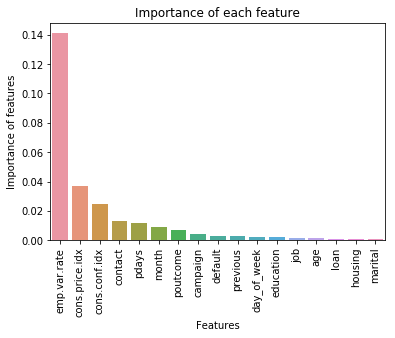

In [79]:
from keras.wrappers.scikit_learn import KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

# my_model = KerasRegressor(build_fn=base_model, **sk_params)    
mpl = KerasRegressor(build_fn=mpl_classifier, epochs=100, batch_size=64, verbose=2)
mpl.fit(xTrain,yTrain)

perm = PermutationImportance(mpl, random_state=1).fit(xTrain,yTrain)
feature_table=eli5.formatters.as_dataframe.explain_weights_df(perm,feature_names = bankdata.iloc[:,0:17].columns.tolist())
fig=sns.barplot('feature','weight',data=feature_table)
plt.xlabel('Features')
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.ylabel('Importance of features')
plt.title('Importance of each feature')
plt.show()

In [80]:
cvscore_r

[array([0.29612553, 0.29673525, 0.99597326, 0.65682964, 0.98683313]),
 array([0.21033695, 0.67374705, 0.6746164 , 0.68236149, 0.81192128]),
 array([0.19403492, 0.6875866 , 0.68552376, 0.68974139, 0.80040448]),
 array([0.24582328, 0.59523726, 0.65985138, 0.41      , 0.49407231])]

In [81]:
cvscore_p

[array([0.5087051 , 0.43891663, 0.92277049, 0.74202832, 0.98184102]),
 array([0.68552692, 0.2840857 , 0.75862627, 0.76417849, 0.88291063]),
 array([0.69912176, 0.27921313, 0.75380581, 0.75623581, 0.88696923]),
 array([0.6635998 , 0.3330992 , 0.62688832, 0.50127389, 0.5649635 ])]

In [82]:
aucscore

[array([0.62878201, 0.61906271, 0.65525979, 0.72075555, 0.72242465]),
 array([0.59682221, 0.72018389, 0.72127344, 0.72086445, 0.70475355]),
 array([0.58611533, 0.72080556, 0.72054093, 0.71854983, 0.70721503]),
 array([0.61462037, 0.73409501, 0.73588162, 0.73162716, 0.72720823])]

In [90]:
## Build up model by class_weight, set false negative penalty as 1, false positive penalty as weights_0 (within (0,1))
# using f1 socres as estimator

from sklearn.model_selection import GridSearchCV
weights_0=[x for x in np.linspace(0.001,0.999,999)] 
classweight=[]
for i in weights_0:
    classweight.append(dict({0:i,1:1}))
param_grid=dict(class_weight=classweight)
grid = GridSearchCV(estimator=clf, param_grid=param_grid,scoring='f1', n_jobs=-1, cv=10,verbose=3)
grid.fit(xTrain, yTrain)

Fitting 10 folds for each of 999 candidates, totalling 9990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'class_weight': [{0: 0.001, 1: 1}, {0: 0.002, 1: 1}, {0: 0.003, 1: 1}, {0: 0.004, 1: 1}, {0: 0.005, 1: 1}, {0: 0.006, 1: 1}, {0: 0.007, 1: 1}, {0: 0.008, 1: 1}, {0: 0.009000000000000001, 1: 1}, {0: 0.010000000000000002, 1: 1}, {0: 0.011, 1: 1}, {0: 0.012, 1: 1}, {0: 0.013000000000000001,...4, 1: 1}, {0: 0.995, 1: 1}, {0: 0.996, 1: 1}, {0: 0.997, 1: 1}, {0: 0.998, 1: 1}, {0: 0.999, 1: 1}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=3)

In [91]:
print(grid.best_params_)
print(np.max(grid.cv_results_['mean_test_score']))

{'class_weight': {0: 0.301, 1: 1}}
0.47188011832036925


In [92]:
plt.plot(np.linspace(0.001,0.999,999),grid.cv_results_['mean_test_score'])
plt.title('f1 scores versus class_weight for training data of logistic regression')
plt.xlabel('class_weight for class no')
plt.ylabel('f1 score')
plt.show()

In [93]:
clf1=LogisticRegression(class_weight={0: 0.301, 1: 1})
clf1.fit(xTrain,yTrain)
y_pred=clf1.predict(xTest_0)
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))

[[10167   802]
 [  704   684]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10969
           1       0.46      0.49      0.48      1388

   micro avg       0.88      0.88      0.88     12357
   macro avg       0.70      0.71      0.70     12357
weighted avg       0.88      0.88      0.88     12357



C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


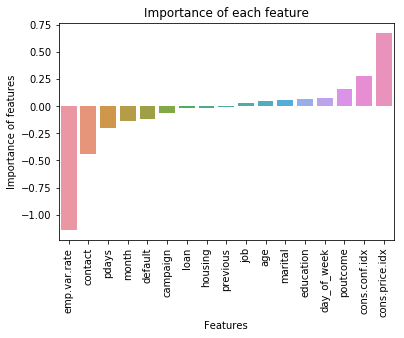

In [94]:
coef=clf1.coef_.ravel()
feature_weight(coef)

In [154]:
cost10=np.linspace(0.001,0.999,999) ## low cost, high cost is 1
cost01=1
ratio=cost10/(1+cost10)

In [155]:
def cost_clf (clf,x_train,rate):
    result=(clf.predict_proba(x_train)[:,1]>rate).astype(int)
    return result

In [157]:
from sklearn.metrics import f1_score
def custom_f1(rate):
    def f1_lowcost(clf,x_train,y_train):
        ypred=cost_clf(clf,x_train,rate)
        return f1_score(y_train,ypred)
    return f1_lowcost

In [158]:
scores=[]
for rate in ratio:
    clf=LogisticRegression()
    cv_score=cross_val_score(clf,xTrain,yTrain,cv=10,scoring=custom_f1(rate))
    scores.append(cv_score)

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

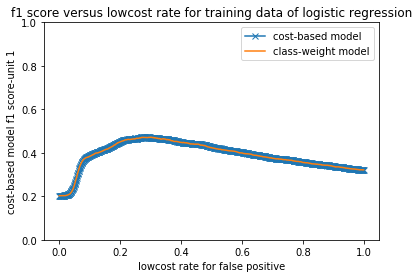

In [179]:
plt.plot(np.linspace(0.001,0.999,999),np.mean(scores,axis=1),'-x',label='cost-based model')
plt.plot(np.linspace(0.001,0.999,999),grid.cv_results_['mean_test_score'],label='class-weight model')
plt.title('f1 score versus lowcost rate for training data of logistic regression')
plt.xlabel('lowcost rate for false positive')
plt.ylabel('cost-based model f1 score-unit 1')
plt.ylim(bottom=0,top=1)
plt.legend()
plt.show()

In [176]:
print(np.mean(scores,axis=1).max())
bestscore=ratio[np.mean(scores,axis=1).argmax()]
bestscore

0.4724451132049995


0.22660479505027067

In [177]:
clf=LogisticRegression()
clf.fit(xTrain,yTrain)
y_pred=cost_clf(clf,xTest_0,bestscore)
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))

C:\Users\Minjie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[10130   839]
 [  692   696]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10969
           1       0.45      0.50      0.48      1388

   micro avg       0.88      0.88      0.88     12357
   macro avg       0.69      0.71      0.70     12357
weighted avg       0.88      0.88      0.88     12357



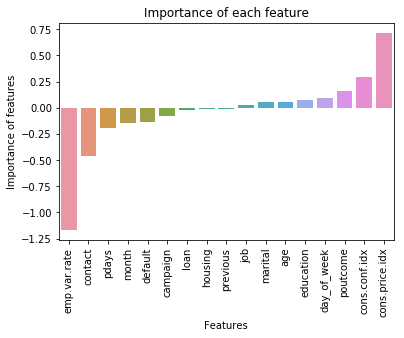

In [178]:
## find out the most important features
coef=clf.coef_.ravel()
feature_weight(coef)